In [1]:
import pandas as pd
import numpy as np
import requests
import re
from collections import defaultdict
import os
import json
import threading
import time
import logging
import gzip
import pickle
from matplotlib import pyplot as plt
import mplcursors
from datetime import datetime

In [2]:
%matplotlib inline

In [3]:
host = 'zq.titan007.com'
odd_host = '1x2d.titan007.com'
root = 'https://'+host
odd_root = 'https://1x2.titan007.com'
root_cn = os.path.join(root, 'cn').replace('\\', '/')
referer = root
#league_js_rpath = 'jsData/infoHeader.js'
league_info_url = os.path.join(root, 'jsData/infoHeader.js').replace('\\', '/')
lea_sea_js_dir = os.path.join(root, 'jsData/matchResult/').replace('\\', '/')
odd_list_dir = os.path.join(odd_root, 'oddslist/').replace('\\', '/')
odd_aspx = os.path.join(odd_root, 'OddsHistory.aspx').replace('\\', '/')

In [4]:
root_cn

'https://zq.titan007.com/cn'

In [5]:
league_info_url

'https://zq.titan007.com/jsData/infoHeader.js'

In [6]:
lea_sea_js_dir

'https://zq.titan007.com/jsData/matchResult/'

In [7]:
odd_list_dir

'https://1x2.titan007.com/oddslist/'

In [8]:
odd_aspx

'https://1x2.titan007.com/OddsHistory.aspx'

In [9]:
header = {
        #'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
        #'Accept-Encoding': 'gzip, deflate',
          'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.117 Safari/537.36',
          #'Referer': 'http://op1.win007.com/oddslist/1721891.htm',
         #'Host': 'op1.win007.com',
        'referer' : referer,
        #'Cookie': 'ASP.NET_SessionId=xfoi3pdoemlbl4ayxvd0l2mz'
        }

In [10]:
proxies = {"http": "218.75.158.153:3128"}

In [11]:
def get_league_html():
    
    #league_info_url = 'https://zq.titan007.com/jsData/infoHeader.js'
    #league_info_url = os.path.join(root, league_js_rpath)
    #league_info_text = requests.get(league_info_url,headers=header,proxies = proxies,timeout=5).text
    league_info_text = ''
    while league_info_text == '':
        try:
            league_info_text = requests.get(league_info_url,headers=header,timeout=5).text
        except:
            logging.warning('InfoHeader Redirect:- - - - Try to Capture InfoHeader Again - - - - ')
            time.sleep(5)
            continue
    pattern = re.compile(r'\d+,\w+,\d,\d,[\d+-?\d+?]+')
    league_info = pattern.findall(league_info_text)
    league_info = [ls.split(',') for ls in league_info]
    print('Total Leagues: {}'.format(len(league_info)))
    print('League info sample: {}'.format(league_info[0]))
    
    league_htmls = defaultdict(list)
    for league in league_info:
        #'http://zq.win007.com/cn/SubLeague/37.html'
        (league_id,league_name,league_type,league_rank) ,seasons = league[:4],league[4:]
        #htmls = []
        #for season in seasons:
        #    league_html = ''
        #    if league_type == '1':
        #        if league_rank == '0':  
        #            league_html = 'http://zq.win007.com/cn'+'/League/'+season+'/'+league_id+'.html'
        #        else:
        #            league_html = 'http://zq.win007.com/cn'+'/SubLeague/'+season+'/'+league_id+'.html'
        #    elif league_type == '2':
        #            league_html = 'http://zq.win007.com/cn'+'/CupMatch/'+season+'/'+league_id+'.html'
        #    htmls.append(league_html)
        if league_type == '1':
            if league_rank == '0':  
                #league_html = 'http://zq.win007.com/cn'+'/League/'+league_id+'.html'
                league_html = root_cn+'/League/'+league_id+'.html'
            else:
                league_html = root_cn+'/SubLeague/'+league_id+'.html'
        elif league_type == '2':
                league_html = root_cn+'/CupMatch/'+league_id+'.html'
        league_htmls[league_name].append(int(league_type+league_rank))
        league_htmls[league_name].append(league_html)
        league_htmls[league_name] += list(seasons)
    return league_htmls

In [12]:
league_htmls = get_league_html()

Total Leagues: 879
League info sample: ['36', '英超', '1', '0', '2023-2024', '2022-2023', '2021-2022', '2020-2021', '2019-2020', '2018-2019', '2017-2018', '2016-2017', '2015-2016', '2014-2015', '2013-2014', '2012-2013', '2011-2012', '2010-2011', '2009-2010', '2008-2009', '2007-2008', '2006-2007', '2005-2006', '2004-2005', '2003-2004']


In [13]:
league_htmls['英超']

[10,
 'https://zq.titan007.com/cn/League/36.html',
 '2023-2024',
 '2022-2023',
 '2021-2022',
 '2020-2021',
 '2019-2020',
 '2018-2019',
 '2017-2018',
 '2016-2017',
 '2015-2016',
 '2014-2015',
 '2013-2014',
 '2012-2013',
 '2011-2012',
 '2010-2011',
 '2009-2010',
 '2008-2009',
 '2007-2008',
 '2006-2007',
 '2005-2006',
 '2004-2005',
 '2003-2004']

In [14]:
league_htmls['苏甲']

[11,
 'https://zq.titan007.com/cn/SubLeague/151.html',
 '2023-2024',
 '2022-2023',
 '2021-2022',
 '2020-2021',
 '2019-2020',
 '2018-2019',
 '2017-2018',
 '2016-2017',
 '2015-2016',
 '2014-2015',
 '2013-2014',
 '2012-2013',
 '2011-2012',
 '2010-2011',
 '2009-2010',
 '2008-2009',
 '2007-2008',
 '2006-2007',
 '2005-2006',
 '2004-2005']

In [15]:
[k for k,v in league_htmls.items() if v[0] == 10]

['英超',
 '英女南',
 '英女北',
 '西甲',
 '德甲',
 '德丙',
 '德女联',
 '法甲',
 '法女甲',
 '荷青乙',
 '挪超',
 '丹麦U17',
 '奥女甲',
 '捷乙',
 '冰岛乙',
 '威甲',
 '匈甲',
 '阿美甲',
 '巴西甲',
 '巴西乙',
 '香港乙',
 '澳门甲',
 '日丙',
 '阿尔甲',
 '沙地U17',
 '亲王杯U21',
 '黑山乙',
 '摩洛超',
 '摩洛乙']

In [16]:
def tree():
    return defaultdict(tree)

In [17]:
lea_sea_header = {
        #'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
        #'Accept-Encoding': 'gzip, deflate',
          'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.117 Safari/537.36',
          #'Referer': 'http://op1.win007.com/oddslist/1721891.htm',
         'Host': host,
        'referer' : 'https://zq.titan007.com/info/index_cn.htm',
        #'Cookie': 'ASP.NET_SessionId=xfoi3pdoemlbl4ayxvd0l2mz'
        }

In [18]:
def get_league_season_js(league_htmls:dict,leagues,season_num=10):
    #pattern = re.compile('/jsData/matchResult/2019-2020/s36.js?version=2020010910')
    pattern = re.compile(r'/jsData/matchResult/\d+-?\d+?(/\w\d+_?\d*\.js\?version=\d+)')
    leagues_seasons_js = defaultdict(list)
    index_tree = tree()
    if isinstance(leagues,str):
        htmls_len = len(league_htmls[leagues])-2
        if season_num >= htmls_len: season_num = htmls_len
        print('\rLeague: {} - Season: {}'.format(leagues,season_num),end='')
        seasons = league_htmls[leagues][2:2+season_num]
        #index_file = 'index.csv'
        #dev_sets = 'dev_sets.csv'
        #if os.path.isfile(index_file) and os.path.isfile(index_file):
        #    index_info = pd.read_csv(index_file)
        #    if index_info['seasons']
        print()
        
        html = league_htmls[leagues][1]
        print('html: {}'.format(html))
        html_content = ''
        while html_content == '':
            try:
                html_content = requests.get(html,headers=header,timeout=5).text
            except:
                logging.warning('League_html Redirect:- - - - Try to Visit {} Again - - - - '.format(html))
                time.sleep(5)
                continue
        #print(html_content)
        js_version = pattern.findall(html_content)[0]
        for season in seasons:
            js_url = lea_sea_js_dir+season+js_version
            leagues_seasons_js[leagues].append(js_url)
            index_tree[leagues][season]
        print()
        #print('JS : {}'.format(leagues_seasons_js[leagues]))
        #htmls.append(leagues)
    elif isinstance(leagues,list):
        for i,league in enumerate(leagues):
            htmls_len = len(league_htmls[league])-2
            if season_num >= htmls_len: season_num = htmls_len
            print('\rLeague: {}/{} - {} - Season: {}'.format(i+1,len(leagues),league,season_num),end='')
            seasons = league_htmls[league][2:2+season_num]
            html = league_htmls[league][1]
            html_content = ''
            while html_content == '':
                try:
                    html_content = requests.get(html,headers=header,timeout=5).text
                except:
                    logging.warning('League_JS Redirect:- - - - Try to Visit {} Again - - - - '.format(html))
                    time.sleep(5)
                    continue
            js_version = pattern.findall(html_content)[0]
            for season in seasons:
                js_url = lea_sea_js_dir+season+js_version
                leagues_seasons_js[league].append(js_url)
                index_tree[league][season]
        print()
    return leagues_seasons_js,index_tree

In [19]:
%time leagues_seasons_js ,index_tree = get_league_season_js(league_htmls,'英超')

League: 英超 - Season: 10
html: https://zq.titan007.com/cn/League/36.html

CPU times: total: 234 ms
Wall time: 280 ms


In [20]:
leagues_seasons_js

defaultdict(list,
            {'英超': ['https://zq.titan007.com/jsData/matchResult/2023-2024/s36.js?version=2024032811',
              'https://zq.titan007.com/jsData/matchResult/2022-2023/s36.js?version=2024032811',
              'https://zq.titan007.com/jsData/matchResult/2021-2022/s36.js?version=2024032811',
              'https://zq.titan007.com/jsData/matchResult/2020-2021/s36.js?version=2024032811',
              'https://zq.titan007.com/jsData/matchResult/2019-2020/s36.js?version=2024032811',
              'https://zq.titan007.com/jsData/matchResult/2018-2019/s36.js?version=2024032811',
              'https://zq.titan007.com/jsData/matchResult/2017-2018/s36.js?version=2024032811',
              'https://zq.titan007.com/jsData/matchResult/2016-2017/s36.js?version=2024032811',
              'https://zq.titan007.com/jsData/matchResult/2015-2016/s36.js?version=2024032811',
              'https://zq.titan007.com/jsData/matchResult/2014-2015/s36.js?version=2024032811']})

In [21]:
index_tree['英超']['2023-2024']

defaultdict(<function __main__.tree()>, {})

In [22]:
json.dumps(index_tree,ensure_ascii=False)

'{"英超": {"2023-2024": {}, "2022-2023": {}, "2021-2022": {}, "2020-2021": {}, "2019-2020": {}, "2018-2019": {}, "2017-2018": {}, "2016-2017": {}, "2015-2016": {}, "2014-2015": {}}}'

In [23]:
get_league_season_js(league_htmls,'英甲')

League: 英甲 - Season: 10
html: https://zq.titan007.com/cn/SubLeague/39.html



(defaultdict(list,
             {'英甲': ['https://zq.titan007.com/jsData/matchResult/2023-2024/s39_135.js?version=2024032811',
               'https://zq.titan007.com/jsData/matchResult/2022-2023/s39_135.js?version=2024032811',
               'https://zq.titan007.com/jsData/matchResult/2021-2022/s39_135.js?version=2024032811',
               'https://zq.titan007.com/jsData/matchResult/2020-2021/s39_135.js?version=2024032811',
               'https://zq.titan007.com/jsData/matchResult/2019-2020/s39_135.js?version=2024032811',
               'https://zq.titan007.com/jsData/matchResult/2018-2019/s39_135.js?version=2024032811',
               'https://zq.titan007.com/jsData/matchResult/2017-2018/s39_135.js?version=2024032811',
               'https://zq.titan007.com/jsData/matchResult/2016-2017/s39_135.js?version=2024032811',
               'https://zq.titan007.com/jsData/matchResult/2015-2016/s39_135.js?version=2024032811',
               'https://zq.titan007.com/jsData/matchResult/2014-20

In [23]:
%time get_league_season_js(league_htmls,['英超','西甲','德甲'])

League: 3/3 - 德甲 - Season: 10
CPU times: total: 344 ms
Wall time: 620 ms


(defaultdict(list,
             {'英超': ['https://zq.titan007.com/jsData/matchResult/2023-2024/s36.js?version=2024031712',
               'https://zq.titan007.com/jsData/matchResult/2022-2023/s36.js?version=2024031712',
               'https://zq.titan007.com/jsData/matchResult/2021-2022/s36.js?version=2024031712',
               'https://zq.titan007.com/jsData/matchResult/2020-2021/s36.js?version=2024031712',
               'https://zq.titan007.com/jsData/matchResult/2019-2020/s36.js?version=2024031712',
               'https://zq.titan007.com/jsData/matchResult/2018-2019/s36.js?version=2024031712',
               'https://zq.titan007.com/jsData/matchResult/2017-2018/s36.js?version=2024031712',
               'https://zq.titan007.com/jsData/matchResult/2016-2017/s36.js?version=2024031712',
               'https://zq.titan007.com/jsData/matchResult/2015-2016/s36.js?version=2024031712',
               'https://zq.titan007.com/jsData/matchResult/2014-2015/s36.js?version=2024031712'],
    

In [22]:
#season_round_content = requests.get(get_league_season_js(league_htmls,'英超',season_num=1)[0]['英超'][0],headers=header,proxies = proxies).text

League: 英超 - Season: 1
html: http://zq.win007.com/cn/League/36.html



In [24]:
season_round_content = requests.get(get_league_season_js(league_htmls,'英超',season_num=1)[0]['英超'][0],headers=header).text

League: 英超 - Season: 1
html: https://zq.titan007.com/cn/League/36.html



In [25]:
season_round_content

'var arrLeague = [36,\'英格兰超级联赛\',\'英格蘭超級聯賽\',\'English Premier League\',\'2023-2024\',\'#FF3333\',\'league_match/images/164577482086.png\',38,30,\'英超\',\'英超\',\'ENG PR\',\'英格兰足球超级联赛共由20支球队组成，采取双循环赛制（每支球队分别以主、客场身份和其他球队交锋两次）。单场比赛积分计算方法是胜者得3分、负者得0分、平局则双方各得1分，赛季末按累计积分高低排名。积分相同的球队由净胜球和总进球数等来决定排名，如果涉及联赛冠军、升降级名额的球队通过以上条件仍不分上下，再看两队之间的交锋战绩及相互对战客场进球，仍相同则需要进行附加赛。<br/>\u3000\u3000联赛前四名直接参加下赛季欧洲冠军联赛小组赛，第五名参加下赛季欧霸杯，第六名参加欧会杯（英格兰足总杯冠军可参加欧霸杯，如果足总杯冠军已经取得欧战资格，则名额让给联赛未获欧战资格中排名靠前的球队；英格兰联赛杯冠军可参加欧霸杯第三轮资格赛，如果联赛杯冠军已经取得欧战资格，则其名额让给联赛未获欧战资格中排名靠前的球队）若欧冠、欧联冠军都是英超球队，且两支球队都未通过联赛获得欧冠资格，则第四名参加欧联杯。本赛季联赛排名最后三位的球队下赛季将降到英冠。\',\'29\'];\nvar arrTeam = [[19,\'阿森纳\',\'阿仙奴\',\'Arsenal\',\'\',\'images/164577419697.png\',0],[20,\'阿斯顿维拉\',\'阿士東維拉\',\'Aston Villa\',\'\',\'images/1h97rm7nv21d.png\',0],[24,\'切尔西\',\'車路士\',\'Chelsea\',\'\',\'images/164577409120.png\',0],[25,\'利物浦\',\'利物浦\',\'Liverpool\',\'\',\'images/164577447430.png\',0],[26,\'曼彻斯特城\',\'曼城\',\'Manchester City\',\'\',\'images/164577478031.png\',0],[27,\'曼彻斯特联\',\'曼聯\'

In [26]:
def get_teams(season_round_content):
    #19,'阿森纳','阿仙奴','Arsenal','','images/164577419697.png',0
    #20,'阿斯顿维拉','阿士東維拉','Aston Villa','','images/1h97rm7nv21d.png',0
    #pattern = re.compile('(\d+),\'(\w+)\',\'\w+\',\'.+?\',\'\w+\',\'images/\d+.\w+\',\d')
    #p1 = r'arrTeam = \[[\[(.+)\],?]+\];'
    p1 = re.compile(r'arrTeam = \[(.+),?\];')
    #p1 = re.compile(r'arrTeam = \[([^\[\]]+)\];')
    arr_info = p1.findall(season_round_content)[0]
    #json.load(arr_info)
    arr_info = re.sub(r'\[|\]', '#', arr_info)
    #p2 = re.compile(r'\[(.+)\],?')
    #team_info = p2.findall(arr_info)
    team_arch = [a for a in arr_info.split('#') if a not in ['', ',']]
    print(len(arr_info), arr_info)
    print(len(team_arch), team_arch)
    #pattern = re.compile("(\d+),'(\w+)','\w+','.+','','images/.+\.png',\d")
    #team_info = pattern.findall(season_round_content)
    tmp = [ta.split(',') for ta in team_arch]
    team_info = {ta[0]:ta[1].strip("'") for ta in tmp}
    #team_info = [info.split(',') for info in team_info]
    return team_info

In [27]:
team_info = get_teams(season_round_content)

1281 #19,'阿森纳','阿仙奴','Arsenal','','images/164577419697.png',0#,#20,'阿斯顿维拉','阿士東維拉','Aston Villa','','images/1h97rm7nv21d.png',0#,#24,'切尔西','車路士','Chelsea','','images/164577409120.png',0#,#25,'利物浦','利物浦','Liverpool','','images/164577447430.png',0#,#26,'曼彻斯特城','曼城','Manchester City','','images/164577478031.png',0#,#27,'曼彻斯特联','曼聯','Manchester United','','images/164577479190.png',0#,#28,'纽卡斯尔联','紐卡素','Newcastle United','','images/164577474623.png',0#,#29,'富勒姆','富咸','Fulham','','images/16486909637.png',0#,#31,'埃弗顿','愛華頓','Everton','','images/164577449385.png',0#,#33,'托特纳姆热刺','熱刺','Tottenham Hotspur','','images/33/1h746a4jfr1p.png',0#,#35,'水晶宫','水晶宮','Crystal Palace','','images/164577426766.png',0#,#46,'伯恩利','般尼','Burnley','','images/1h99zdamy01a.png',0#,#49,'诺丁汉森林','諾定咸森林','Nottingham Forest','','images/164869100556.png',0#,#51,'谢菲尔德联队','錫菲聯','Sheffield United','','images/164869103617.png',0#,#52,'狼队','狼隊','Wolves','','images/164577451783.png',0#,#60,'布莱顿','白禮頓','Brighton Hove Albion','','

In [28]:
len(team_info)

20

In [29]:
team_info

{'19': '阿森纳',
 '20': '阿斯顿维拉',
 '24': '切尔西',
 '25': '利物浦',
 '26': '曼彻斯特城',
 '27': '曼彻斯特联',
 '28': '纽卡斯尔联',
 '29': '富勒姆',
 '31': '埃弗顿',
 '33': '托特纳姆热刺',
 '35': '水晶宫',
 '46': '伯恩利',
 '49': '诺丁汉森林',
 '51': '谢菲尔德联队',
 '52': '狼队',
 '60': '布莱顿',
 '62': '西汉姆联',
 '348': '伯恩茅斯',
 '365': '布伦特福德',
 '372': '卢顿'}

In [30]:
team_info['25']

'利物浦'

In [31]:
def get_round_info(season_round_content):
    #1720912,36,-1,'2019-08-10 03:00',25,34,'4-1','4-0','2','英冠1',2.25,1,'3/3.5','1/1.5',1,1,1,1,0,0,'','2','ENG LCH-1'
    pattern = re.compile(r'\[(\d+),\d+,(-?\d),(.+?),(\d+),(\d+),(.+?),.+?,(.+?),(.+?),.*?,.*?,.+?,.+?,\d,\d,\d,\d,\d,\d,.*?,.+?,.+?\]')
    round_info = pattern.findall(season_round_content)
    return round_info

In [32]:
round_info = get_round_info(season_round_content)

In [33]:
len(round_info)

379

In [34]:
round_info

[('2398985', '-1', "'2023-08-12 03:00'", '46', '26', "'0-3'", "'英冠1'", "'1'"),
 ('2398986', '-1', "'2023-08-12 20:00'", '19', '49', "'2-1'", "'2'", "'16'"),
 ('2398989', '-1', "'2023-08-12 22:00'", '31', '29', "'0-1'", "'17'", "'10'"),
 ('2398990', '-1', "'2023-08-12 22:00'", '51', '35', "'0-1'", "'英冠2'", "'11'"),
 ('2398987', '-1', "'2023-08-12 22:00'", '348', '62', "'1-1'", "'15'", "'14'"),
 ('2398988', '-1', "'2023-08-12 22:00'", '60', '372', "'4-1'", "'6'", "'英冠3'"),
 ('2398991', '-1', "'2023-08-13 00:30'", '28', '20', "'5-1'", "'4'", "'7'"),
 ('2398992', '-1', "'2023-08-13 21:05'", '365', '33', "'2-2'", "'9'", "'8'"),
 ('2398993', '-1', "'2023-08-13 23:30'", '24', '25', "'1-1'", "'12'", "'5'"),
 ('2398994', '-1', "'2023-08-15 03:00'", '27', '52', "'1-0'", "'3'", "'13'"),
 ('2399073', '-1', "'2023-08-19 02:45'", '49', '51', "'2-1'", "'14'", "'16'"),
 ('2399069', '-1', "'2023-08-19 22:00'", '29', '365', "'0-3'", "'6'", "'10'"),
 ('2399070', '-1', "'2023-08-19 22:00'", '25', '348', "

In [35]:
round_info[0][5].strip("'")

'0-3'

In [36]:
len([entry for entry in round_info if entry[5].strip("'")])

283

In [37]:
def get_match_info(round_info:list,teams,phase=-1):
    p1 = re.compile(r'"(\d+)\|(\d+)\|.+?\|(.+?)\|(\d)\|\d"')
    p2 = re.compile(r'\.js(\?r=\d+)')
    odds_info = []
    #round_len = len(teams)/2
    N = 0
    for match in round_info:
        match_id,match_state,match_date,r1,r2,score,host_rank,guest_rank = match
        #https://1x2d.titan007.com/2398985.js?r=007133547765186048687       
        if int(match_state) == phase:
            #url = odd_root+'/'+match_id+'.js'
            oddlist_url = odd_list_dir+match_id+'.html'
            #print(oddlist_url)
            html_text = ''
            while html_text == '':
                try:
                    html_text = requests.get(oddlist_url,headers=header,timeout=5).text
                    #break
                except:
                    logging.warning('MatchInfo Redirect:- - - Try to Visit {}.js Again - - -'.format(match_id))
                    time.sleep(5)
                    continue
            #print(html_text)
            tmp = p2.findall(html_text)
            if not tmp:
                print()
                print(f'Erorr Parsing: ')
                print(f'{oddlist_url}')
                print(html_text)
                return []
            r_var = tmp[0]
          
            #url = 'https://1x2d.titan007.com/2398985.js?r=007133547765186048687'
            url = odd_root+'/'+match_id+'.js'+r_var
            #print(url)
            #print(os.path.join(odd_root, match_id+'.js'))
            odd_header = {
                "Host": odd_host,
                "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:123.0) Gecko/20100101 Firefox/123.0",
                "Accept": "*/*",
                "Accept-Language": "zh-CN,zh;q=0.8,zh-TW;q=0.7,zh-HK;q=0.5,en-US;q=0.3,en;q=0.2",
                "Accept-Encoding": "gzip, deflate, br",
                "Referer": oddlist_url,
                "Connection": "keep-alive",
                "Cookie": "ishidepcad=",
                "Sec-Fetch-Dest": "script",
                "Sec-Fetch-Mode": "no-cors",
                "Sec-Fetch-Site": "same-site"
            }
            js_text = ''
            while js_text == '':
                try:
                    #js_text = requests.get(url,headers=header,timeout=5).text
                    js_text = requests.get(url,headers=odd_header,timeout=5).text
                    #break
                except:
                    logging.warning('MatchInfo Redirect:- - - Try to Visit {}.js Again - - -'.format(match_id))
                    time.sleep(5)
                    continue
            #print(js_text)
            result = p1.findall(js_text)
            #print(result)
            ids_companys = [(r[1],r[2].split('|')[-1],r[0]) for r in result if int(r[3]) == 1] 
            #print(ids_companys)
            odds_info.append([teams[r1],                  #0
                              teams[r2],                  #1
                              match_id,                   #2
                              ids_companys,               #3
                              match_date.strip("'"),      #4
                              score.strip("'"),           #5
                              host_rank.strip("'"),       #6
                              guest_rank.strip("'")       #7
                             ]
                            )
            N = N + 1
            print('\rMatch: {}-{} JS: {} State: {} Total: {}/{}'.format(teams[r1],teams[r2],match_id,match_state,N,len(round_info)),end='')
    print()
    return odds_info

In [161]:
#%time pml_odds_s1 = get_match_info(round_info,team_info)

Match: 切尔西-纽卡斯尔联 JS: 2399331 State: -1 Total: 279/373373
CPU times: total: 45.9 s
Wall time: 2min 10s


In [165]:
#if not os.path.exists('pml_s1.pkl.gz') and pml_odds_s1:
#    with gzip.open('pml_s1.pkl.gz', 'wb') as f:
#        pickle.dump(pml_odds_s1, f)

In [166]:
#if os.path.exists('pml_s1.pkl.gz') and not pml_odds_s1:
#    with gzip.open('pml_s1.pkl.gz', 'rb') as f:
#        pml_odds_s1 = pickle.load(f)

In [38]:
def fetch_match_data(round_info, team_info, dat_file='pml_s1.pkl.gz'):
    data = None
    if not os.path.exists(dat_file):
        data = get_match_info(round_info, team_info)
        with gzip.open(dat_file, 'wb') as f:
            pickle.dump(data, f)
    else:
        with gzip.open(dat_file, 'rb') as f:
            data = pickle.load(f)
    return data

In [39]:
pml_odds_s1 = fetch_match_data(round_info, team_info)

In [40]:
len(pml_odds_s1)

279

In [41]:
#%time odds_info = get_match_info(round_info[:10],team_info)
%time odds_info = pml_odds_s1[:10]

CPU times: total: 0 ns
Wall time: 0 ns


In [42]:
odds_info

[['伯恩利',
  '曼彻斯特城',
  '2398985',
  [('127400616', '36*(英国)', '281'),
   ('127399492', '威廉希*(英国)', '115'),
   ('127398464', '立*(英国)', '82'),
   ('128197787', 'bet-at-h*(马尔他)', '173'),
   ('127399554', '伟*(直布罗陀)', '81'),
   ('127566588', '易*(安提瓜和巴布达)', '90'),
   ('127398492', 'Interwet*(塞浦路斯)', '104'),
   ('128521967', '竞彩官*', '1129'),
   ('127400615', '10*(英国)', '16'),
   ('127400848', '12*(菲律宾)', '18'),
   ('127398476', '18*', '976'),
   ('127398838', 'Bwi*(奥地利)', '255'),
   ('128197778', 'Cora*(英国)', '88'),
   ('127400588', 'Crow*', '545'),
   ('128197775', 'Exp*(瑞典)', '70'),
   ('128409409', 'Nordic*(马恩岛)', '4'),
   ('128197780', 'Odd*(德国)', '370'),
   ('127398752', 'Pinna*(荷兰)', '177'),
   ('128197774', 'SNA*(意大利)', '110'),
   ('128409404', 'ST*(波兰)', '60'),
   ('128358090', '澳*', '80'),
   ('128197776', '博天*(瓦努阿图)', '422'),
   ('127400536', '金宝*(马恩岛)', '499'),
   ('127400981', '利*(英国)', '474'),
   ('127401128', '明*(菲律宾)', '517'),
   ('128435873', '香港马*(中国香港)', '432'),
   ('12740085

In [43]:
len(odds_info)

10

In [44]:
# 原始文本
text = '<td>17.21%</td><td>75%</td><td style="background-color:#e1e9f0;">94.67%</td>94.67%</td><td width=55>1.01</td><td width=55>0.98</td><td width=55> 0.93</td><td class=font12 align=left>&nbsp; 08-12 02:07</td></tr>'

# 匹配数字、连字符和冒号的正则表达式
#regex = r'[0-9\-:]'
#p1 = r'(\d+%|\d+\.\d+%|\d+\.\d+)'
p1 = r'(\d+\.\d+%?|\d+%)'
#p2 = r'(\d+)\-(\d+)\s+(\d+):(\d+)'
p2 = r'(\d+\-\d+\s+\d+:\d+)'
print('|'.join([p1, p2]))
p = re.compile('|'.join([p1, p2]))

# 查找匹配的模式
matches = p.findall(text)

# 打印匹配结果
print(matches)


(\d+\.\d+%?|\d+%)|(\d+\-\d+\s+\d+:\d+)
[('17.21%', ''), ('75%', ''), ('94.67%', ''), ('94.67%', ''), ('1.01', ''), ('0.98', ''), ('0.93', ''), ('', '08-12 02:07')]


In [45]:
def get_odds(odds_text):
    #p1 = re.compile('<font\scolor=\w*>(\d\d?.\d\d?)</font>')
    #p1 = '<font\scolor=\w*>(\d\d?.\d\d?)</font>'
    #p2 = '<td>(\d+\.?\d+?)%</td>'
    p1 = r'(\d+\.\d+%?|\d+%)'
    m1 = re.compile(p1)
    #p2 = r'(\d+)\-(\d+)\s+(\d+):(\d+)'
    p2 = r'(\d+\-\d+\s+\d+:\d+)'
    m2 = re.compile(p2)
    #print('|'.join([p1, p2]))
    p = re.compile('|'.join([p1, p2]))
    odd_ps = p.findall(odds_text)
    r1 = m1.findall(odds_text)
    r2 = m2.findall(odds_text)
    #print(r1)
    #print(r2)
    #print(odd_ps)
    tmp = []
    for ops in odd_ps:
        for op in ops:
            if op:
                tmp.append(op)
    j = 'OK' if (len(r1)//10)==len(r2) else 'NO'
    print(f'Data: {len(r2)} - {j}')
    #print(len(tmp))
    #print(tmp)
    odds, tps = odds_process(tmp)
    return odds, tps
    #return odd_ps,len(odd_ps)

In [46]:
def odds_process(odd_ps):
    odds = []
    timepoints = []
    strtimes = []
    #for i in range(len(odd_ps)//3-1,-1,-1):
    #for i in range(len(odd_ps)//14-1,-1,-1):
    for i in range(len(odd_ps)//11-1,-1,-1):
        odds.append([
                     #float(odd_ps[i*14]),                    #odd_Win  
                     #float(odd_ps[i*14+1]),                  #odd_Draw
                     #float(odd_ps[i*14+2]),                  #odd_Fail
                     #float(odd_ps[i*14+3].strip('%'))/100,   #p_Win
                     #float(odd_ps[i*14+4].strip('%'))/100,   #p_Draw
                     #float(odd_ps[i*14+5].strip('%'))/100,   #p_Fail
                     #float(odd_ps[i*14+6].strip('%'))/100,   #p_repay
                     #float(odd_ps[i*14+7]),                  #kali_Win  
                     #float(odd_ps[i*14+8]),                  #kali_Draw
                     #float(odd_ps[i*14+9])]                  #kali_Fail
                    
                     float(odd_ps[i*11]),                    #odd_Win  
                     float(odd_ps[i*11+1]),                  #odd_Draw
                     float(odd_ps[i*11+2]),                  #odd_Fail
                     float(odd_ps[i*11+3].strip('%'))/100,   #p_Win
                     float(odd_ps[i*11+4].strip('%'))/100,   #p_Draw
                     float(odd_ps[i*11+5].strip('%'))/100,   #p_Fail
                     float(odd_ps[i*11+6].strip('%'))/100,   #p_repay
                     float(odd_ps[i*11+7]),                  #kali_Win  
                     float(odd_ps[i*11+8]),                  #kali_Draw
                     float(odd_ps[i*11+9])]                  #kali_Fail
                   )
        #timepoints.append([int(odd_ps[i*14+10]),             #month 
        #                    int(odd_ps[i*14+11]),            #day
        #                    int(odd_ps[i*14+12]),            #hour
        #                    int(odd_ps[i*14+13])]            #minute 
        #            )
        strtimes.append(odd_ps[i*11+10])                 #strtime      
    #for i in range(len(odd_ps)//3):
    #    odds.append([float(odd_ps[i*3]),float(odd_ps[i*3+1]),float(odd_ps[i*3+2])])
    #return np.array(odds), np.array(timepoints)    
    return np.array(odds), np.array(strtimes)    

In [47]:
def odds_factory(odd_info,cid,l=1):
    #param = {
    #    'id' : id_company[0],
    #    'r1' : r1,
    #    'r2' : r2,
    #    'Company': id_company[1]
    #    
    #}
    
    (host, guest), (match_date, score, host_rank, guest_rank), company = odd_info[:2], odd_info[4:], ''
    tid = None
    for id, com, com_id in odd_info[3]:
        if cid == com_id:
            tid = id
            company = com
            break
    if not tid:
        return np.array([]), np.array([])
    param = {
        'id' : tid,
        'sid' : odd_info[2],
        'cid' : cid,
        'l': l #lang
        
    }

    oddlist_url = odd_list_dir+odd_info[2]+'.htm'
    #print(f'{host} VS {guest} | {match_date} | {score} | {host_rank} VS {guest_rank} | {company}')
    odd_ax_header = {
        "Host": odd_host,
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:123.0) Gecko/20100101 Firefox/123.0",
        "Accept": "*/*",
        "Accept-Language": "zh-CN,zh;q=0.8,zh-TW;q=0.7,zh-HK;q=0.5,en-US;q=0.3,en;q=0.2",
        "Accept-Encoding": "gzip, deflate, br",
        "Referer": oddlist_url,
        "Connection": "keep-alive",
        "Cookie": "ishidepcad=",
        "Sec-Fetch-Dest": "script",
        "Sec-Fetch-Mode": "no-cors",
        "Sec-Fetch-Site": "same-site"
    }
    #odd_url = 'http://op1.win007.com/OddsHistory.aspx'
    odds_text = ''
    while odds_text == '':
        try:
            odds_text = requests.get(odd_aspx,params=param,headers=header,timeout=5).text
        except:
            logging.warning('OddsInfo Redirect:- - - Try to Captrue {}-{}-{} Odds Again - - -'.format(r1,r2,company))
            time.sleep(5)
            continue
    #print(odds_text)
    odds, tps = get_odds(odds_text)
    print(f'{host} VS {guest} | {match_date} | {score} | {host_rank} VS {guest_rank} | {company} Start: {tps[0]} Mid: {tps[len(tps)//2]} End: {tps[-1]}')
    print(oddlist_url)
    return odds, tps

In [48]:
def matchday_odd_idx(odd_info, tps):
    match_time = odd_info[4].strip("'")
    # 将时间字符串解析为 datetime 对象
    time_obj = datetime.strptime(match_time, "%Y-%m-%d %H:%M")    
    # 提取年、月、日
    year = time_obj.year
    month = time_obj.month
    day = time_obj.day    
    #print("年:", year)
    #print("月:", month)
    #print("日:", day)
    N = 0
    for i, tp in enumerate(tps):
        tp_obj = datetime.strptime(tp, "%m-%d %H:%M") 
        tm, td = tp_obj.month, tp_obj.day
        #print(f'TP: {tm}-{td} | Match: {month}-{day} | Catch: {[tm, td] == [month, day]}')
        if [tm, td] == [month, day]:
            N = i
            break
    return N

In [49]:
pml_odds_s1[0][4]

'2023-08-12 03:00'

In [50]:
def show_odds(odds_info, cid, matchday=False):
    odds, tps = [], []
    for odd_info in odds_info:
        odd, tp = odds_factory(odd_info, cid)
        #print(f'TP: {tp.shape} - {tp[0]}')
        idx = matchday_odd_idx(odd_info, tp)
        print(f'Matchday: {len(tp[idx:])}')
        #print(f'Begin: {tp[idx]}')
        if odd.shape[0]:
            odds.append(odd)
            tps.append(tp)
            plt.xlabel('tp')
            plt.ylabel('O_W_D_F')
            if matchday:
                plt.plot(range(len(tp[idx:])), odd[idx:,:3])
            else:
                plt.plot(range(len(tp)), odd[:,:3])
            plt.legend(['O_W', 'O_D', 'O_F'])
            plt.show()
    return odds, tps

In [51]:
def show_kelly(odds_info, cid, cubic=False, plot_odd=False, diff=False, matchday=False):
    odds, tps = [], []
    for odd_info in odds_info:
        odd, tp = odds_factory(odd_info, cid)
        #print(f'TP: {tp.shape} - {tp[0]}')
        idx = matchday_odd_idx(odd_info, tp)
        print(f'Matchday: {len(tp[idx:])}')
        #print(f'Begin: {tp[idx]}')
        if odd.shape[0]:
            odds.append(odd)
            tps.append(tp)
            x, y, z = tp, None, None
            fig = plt.figure()
            ax = fig.add_subplot(111)
            if cubic:
                # 创建一个图形和3D坐标轴
                #fig = plt.figure()
                #ax = fig.add_subplot(111, projection='3d')
                
                #x, y, z = odd[:,:3].T
                x, y, z = odd[:,3:6].T
                
                # 绘制3D散点图
                ax.scatter(x, y, z, c='r', marker='o')
                ax.plot(x, y, z, c='r')
                #
                ## 设置坐标轴标签
                #ax.set_xlabel('O_W')
                #ax.set_ylabel('O_D')
                #ax.set_zlabel('O_F')
                
                #s = np.sqrt(np.square(x)+np.square(y)+np.square(z))
                s = np.square(x)+np.square(y)+np.square(z)
                #print(s.shape)
                S = 1-np.square(odd[:,:3]).T/s
                
                #ax.plot(range(x.shape[0]), np.sqrt(np.square(x)+np.square(y)+np.square(z)))
                ax.plot(range(x.shape[0]), S.T)
                ax.legend(['O_W', 'O_D', 'O_F'])
                ## 显示图形
                #plt.show()
            else:
                #ax = fig.add_subplot(111)
                ax.set_xlabel('tp')
                #plt.xlabel('tp')
                if plot_odd:
                    ax.set_ylabel('O_W_D_F')
                    #plt.ylabel('O_W_D_F')
                    y = odd[:,:3]
                else:                
                    ax.set_ylabel('Repay&kelly_W_D_F')
                    #plt.ylabel('Repay&kelly_W_D_F')
                    y = odd[:,6:]
                    if diff:
                        z = odd[:,7:] - odd[:,6:7]
                        print(f'1P Diff: {np.sum(z,axis=0)/len(x)}')
                        print(f'2P Diff: {np.sum(np.square(z),axis=0)/len(x)}')
                        #print(f'z: {z}')
                if matchday:
                    x = x[idx:]
                    y = y[idx:,:]
                    #plt.plot(range(len(tp[idx:])), odd[idx:,6:])
                #plt.plot(range(len(tp)), odd[:,6:])
                plt.plot(range(len(x)), y)
                if plot_odd:
                    ax.legend(['O_W', 'O_D', 'O_F'])
                    #plt.legend(['O_W', 'O_D', 'O_F'])
                else:            
                    ax.legend(['repay', 'K_W', 'K_D', 'K_F'])
                    #plt.legend(['repay', 'K_W', 'K_D', 'K_F'])
            #mplcursors.cursor(hover=True)
            plt.show()
    return odds, tps

In [52]:
def plot_match_1turn(odds_sea, team_len, turn, cid, cubic=False, plot_odd=False, diff=False, matchday=False):
    match_num_1t = team_len//2
    start_idx = (turn - 1)*match_num_1t
    end_idx = start_idx + match_num_1t
    odds, tps = show_kelly(odds_sea[start_idx:end_idx], cid, cubic=cubic, plot_odd=plot_odd, diff=diff, matchday=matchday)
    return odds, tps

In [54]:
def cubic_dist(a, b):
    return np.linalg.norm(a-b)

In [57]:
cubic_dist(np.array([0.5, 0.3, 0.2]), np.array([1, 0, 0])), cubic_dist(np.array([0.5, 0.3, 0.2]), np.array([0, 1, 0])), cubic_dist(np.array([0.5, 0.3, 0.2]), np.array([0, 0, 1]))

(0.6164414002968976, 0.8831760866327847, 0.9899494936611666)

Data: 48 - OK
伯恩利 VS 曼彻斯特城 | 2023-08-12 03:00 | 0-3 | 英冠1 VS 1 | 威廉希*(英国) Start: 06-15 18:03 Mid: 08-09 20:38 End: 08-12 02:22
https://1x2.titan007.com/oddslist/2398985.htm
Matchday: 2


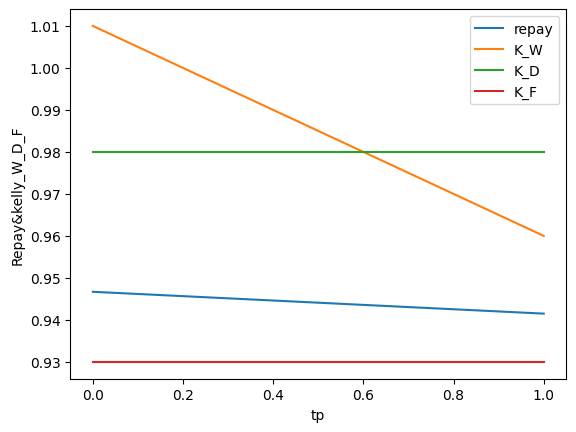

Data: 88 - OK
阿森纳 VS 诺丁汉森林 | 2023-08-12 20:00 | 2-1 | 2 VS 16 | 威廉希*(英国) Start: 06-15 18:03 Mid: 08-03 04:06 End: 08-12 19:30
https://1x2.titan007.com/oddslist/2398986.htm
Matchday: 18


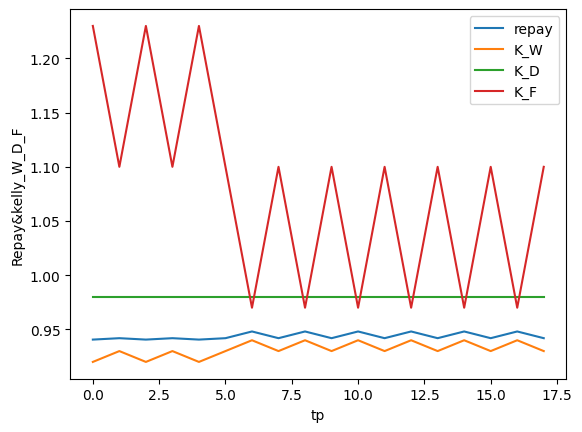

Data: 15 - OK
埃弗顿 VS 富勒姆 | 2023-08-12 22:00 | 0-1 | 17 VS 10 | 威廉希*(英国) Start: 06-15 18:03 Mid: 08-03 19:13 End: 08-12 21:44
https://1x2.titan007.com/oddslist/2398989.htm
Matchday: 6


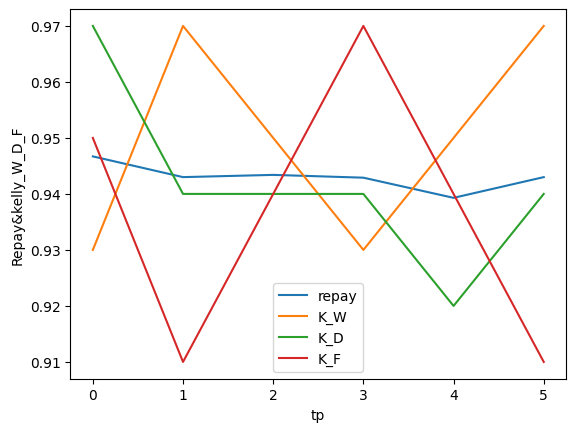

Data: 16 - OK
谢菲尔德联队 VS 水晶宫 | 2023-08-12 22:00 | 0-1 | 英冠2 VS 11 | 威廉希*(英国) Start: 06-15 18:03 Mid: 08-12 09:21 End: 08-12 21:49
https://1x2.titan007.com/oddslist/2398990.htm
Matchday: 10


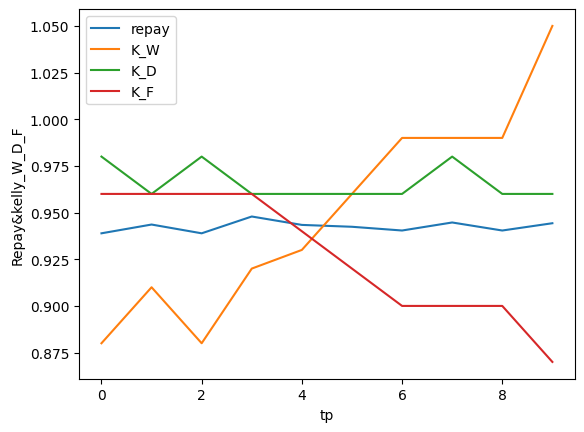

Data: 14 - OK
伯恩茅斯 VS 西汉姆联 | 2023-08-12 22:00 | 1-1 | 15 VS 14 | 威廉希*(英国) Start: 06-15 18:03 Mid: 08-04 03:13 End: 08-12 21:49
https://1x2.titan007.com/oddslist/2398987.htm
Matchday: 4


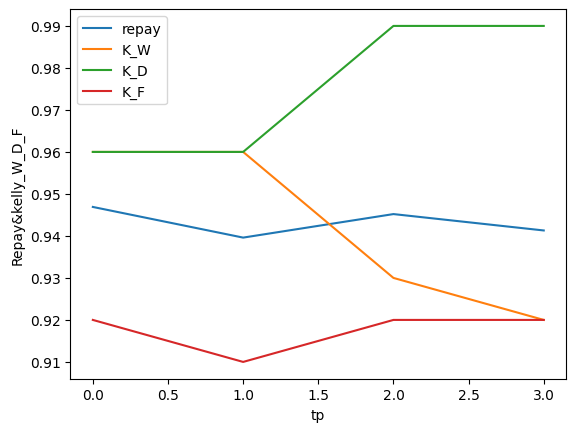

Data: 64 - OK
布莱顿 VS 卢顿 | 2023-08-12 22:00 | 4-1 | 6 VS 英冠3 | 威廉希*(英国) Start: 06-15 18:03 Mid: 08-06 11:02 End: 08-12 21:42
https://1x2.titan007.com/oddslist/2398988.htm
Matchday: 15


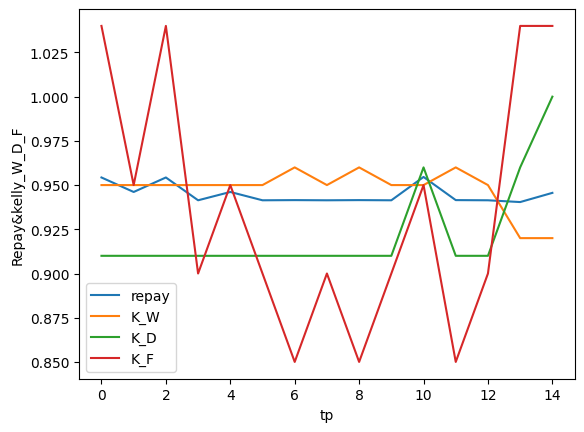

Data: 30 - OK
纽卡斯尔联 VS 阿斯顿维拉 | 2023-08-13 00:30 | 5-1 | 4 VS 7 | 威廉希*(英国) Start: 06-15 18:03 Mid: 08-06 00:41 End: 08-13 00:15
https://1x2.titan007.com/oddslist/2398991.htm
Matchday: 1


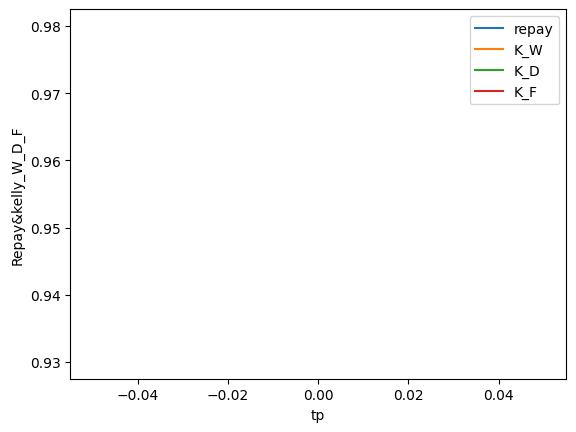

Data: 25 - OK
布伦特福德 VS 托特纳姆热刺 | 2023-08-13 21:05 | 2-2 | 9 VS 8 | 威廉希*(英国) Start: 06-15 18:03 Mid: 07-18 15:38 End: 08-13 20:36
https://1x2.titan007.com/oddslist/2398992.htm
Matchday: 7


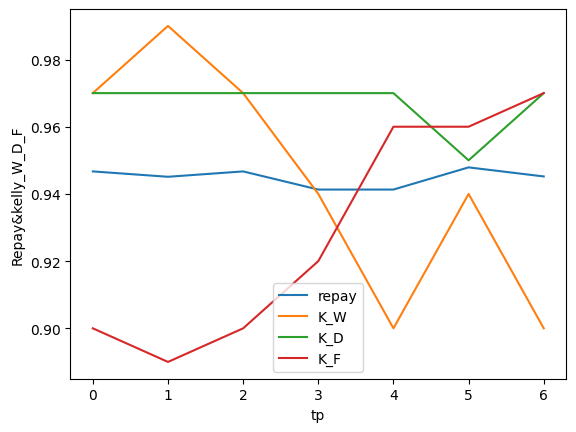

Data: 15 - OK
切尔西 VS 利物浦 | 2023-08-13 23:30 | 1-1 | 12 VS 5 | 威廉希*(英国) Start: 06-15 18:03 Mid: 08-10 16:33 End: 08-13 23:16
https://1x2.titan007.com/oddslist/2398993.htm
Matchday: 5


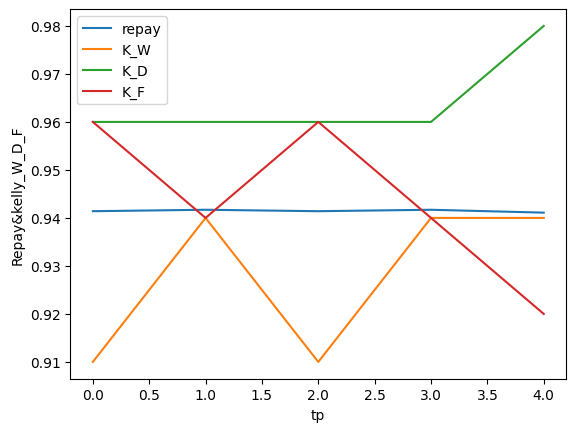

Data: 46 - OK
曼彻斯特联 VS 狼队 | 2023-08-15 03:00 | 1-0 | 3 VS 13 | 威廉希*(英国) Start: 06-15 18:03 Mid: 08-12 13:43 End: 08-15 02:54
https://1x2.titan007.com/oddslist/2398994.htm
Matchday: 1


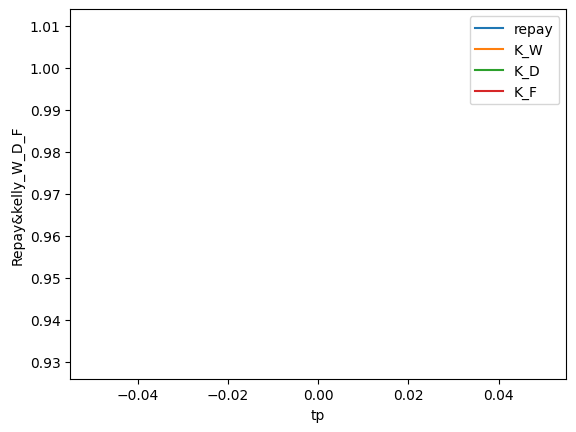

In [67]:
odds_1t, tps_1t = plot_match_1turn(pml_odds_s1, len(team_info), 0, '115')

In [51]:
len(pml_odds_s1)

279

Data: 48 - OK
伯恩利 VS 曼彻斯特城 | 2023-08-12 03:00 | 0-3 | 英冠1 VS 1 | 威廉希*(英国) Start: 06-15 18:03 Mid: 08-09 20:38 End: 08-12 02:22
https://1x2.titan007.com/oddslist/2398985.htm
Matchday: 2


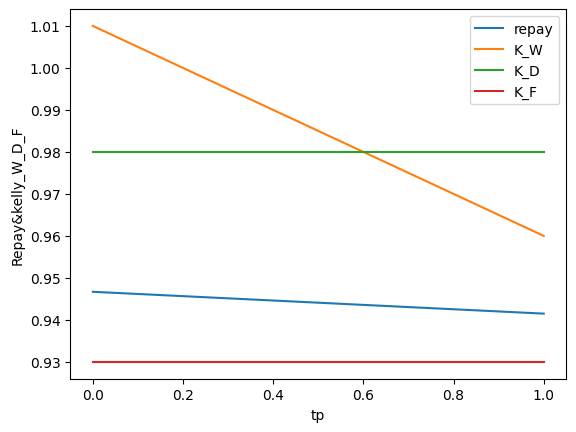

Data: 88 - OK
阿森纳 VS 诺丁汉森林 | 2023-08-12 20:00 | 2-1 | 2 VS 16 | 威廉希*(英国) Start: 06-15 18:03 Mid: 08-03 04:06 End: 08-12 19:30
https://1x2.titan007.com/oddslist/2398986.htm
Matchday: 18


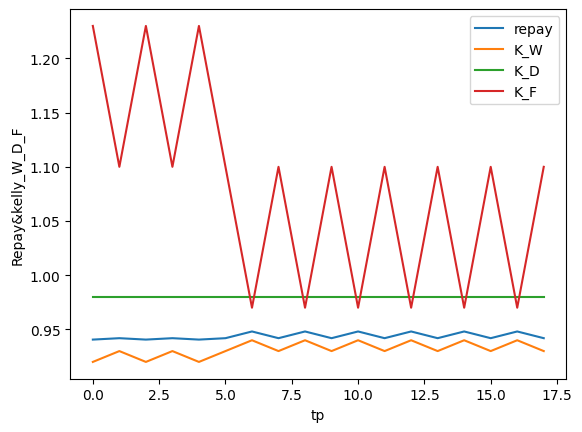

Data: 15 - OK
埃弗顿 VS 富勒姆 | 2023-08-12 22:00 | 0-1 | 17 VS 10 | 威廉希*(英国) Start: 06-15 18:03 Mid: 08-03 19:13 End: 08-12 21:44
https://1x2.titan007.com/oddslist/2398989.htm
Matchday: 6


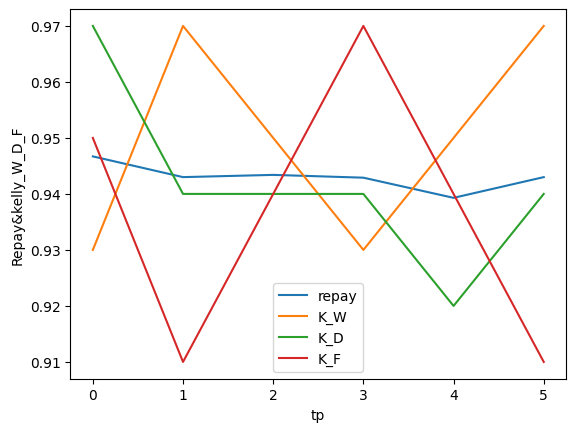

Data: 16 - OK
谢菲尔德联队 VS 水晶宫 | 2023-08-12 22:00 | 0-1 | 英冠2 VS 11 | 威廉希*(英国) Start: 06-15 18:03 Mid: 08-12 09:21 End: 08-12 21:49
https://1x2.titan007.com/oddslist/2398990.htm
Matchday: 10


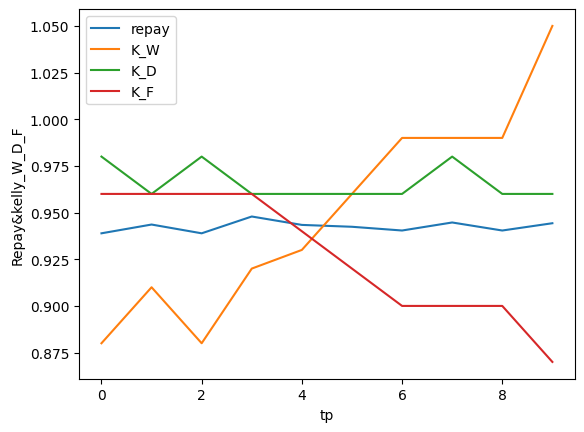

Data: 14 - OK
伯恩茅斯 VS 西汉姆联 | 2023-08-12 22:00 | 1-1 | 15 VS 14 | 威廉希*(英国) Start: 06-15 18:03 Mid: 08-04 03:13 End: 08-12 21:49
https://1x2.titan007.com/oddslist/2398987.htm
Matchday: 4


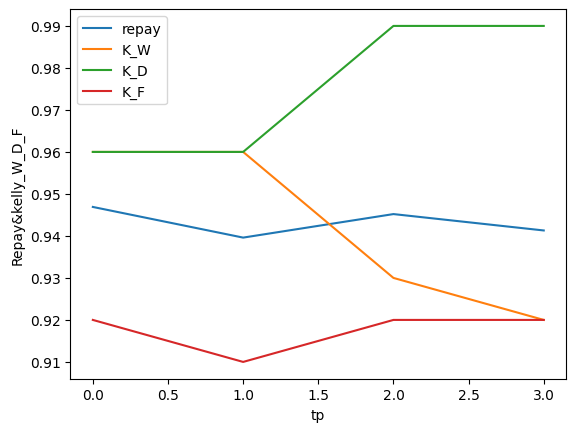

Data: 64 - OK
布莱顿 VS 卢顿 | 2023-08-12 22:00 | 4-1 | 6 VS 英冠3 | 威廉希*(英国) Start: 06-15 18:03 Mid: 08-06 11:02 End: 08-12 21:42
https://1x2.titan007.com/oddslist/2398988.htm
Matchday: 15


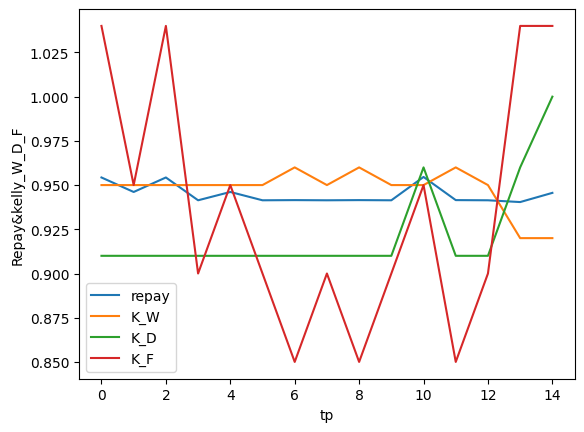

Data: 30 - OK
纽卡斯尔联 VS 阿斯顿维拉 | 2023-08-13 00:30 | 5-1 | 4 VS 7 | 威廉希*(英国) Start: 06-15 18:03 Mid: 08-06 00:41 End: 08-13 00:15
https://1x2.titan007.com/oddslist/2398991.htm
Matchday: 1


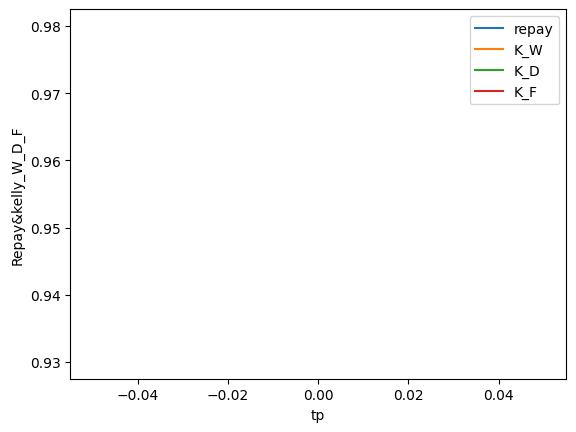

Data: 25 - OK
布伦特福德 VS 托特纳姆热刺 | 2023-08-13 21:05 | 2-2 | 9 VS 8 | 威廉希*(英国) Start: 06-15 18:03 Mid: 07-18 15:38 End: 08-13 20:36
https://1x2.titan007.com/oddslist/2398992.htm
Matchday: 7


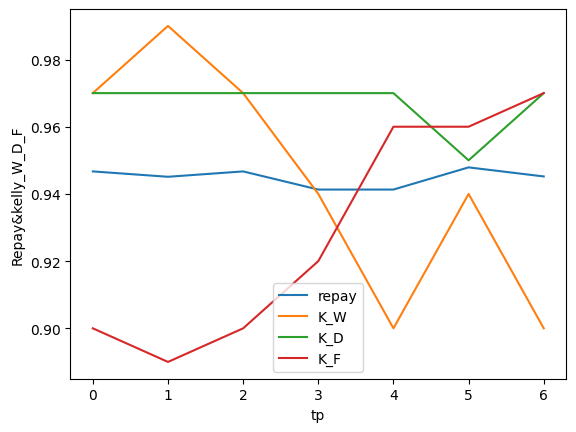

Data: 15 - OK
切尔西 VS 利物浦 | 2023-08-13 23:30 | 1-1 | 12 VS 5 | 威廉希*(英国) Start: 06-15 18:03 Mid: 08-10 16:33 End: 08-13 23:16
https://1x2.titan007.com/oddslist/2398993.htm
Matchday: 5


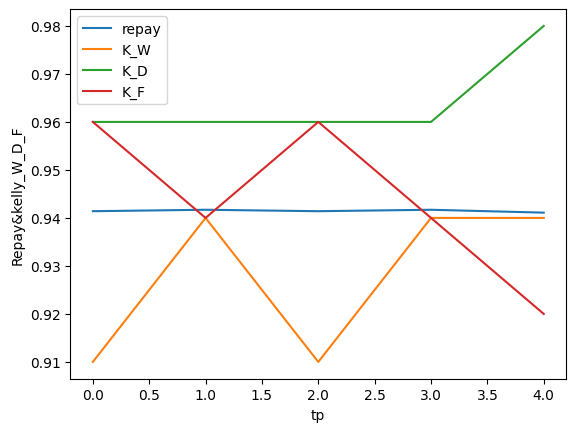

Data: 46 - OK
曼彻斯特联 VS 狼队 | 2023-08-15 03:00 | 1-0 | 3 VS 13 | 威廉希*(英国) Start: 06-15 18:03 Mid: 08-12 13:43 End: 08-15 02:54
https://1x2.titan007.com/oddslist/2398994.htm
Matchday: 1


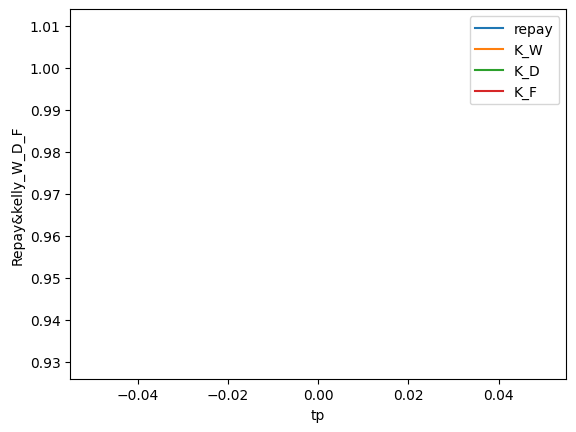

In [67]:
odds_1t, tps_1t = plot_match_1turn(pml_odds_s1, len(team_info), 1, '115', matchday=True)

In [56]:
len(odds_1t)

10

In [118]:
odds_1t

[array([[10.    ,  6.    ,  1.25  ,  0.0938,  0.1562,  0.75  ,  0.9375,
          1.07  ,  1.07  ,  0.89  ],
        [ 8.5   ,  5.5   ,  1.33  ,  0.1119,  0.1729,  0.7152,  0.9512,
          0.91  ,  0.98  ,  0.95  ],
        [10.    ,  6.    ,  1.25  ,  0.0938,  0.1562,  0.75  ,  0.9375,
          1.07  ,  1.07  ,  0.89  ],
        [ 8.5   ,  5.5   ,  1.33  ,  0.1119,  0.1729,  0.7152,  0.9512,
          0.91  ,  0.98  ,  0.95  ],
        [ 9.    ,  5.5   ,  1.3   ,  0.1046,  0.1712,  0.7242,  0.9415,
          0.96  ,  0.98  ,  0.93  ],
        [ 9.5   ,  5.5   ,  1.3   ,  0.0997,  0.1721,  0.7282,  0.9467,
          1.01  ,  0.98  ,  0.93  ],
        [ 9.    ,  5.5   ,  1.3   ,  0.1046,  0.1712,  0.7242,  0.9415,
          0.96  ,  0.98  ,  0.93  ],
        [ 8.5   ,  5.5   ,  1.33  ,  0.1119,  0.1729,  0.7152,  0.9512,
          0.91  ,  0.98  ,  0.95  ],
        [ 9.    ,  5.    ,  1.33  ,  0.1045,  0.1881,  0.7073,  0.9407,
          0.96  ,  0.89  ,  0.95  ],
        [ 9.5   ,  

In [52]:
def perfect_bet(odds):
    h, d, g = odds
    return 1/(1+h) + 1/(1+d) + 1/(1+g)

In [61]:
perfect_bet(odds_1t[3][-1,:3])

0.773441840703337

In [75]:
a, b, c = odds_1t[0][:,:3].T

In [92]:
np.square(odds_1t[0][:,:3]).T/a

array([[10.        ,  8.5       , 10.        ,  8.5       ,  9.        ,
         9.5       ,  9.        ,  8.5       ,  9.        ,  9.5       ,
         9.        ,  9.5       ,  9.        ,  9.5       ,  9.        ,
        10.        ,  9.5       , 10.        ,  8.5       ,  8.        ,
         8.5       ,  8.        ,  8.5       , 10.        , 11.        ,
        10.        , 11.        , 10.        , 10.        , 10.        ,
         9.        ,  9.5       ,  9.        ,  9.5       ,  9.        ,
         9.5       ,  9.        ,  9.5       ,  9.5       ,  9.        ,
         9.5       ,  9.        ,  9.5       ,  9.        ,  9.5       ,
         9.        ,  9.5       ,  9.        ],
       [ 3.6       ,  3.55882353,  3.6       ,  3.55882353,  3.36111111,
         3.18421053,  3.36111111,  3.55882353,  2.77777778,  3.18421053,
         2.77777778,  3.18421053,  3.36111111,  3.18421053,  3.36111111,
         3.025     ,  3.18421053,  3.025     ,  3.95764706,  4.5       ,
   

In [83]:
odds_1t[0][:,:3].T/a

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        ],
       [0.6       , 0.64705882, 0.6       , 0.64705882, 0.61111111,
        0.57894737, 0.61111111, 0.64705882, 0.55555556, 0.57894737,
        0.55555556, 0.57894737, 0.61111111, 0.57894737, 0.61111111,
        0.55      , 0.57894737, 0.55      , 0.68235294, 0.75      ,
        0.68235294, 0.75      , 0.68235294, 0.55      , 0.5       ,
   

Data: 48 - OK
伯恩利 VS 曼彻斯特城 | 2023-08-12 03:00 | 0-3 | 英冠1 VS 1 | 威廉希*(英国) Start: 06-15 18:03 Mid: 08-09 20:38 End: 08-12 02:22
https://1x2.titan007.com/oddslist/2398985.htm
Matchday: 2


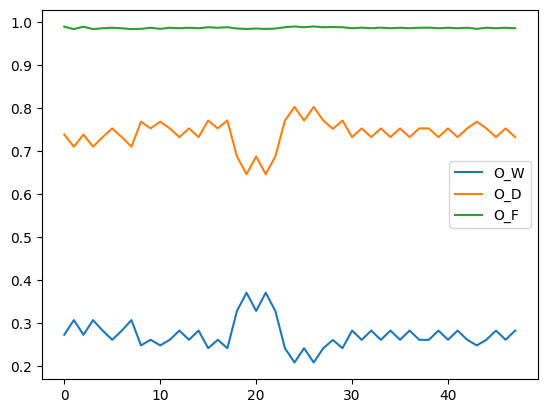

Data: 88 - OK
阿森纳 VS 诺丁汉森林 | 2023-08-12 20:00 | 2-1 | 2 VS 16 | 威廉希*(英国) Start: 06-15 18:03 Mid: 08-03 04:06 End: 08-12 19:30
https://1x2.titan007.com/oddslist/2398986.htm
Matchday: 18


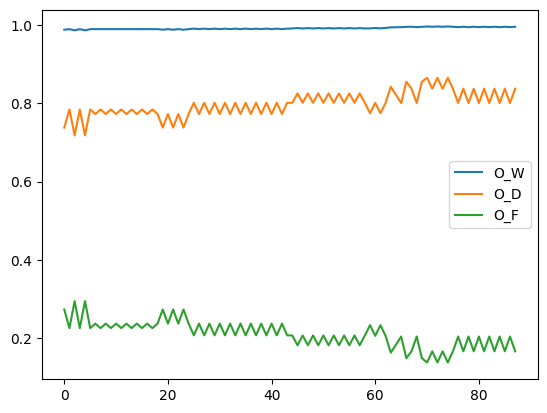

Data: 15 - OK
埃弗顿 VS 富勒姆 | 2023-08-12 22:00 | 0-1 | 17 VS 10 | 威廉希*(英国) Start: 06-15 18:03 Mid: 08-03 19:13 End: 08-12 21:44
https://1x2.titan007.com/oddslist/2398989.htm
Matchday: 6


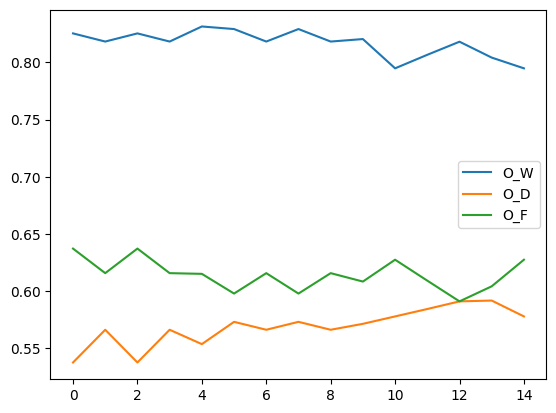

Data: 16 - OK
谢菲尔德联队 VS 水晶宫 | 2023-08-12 22:00 | 0-1 | 英冠2 VS 11 | 威廉希*(英国) Start: 06-15 18:03 Mid: 08-12 09:21 End: 08-12 21:49
https://1x2.titan007.com/oddslist/2398990.htm
Matchday: 10


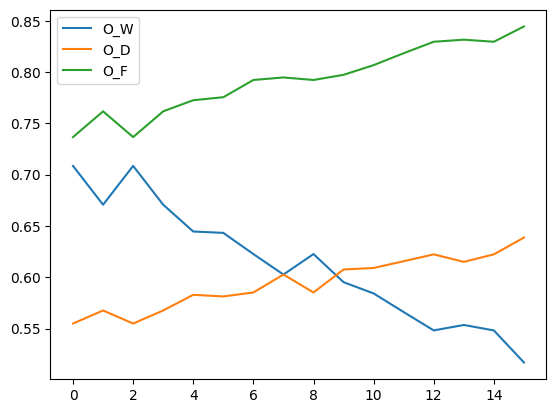

Data: 14 - OK
伯恩茅斯 VS 西汉姆联 | 2023-08-12 22:00 | 1-1 | 15 VS 14 | 威廉希*(英国) Start: 06-15 18:03 Mid: 08-04 03:13 End: 08-12 21:49
https://1x2.titan007.com/oddslist/2398987.htm
Matchday: 4


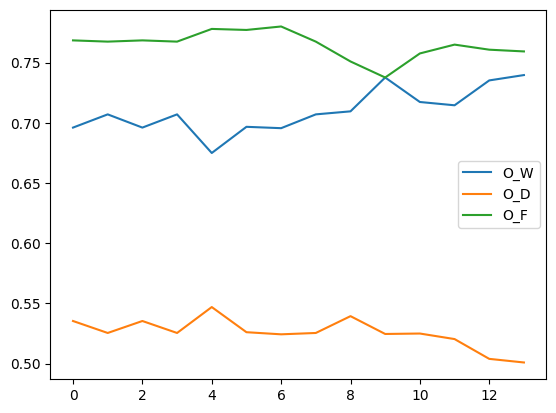

Data: 64 - OK
布莱顿 VS 卢顿 | 2023-08-12 22:00 | 4-1 | 6 VS 英冠3 | 威廉希*(英国) Start: 06-15 18:03 Mid: 08-06 11:02 End: 08-12 21:42
https://1x2.titan007.com/oddslist/2398988.htm
Matchday: 15


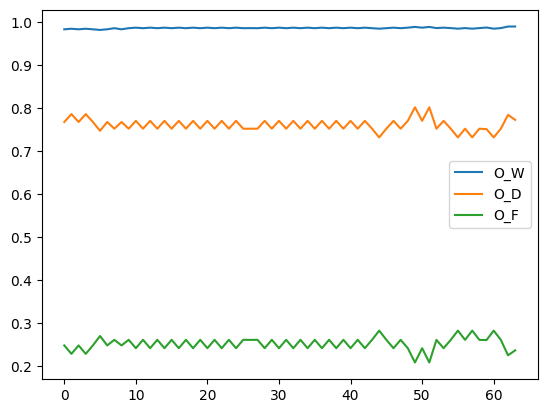

Data: 30 - OK
纽卡斯尔联 VS 阿斯顿维拉 | 2023-08-13 00:30 | 5-1 | 4 VS 7 | 威廉希*(英国) Start: 06-15 18:03 Mid: 08-06 00:41 End: 08-13 00:15
https://1x2.titan007.com/oddslist/2398991.htm
Matchday: 1


Data: 25 - OK
布伦特福德 VS 托特纳姆热刺 | 2023-08-13 21:05 | 2-2 | 9 VS 8 | 威廉希*(英国) Start: 06-15 18:03 Mid: 07-18 15:38 End: 08-13 20:36
https://1x2.titan007.com/oddslist/2398992.htm
Matchday: 7


Data: 15 - OK
切尔西 VS 利物浦 | 2023-08-13 23:30 | 1-1 | 12 VS 5 | 威廉希*(英国) Start: 06-15 18:03 Mid: 08-10 16:33 End: 08-13 23:16
https://1x2.titan007.com/oddslist/2398993.htm
Matchday: 5


Data: 46 - OK
曼彻斯特联 VS 狼队 | 2023-08-15 03:00 | 1-0 | 3 VS 13 | 威廉希*(英国) Start: 06-15 18:03 Mid: 08-12 13:43 End: 08-15 02:54
https://1x2.titan007.com/oddslist/2398994.htm
Matchday: 1


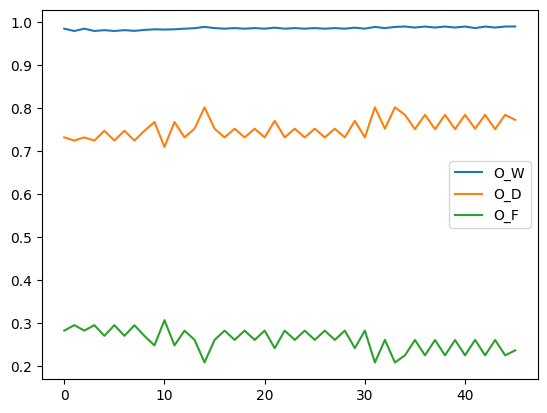

([array([[10.    ,  6.    ,  1.25  ,  0.0938,  0.1562,  0.75  ,  0.9375,
           1.07  ,  1.07  ,  0.89  ],
         [ 8.5   ,  5.5   ,  1.33  ,  0.1119,  0.1729,  0.7152,  0.9512,
           0.91  ,  0.98  ,  0.95  ],
         [10.    ,  6.    ,  1.25  ,  0.0938,  0.1562,  0.75  ,  0.9375,
           1.07  ,  1.07  ,  0.89  ],
         [ 8.5   ,  5.5   ,  1.33  ,  0.1119,  0.1729,  0.7152,  0.9512,
           0.91  ,  0.98  ,  0.95  ],
         [ 9.    ,  5.5   ,  1.3   ,  0.1046,  0.1712,  0.7242,  0.9415,
           0.96  ,  0.98  ,  0.93  ],
         [ 9.5   ,  5.5   ,  1.3   ,  0.0997,  0.1721,  0.7282,  0.9467,
           1.01  ,  0.98  ,  0.93  ],
         [ 9.    ,  5.5   ,  1.3   ,  0.1046,  0.1712,  0.7242,  0.9415,
           0.96  ,  0.98  ,  0.93  ],
         [ 8.5   ,  5.5   ,  1.33  ,  0.1119,  0.1729,  0.7152,  0.9512,
           0.91  ,  0.98  ,  0.95  ],
         [ 9.    ,  5.    ,  1.33  ,  0.1045,  0.1881,  0.7073,  0.9407,
           0.96  ,  0.89  ,  0.95  ],
 

In [96]:
plot_match_1turn(pml_odds_s1, len(team_info), 1, '115', cubic=True)

Data: 48 - OK
伯恩利 VS 曼彻斯特城 | 2023-08-12 03:00 | 0-3 | 英冠1 VS 1 | 威廉希*(英国) Start: 06-15 18:03 Mid: 08-09 20:38 End: 08-12 02:22
https://1x2.titan007.com/oddslist/2398985.htm
Matchday: 2
1P Diff: [ 0.04846667  0.04138333 -0.016325  ]
2P Diff: [0.00672329 0.00308996 0.00040308]


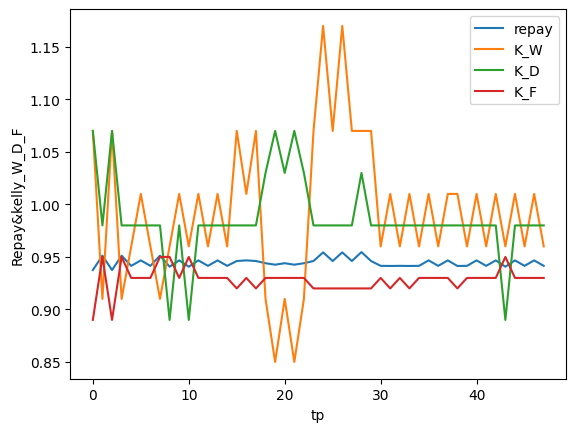

Data: 88 - OK
阿森纳 VS 诺丁汉森林 | 2023-08-12 20:00 | 2-1 | 2 VS 16 | 威廉希*(英国) Start: 06-15 18:03 Mid: 08-03 04:06 End: 08-12 19:30
https://1x2.titan007.com/oddslist/2398986.htm
Matchday: 18
1P Diff: [ 0.03881023 -0.10391705 -0.11209886]
2P Diff: [0.00256803 0.01773653 0.03844471]


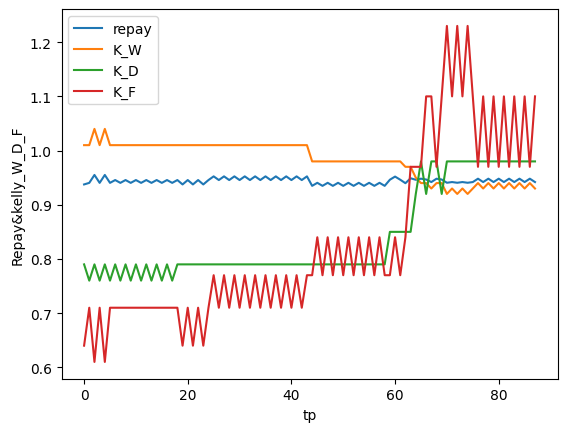

Data: 15 - OK
埃弗顿 VS 富勒姆 | 2023-08-12 22:00 | 0-1 | 17 VS 10 | 威廉希*(英国) Start: 06-15 18:03 Mid: 08-03 19:13 End: 08-12 21:44
https://1x2.titan007.com/oddslist/2398989.htm
Matchday: 6
1P Diff: [-0.00990667  0.02342667 -0.00190667]
2P Diff: [0.00045237 0.00120343 0.00037037]


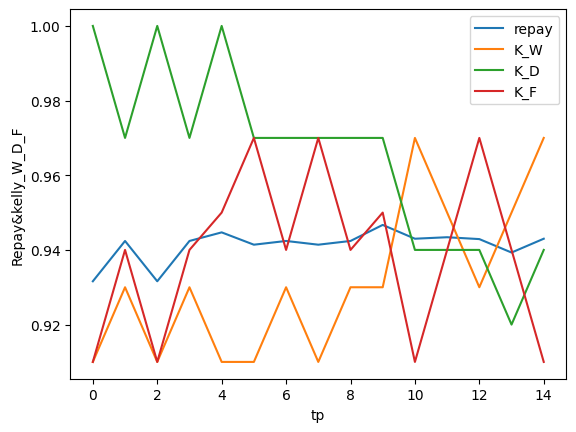

Data: 16 - OK
谢菲尔德联队 VS 水晶宫 | 2023-08-12 22:00 | 0-1 | 英冠2 VS 11 | 威廉希*(英国) Start: 06-15 18:03 Mid: 08-12 09:21 End: 08-12 21:49
https://1x2.titan007.com/oddslist/2398990.htm
Matchday: 10
1P Diff: [-0.04504375  0.03245625  0.02120625]
2P Diff: [0.00878093 0.00129568 0.00364643]


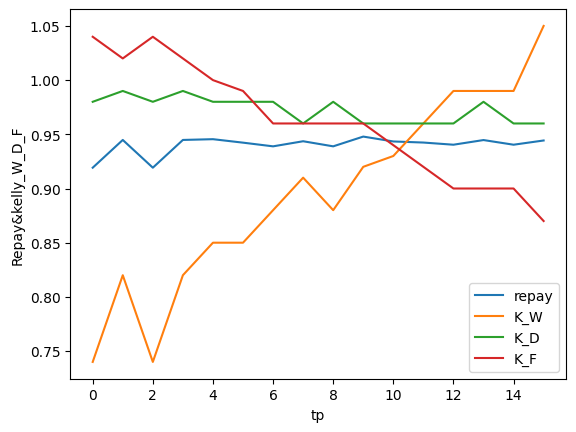

Data: 14 - OK
伯恩茅斯 VS 西汉姆联 | 2023-08-12 22:00 | 1-1 | 15 VS 14 | 威廉希*(英国) Start: 06-15 18:03 Mid: 08-04 03:13 End: 08-12 21:49
https://1x2.titan007.com/oddslist/2398987.htm
Matchday: 4
1P Diff: [ 0.02606429  0.01677857 -0.03393571]
2P Diff: [0.00153712 0.00046769 0.00148298]


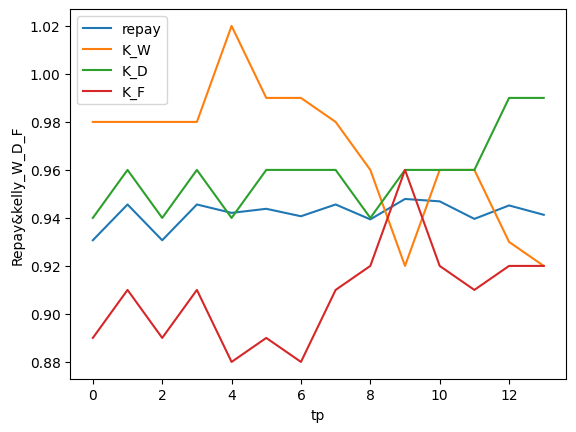

Data: 64 - OK
布莱顿 VS 卢顿 | 2023-08-12 22:00 | 4-1 | 6 VS 英冠3 | 威廉希*(英国) Start: 06-15 18:03 Mid: 08-06 11:02 End: 08-12 21:42
https://1x2.titan007.com/oddslist/2398988.htm
Matchday: 15
1P Diff: [ 0.01145937 -0.04229062 -0.02869687]
2P Diff: [0.00029741 0.0026671  0.00292169]


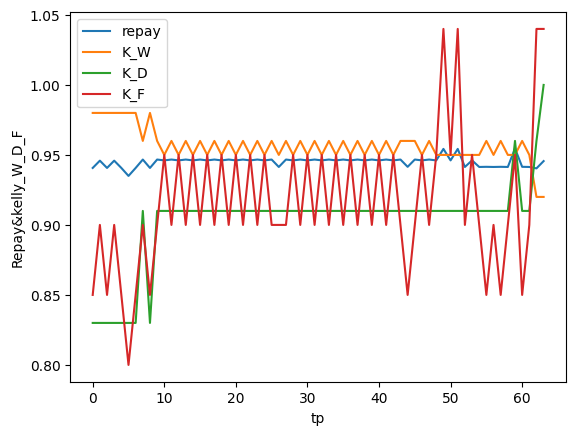

Data: 30 - OK
纽卡斯尔联 VS 阿斯顿维拉 | 2023-08-13 00:30 | 5-1 | 4 VS 7 | 威廉希*(英国) Start: 06-15 18:03 Mid: 08-06 00:41 End: 08-13 00:15
https://1x2.titan007.com/oddslist/2398991.htm
Matchday: 1
1P Diff: [ 0.03702333 -0.03231    -0.06331   ]
2P Diff: [0.00182664 0.00173518 0.00556551]


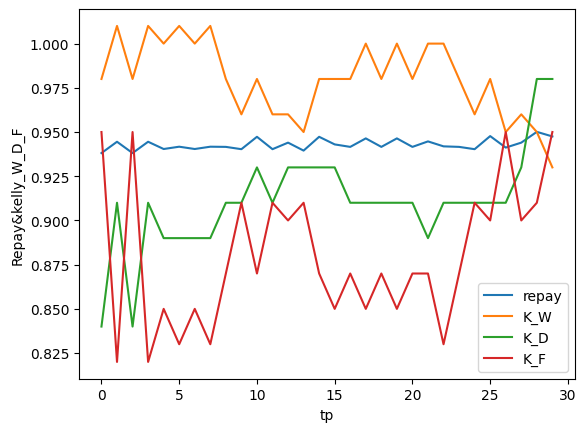

Data: 25 - OK
布伦特福德 VS 托特纳姆热刺 | 2023-08-13 21:05 | 2-2 | 9 VS 8 | 威廉希*(英国) Start: 06-15 18:03 Mid: 07-18 15:38 End: 08-13 20:36
https://1x2.titan007.com/oddslist/2398992.htm
Matchday: 7
1P Diff: [ 0.078356  0.022356 -0.071644]
2P Diff: [0.0130293  0.00066618 0.0076397 ]


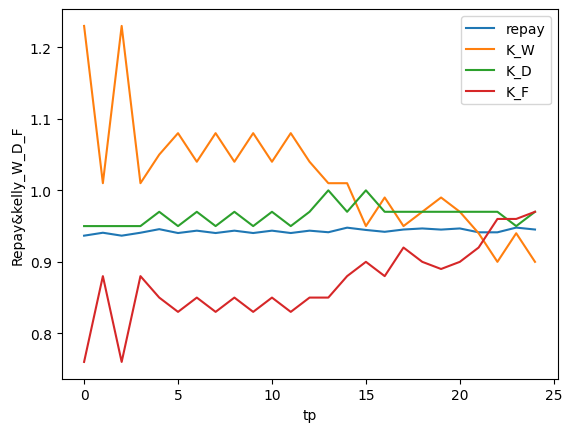

Data: 15 - OK
切尔西 VS 利物浦 | 2023-08-13 23:30 | 1-1 | 12 VS 5 | 威廉希*(英国) Start: 06-15 18:03 Mid: 08-10 16:33 End: 08-13 23:16
https://1x2.titan007.com/oddslist/2398993.htm
Matchday: 5
1P Diff: [-0.03444667 -0.00644667  0.04022   ]
2P Diff: [0.00273415 0.00072321 0.00454801]


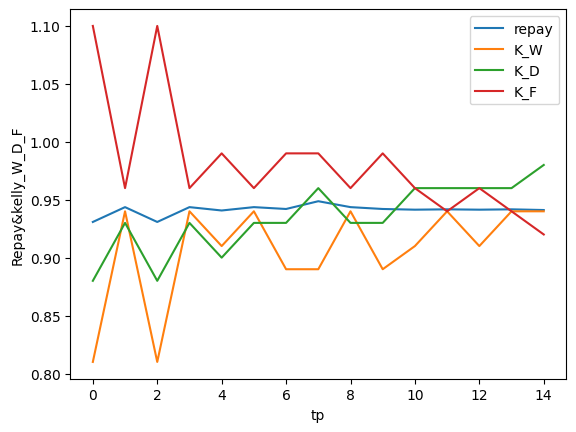

Data: 46 - OK
曼彻斯特联 VS 狼队 | 2023-08-15 03:00 | 1-0 | 3 VS 13 | 威廉希*(英国) Start: 06-15 18:03 Mid: 08-12 13:43 End: 08-15 02:54
https://1x2.titan007.com/oddslist/2398994.htm
Matchday: 1
1P Diff: [ 0.02259348 -0.04675435 -0.07110217]
2P Diff: [0.00100994 0.00404633 0.0124812 ]


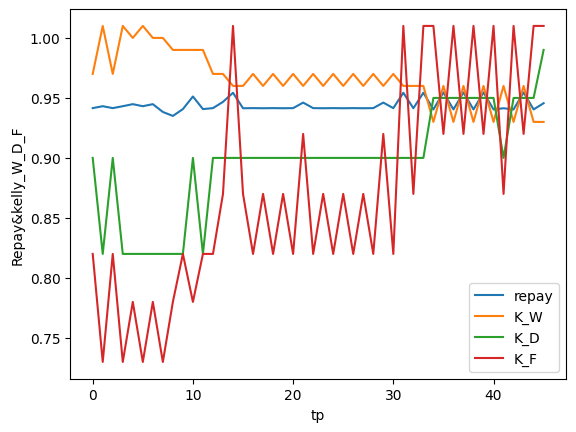

([array([[10.    ,  6.    ,  1.25  ,  0.0938,  0.1562,  0.75  ,  0.9375,
           1.07  ,  1.07  ,  0.89  ],
         [ 8.5   ,  5.5   ,  1.33  ,  0.1119,  0.1729,  0.7152,  0.9512,
           0.91  ,  0.98  ,  0.95  ],
         [10.    ,  6.    ,  1.25  ,  0.0938,  0.1562,  0.75  ,  0.9375,
           1.07  ,  1.07  ,  0.89  ],
         [ 8.5   ,  5.5   ,  1.33  ,  0.1119,  0.1729,  0.7152,  0.9512,
           0.91  ,  0.98  ,  0.95  ],
         [ 9.    ,  5.5   ,  1.3   ,  0.1046,  0.1712,  0.7242,  0.9415,
           0.96  ,  0.98  ,  0.93  ],
         [ 9.5   ,  5.5   ,  1.3   ,  0.0997,  0.1721,  0.7282,  0.9467,
           1.01  ,  0.98  ,  0.93  ],
         [ 9.    ,  5.5   ,  1.3   ,  0.1046,  0.1712,  0.7242,  0.9415,
           0.96  ,  0.98  ,  0.93  ],
         [ 8.5   ,  5.5   ,  1.33  ,  0.1119,  0.1729,  0.7152,  0.9512,
           0.91  ,  0.98  ,  0.95  ],
         [ 9.    ,  5.    ,  1.33  ,  0.1045,  0.1881,  0.7073,  0.9407,
           0.96  ,  0.89  ,  0.95  ],
 

In [97]:
plot_match_1turn(pml_odds_s1, len(team_info), 1, '115', diff=True)

Data: 48 - OK
伯恩利 VS 曼彻斯特城 | 2023-08-12 03:00 | 0-3 | 英冠1 VS 1 | 威廉希*(英国) Start: 06-15 18:03 Mid: 08-09 20:38 End: 08-12 02:22
https://1x2.titan007.com/oddslist/2398985.htm
Matchday: 2


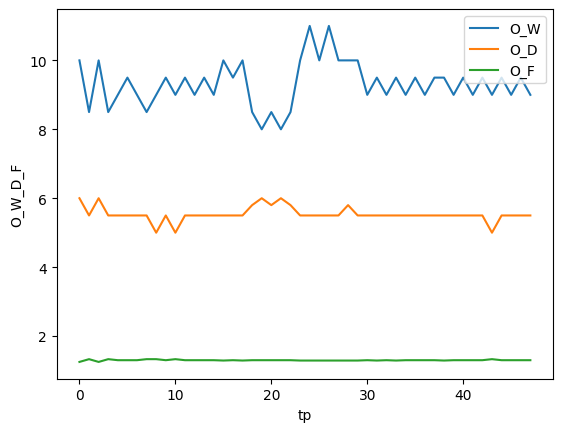

Data: 88 - OK
阿森纳 VS 诺丁汉森林 | 2023-08-12 20:00 | 2-1 | 2 VS 16 | 威廉希*(英国) Start: 06-15 18:03 Mid: 08-03 04:06 End: 08-12 19:30
https://1x2.titan007.com/oddslist/2398986.htm
Matchday: 18


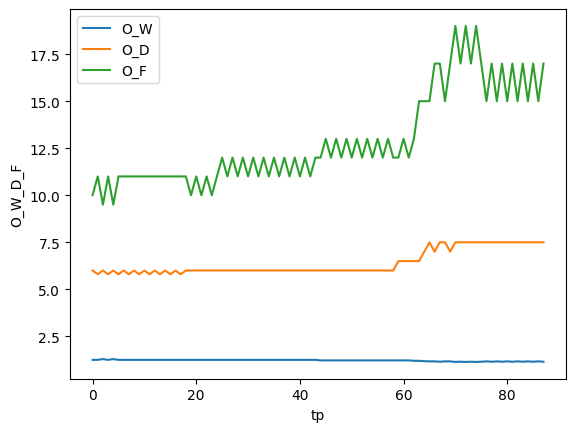

Data: 15 - OK
埃弗顿 VS 富勒姆 | 2023-08-12 22:00 | 0-1 | 17 VS 10 | 威廉希*(英国) Start: 06-15 18:03 Mid: 08-03 19:13 End: 08-12 21:44
https://1x2.titan007.com/oddslist/2398989.htm
Matchday: 6


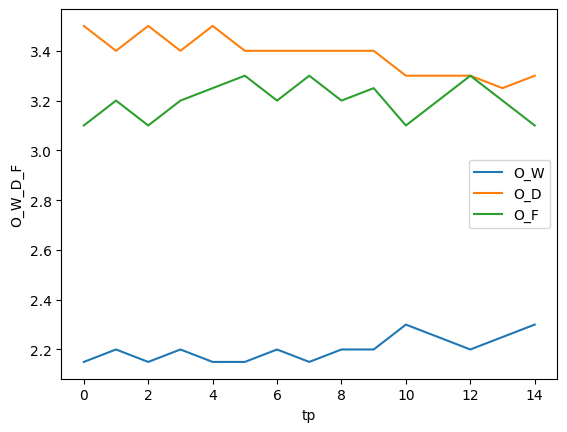

Data: 16 - OK
谢菲尔德联队 VS 水晶宫 | 2023-08-12 22:00 | 0-1 | 英冠2 VS 11 | 威廉希*(英国) Start: 06-15 18:03 Mid: 08-12 09:21 End: 08-12 21:49
https://1x2.titan007.com/oddslist/2398990.htm
Matchday: 10


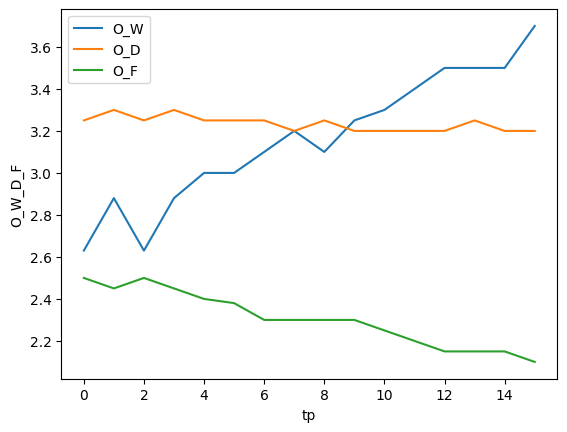

Data: 14 - OK
伯恩茅斯 VS 西汉姆联 | 2023-08-12 22:00 | 1-1 | 15 VS 14 | 威廉希*(英国) Start: 06-15 18:03 Mid: 08-04 03:13 End: 08-12 21:49
https://1x2.titan007.com/oddslist/2398987.htm
Matchday: 4


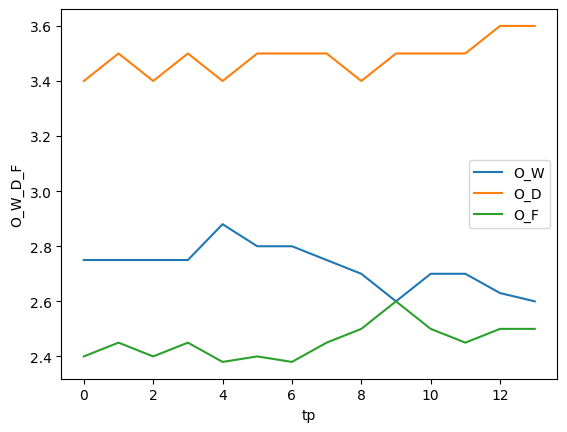

Data: 64 - OK
布莱顿 VS 卢顿 | 2023-08-12 22:00 | 4-1 | 6 VS 英冠3 | 威廉希*(英国) Start: 06-15 18:03 Mid: 08-06 11:02 End: 08-12 21:42
https://1x2.titan007.com/oddslist/2398988.htm
Matchday: 15


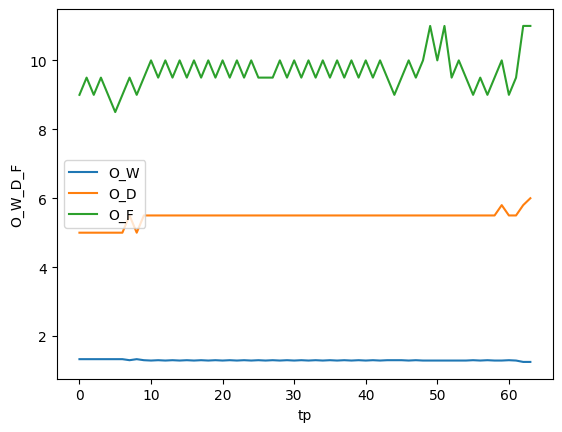

Data: 30 - OK
纽卡斯尔联 VS 阿斯顿维拉 | 2023-08-13 00:30 | 5-1 | 4 VS 7 | 威廉希*(英国) Start: 06-15 18:03 Mid: 08-06 00:41 End: 08-13 00:15
https://1x2.titan007.com/oddslist/2398991.htm
Matchday: 1


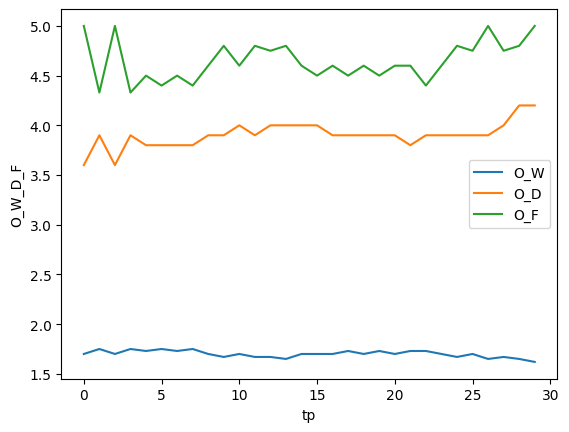

Data: 25 - OK
布伦特福德 VS 托特纳姆热刺 | 2023-08-13 21:05 | 2-2 | 9 VS 8 | 威廉希*(英国) Start: 06-15 18:03 Mid: 07-18 15:38 End: 08-13 20:36
https://1x2.titan007.com/oddslist/2398992.htm
Matchday: 7


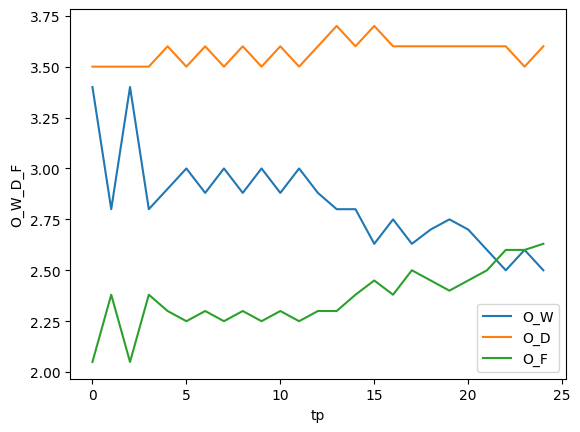

Data: 15 - OK
切尔西 VS 利物浦 | 2023-08-13 23:30 | 1-1 | 12 VS 5 | 威廉希*(英国) Start: 06-15 18:03 Mid: 08-10 16:33 End: 08-13 23:16
https://1x2.titan007.com/oddslist/2398993.htm
Matchday: 5


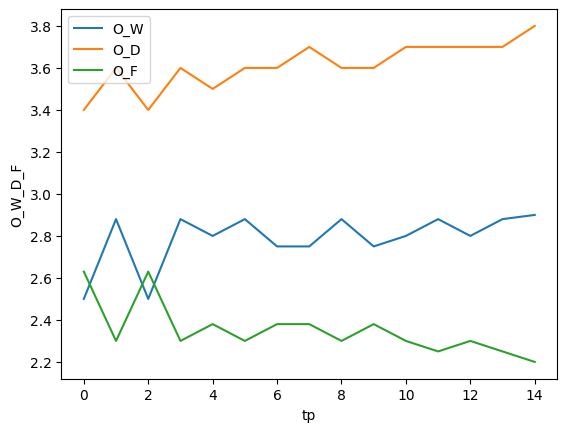

Data: 46 - OK
曼彻斯特联 VS 狼队 | 2023-08-15 03:00 | 1-0 | 3 VS 13 | 威廉希*(英国) Start: 06-15 18:03 Mid: 08-12 13:43 End: 08-15 02:54
https://1x2.titan007.com/oddslist/2398994.htm
Matchday: 1


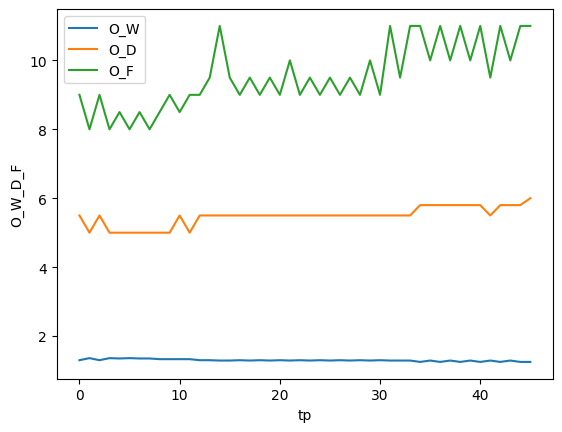

([array([[10.    ,  6.    ,  1.25  ,  0.0938,  0.1562,  0.75  ,  0.9375,
           1.07  ,  1.07  ,  0.89  ],
         [ 8.5   ,  5.5   ,  1.33  ,  0.1119,  0.1729,  0.7152,  0.9512,
           0.91  ,  0.98  ,  0.95  ],
         [10.    ,  6.    ,  1.25  ,  0.0938,  0.1562,  0.75  ,  0.9375,
           1.07  ,  1.07  ,  0.89  ],
         [ 8.5   ,  5.5   ,  1.33  ,  0.1119,  0.1729,  0.7152,  0.9512,
           0.91  ,  0.98  ,  0.95  ],
         [ 9.    ,  5.5   ,  1.3   ,  0.1046,  0.1712,  0.7242,  0.9415,
           0.96  ,  0.98  ,  0.93  ],
         [ 9.5   ,  5.5   ,  1.3   ,  0.0997,  0.1721,  0.7282,  0.9467,
           1.01  ,  0.98  ,  0.93  ],
         [ 9.    ,  5.5   ,  1.3   ,  0.1046,  0.1712,  0.7242,  0.9415,
           0.96  ,  0.98  ,  0.93  ],
         [ 8.5   ,  5.5   ,  1.33  ,  0.1119,  0.1729,  0.7152,  0.9512,
           0.91  ,  0.98  ,  0.95  ],
         [ 9.    ,  5.    ,  1.33  ,  0.1045,  0.1881,  0.7073,  0.9407,
           0.96  ,  0.89  ,  0.95  ],
 

In [70]:
plot_match_1turn(pml_odds_s1, len(team_info), 1, '115', plot_odd=True)

Data: 58 - OK
诺丁汉森林 VS 谢菲尔德联队 | 2023-08-19 02:45 | 2-1 | 14 VS 16 | 威廉希*(英国) Start: 07-26 00:10 Mid: 08-05 15:41 End: 08-16 18:34
https://1x2.titan007.com/oddslist/2399073.htm
Matchday: 58


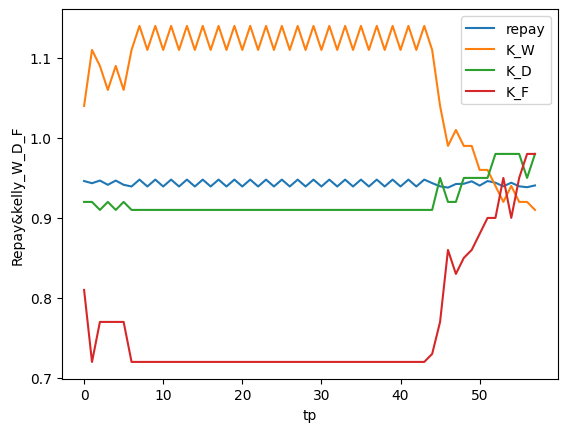

Data: 36 - OK
富勒姆 VS 布伦特福德 | 2023-08-19 22:00 | 0-3 | 6 VS 10 | 威廉希*(英国) Start: 07-26 00:10 Mid: 08-12 22:23 End: 08-19 21:43
https://1x2.titan007.com/oddslist/2399069.htm
Matchday: 13


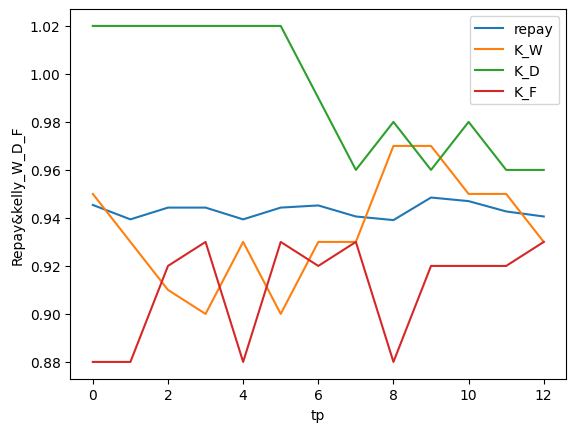

Data: 44 - OK
利物浦 VS 伯恩茅斯 | 2023-08-19 22:00 | 3-1 | 12 VS 14 | 威廉希*(英国) Start: 07-26 00:10 Mid: 08-13 07:34 End: 08-19 21:37
https://1x2.titan007.com/oddslist/2399070.htm
Matchday: 5


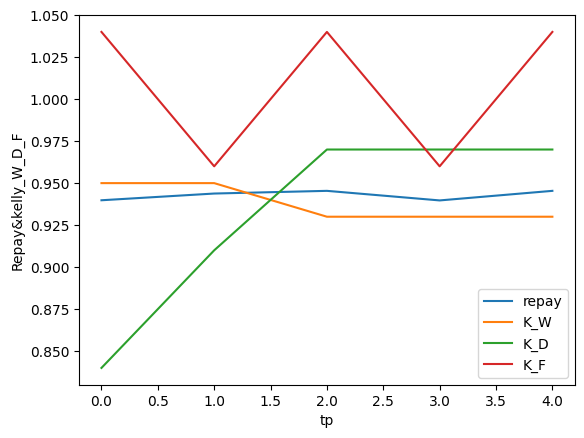

Data: 102 - OK
狼队 VS 布莱顿 | 2023-08-19 22:00 | 1-4 | 16 VS 2 | 威廉希*(英国) Start: 07-26 00:10 Mid: 08-06 22:53 End: 08-19 21:32
https://1x2.titan007.com/oddslist/2399076.htm
Matchday: 5


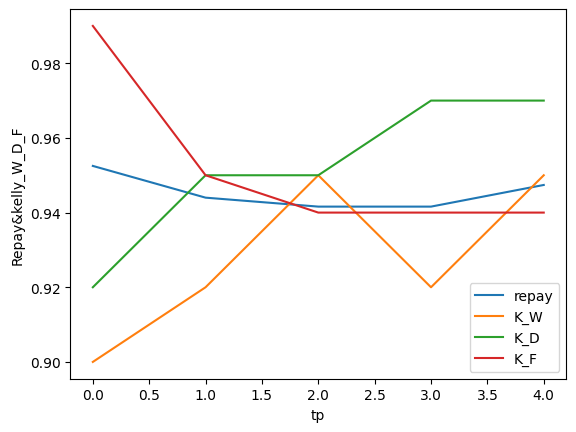

Data: 28 - OK
托特纳姆热刺 VS 曼彻斯特联 | 2023-08-20 00:30 | 2-0 | 9 VS 5 | 威廉希*(英国) Start: 07-26 00:10 Mid: 08-15 15:21 End: 08-20 00:09
https://1x2.titan007.com/oddslist/2399074.htm
Matchday: 2


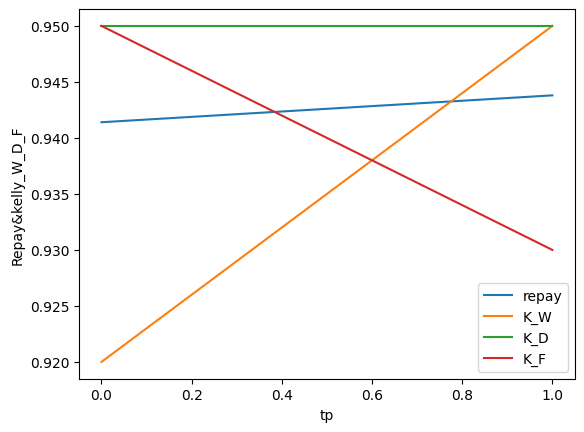

Data: 134 - OK
曼彻斯特城 VS 纽卡斯尔联 | 2023-08-20 03:00 | 1-0 | 3 VS 1 | 威廉希*(英国) Start: 07-26 00:10 Mid: 08-10 04:57 End: 08-20 02:43
https://1x2.titan007.com/oddslist/2399072.htm
Matchday: 6


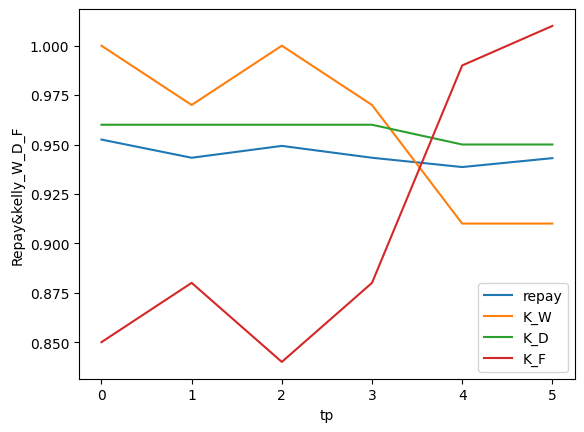

Data: 107 - OK
阿斯顿维拉 VS 埃弗顿 | 2023-08-20 21:00 | 4-0 | 19 VS 15 | 威廉希*(英国) Start: 07-26 00:10 Mid: 08-11 06:55 End: 08-20 20:23
https://1x2.titan007.com/oddslist/2399067.htm
Matchday: 14


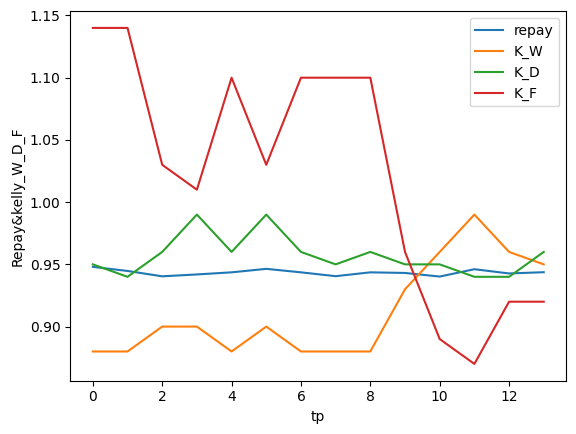

Data: 107 - OK
西汉姆联 VS 切尔西 | 2023-08-20 23:30 | 3-1 | 13 VS 12 | 威廉希*(英国) Start: 07-26 00:10 Mid: 08-10 06:53 End: 08-20 23:28
https://1x2.titan007.com/oddslist/2399075.htm
Matchday: 17


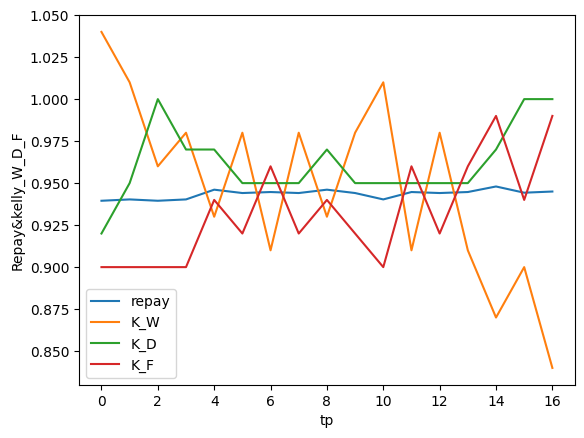

Data: 144 - OK
水晶宫 VS 阿森纳 | 2023-08-22 03:00 | 0-1 | 9 VS 8 | 威廉希*(英国) Start: 07-26 00:10 Mid: 08-09 14:20 End: 08-22 02:36
https://1x2.titan007.com/oddslist/2399068.htm
Matchday: 14


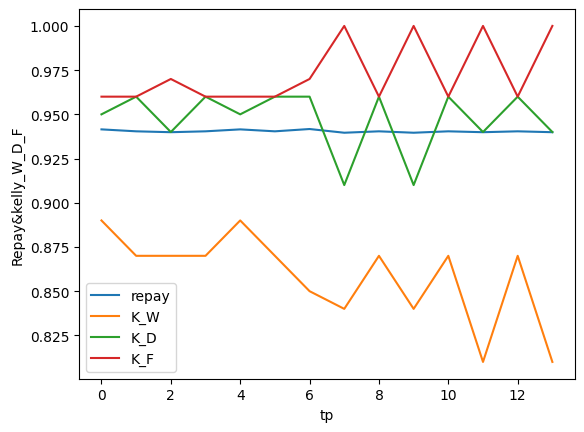

Data: 15 - OK
卢顿 VS 伯恩利 | 2023-10-04 02:30 | 1-2 | 17 VS 19 | 威廉希*(英国) Start: 09-25 02:48 Mid: 10-03 12:48 End: 10-04 02:16
https://1x2.titan007.com/oddslist/2399071.htm
Matchday: 5


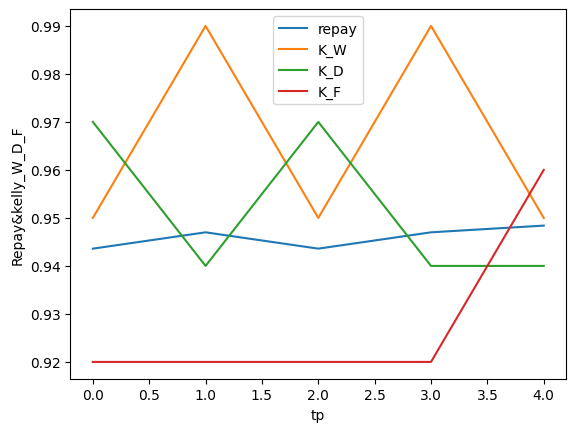

In [81]:
plot_match_1turn(pml_odds_s1, len(team_info), 2, '115', matchday=True)

Data: 58 - OK
诺丁汉森林 VS 谢菲尔德联队 | 2023-08-19 02:45 | 2-1 | 14 VS 16 | 威廉希*(英国) Start: 07-26 00:10 Mid: 08-05 15:41 End: 08-16 18:34
https://1x2.titan007.com/oddslist/2399073.htm


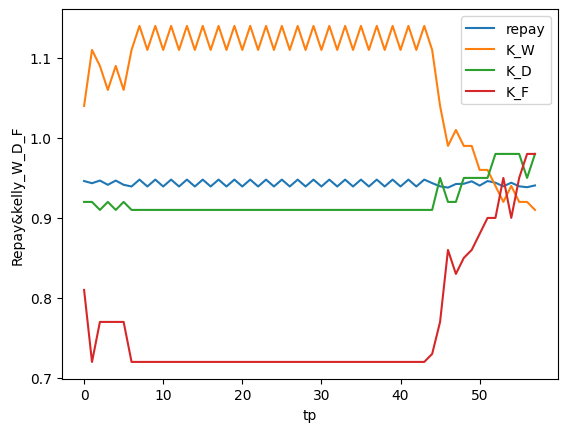

Data: 36 - OK
富勒姆 VS 布伦特福德 | 2023-08-19 22:00 | 0-3 | 6 VS 10 | 威廉希*(英国) Start: 07-26 00:10 Mid: 08-12 22:23 End: 08-19 21:43
https://1x2.titan007.com/oddslist/2399069.htm


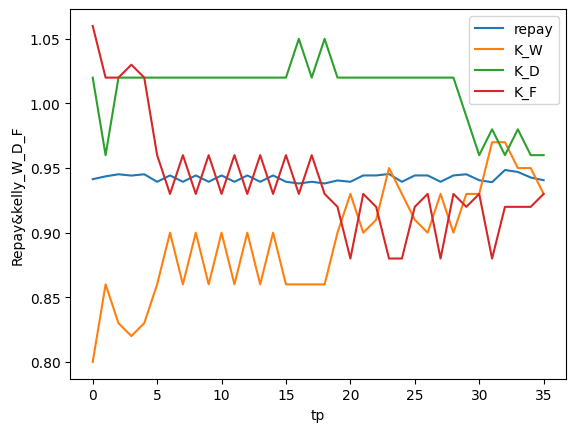

Data: 44 - OK
利物浦 VS 伯恩茅斯 | 2023-08-19 22:00 | 3-1 | 12 VS 14 | 威廉希*(英国) Start: 07-26 00:10 Mid: 08-13 07:34 End: 08-19 21:37
https://1x2.titan007.com/oddslist/2399070.htm


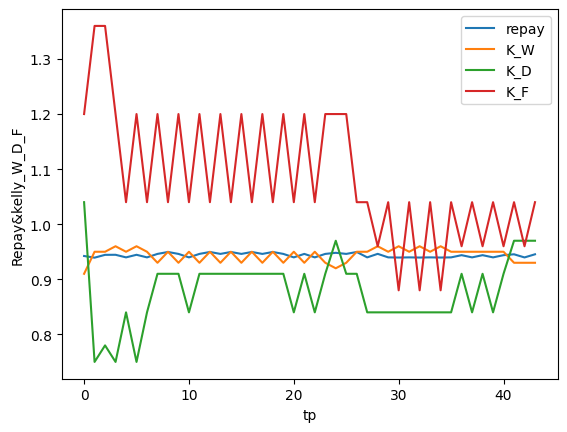

Data: 102 - OK
狼队 VS 布莱顿 | 2023-08-19 22:00 | 1-4 | 16 VS 2 | 威廉希*(英国) Start: 07-26 00:10 Mid: 08-06 22:53 End: 08-19 21:32
https://1x2.titan007.com/oddslist/2399076.htm


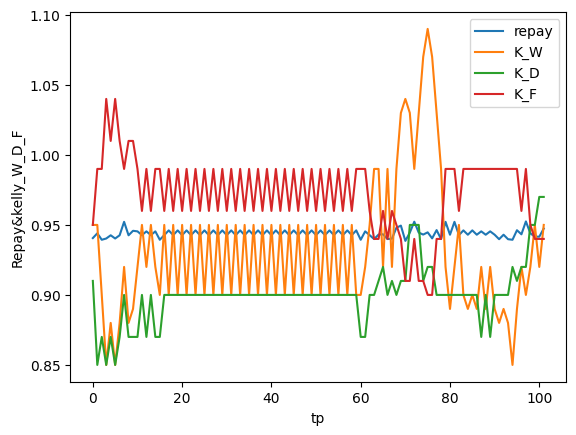

Data: 28 - OK
托特纳姆热刺 VS 曼彻斯特联 | 2023-08-20 00:30 | 2-0 | 9 VS 5 | 威廉希*(英国) Start: 07-26 00:10 Mid: 08-15 15:21 End: 08-20 00:09
https://1x2.titan007.com/oddslist/2399074.htm


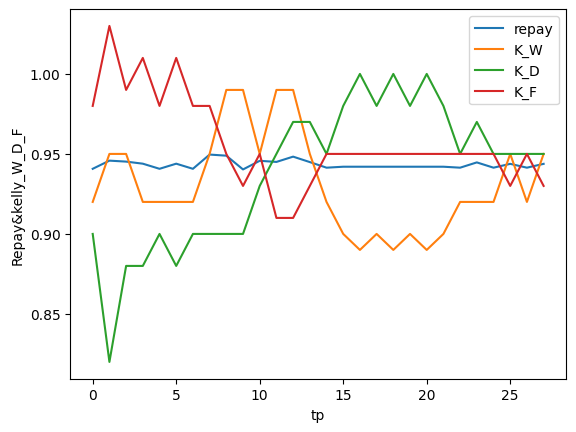

Data: 134 - OK
曼彻斯特城 VS 纽卡斯尔联 | 2023-08-20 03:00 | 1-0 | 3 VS 1 | 威廉希*(英国) Start: 07-26 00:10 Mid: 08-10 04:57 End: 08-20 02:43
https://1x2.titan007.com/oddslist/2399072.htm


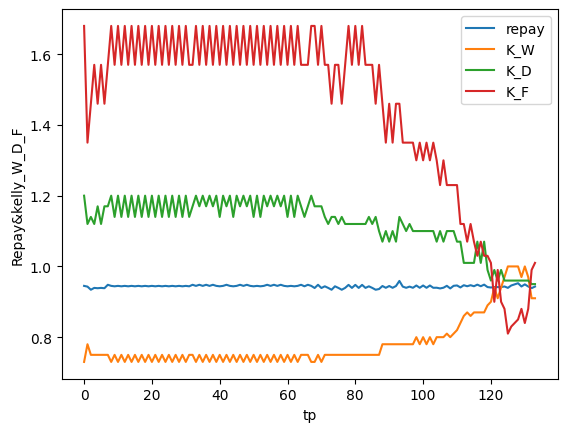

Data: 107 - OK
阿斯顿维拉 VS 埃弗顿 | 2023-08-20 21:00 | 4-0 | 19 VS 15 | 威廉希*(英国) Start: 07-26 00:10 Mid: 08-11 06:55 End: 08-20 20:23
https://1x2.titan007.com/oddslist/2399067.htm


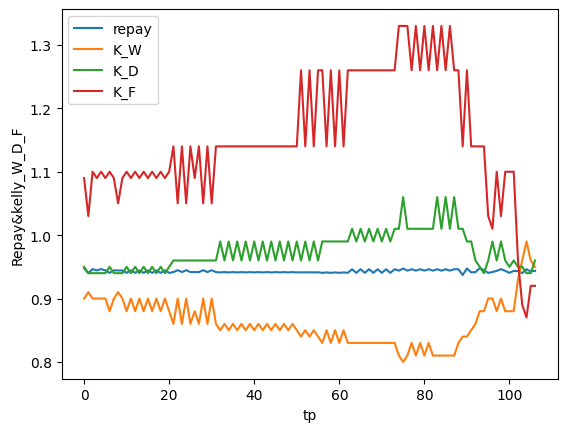

Data: 107 - OK
西汉姆联 VS 切尔西 | 2023-08-20 23:30 | 3-1 | 13 VS 12 | 威廉希*(英国) Start: 07-26 00:10 Mid: 08-10 06:53 End: 08-20 23:28
https://1x2.titan007.com/oddslist/2399075.htm


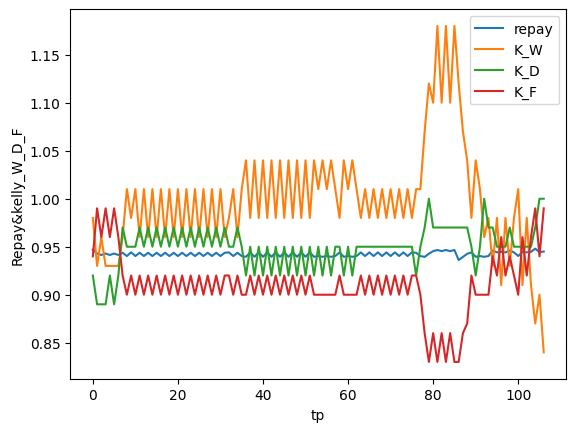

Data: 144 - OK
水晶宫 VS 阿森纳 | 2023-08-22 03:00 | 0-1 | 9 VS 8 | 威廉希*(英国) Start: 07-26 00:10 Mid: 08-09 14:20 End: 08-22 02:36
https://1x2.titan007.com/oddslist/2399068.htm


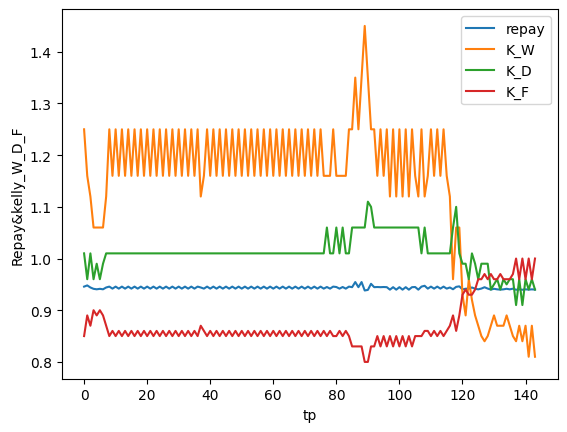

Data: 15 - OK
卢顿 VS 伯恩利 | 2023-10-04 02:30 | 1-2 | 17 VS 19 | 威廉希*(英国) Start: 09-25 02:48 Mid: 10-03 12:48 End: 10-04 02:16
https://1x2.titan007.com/oddslist/2399071.htm


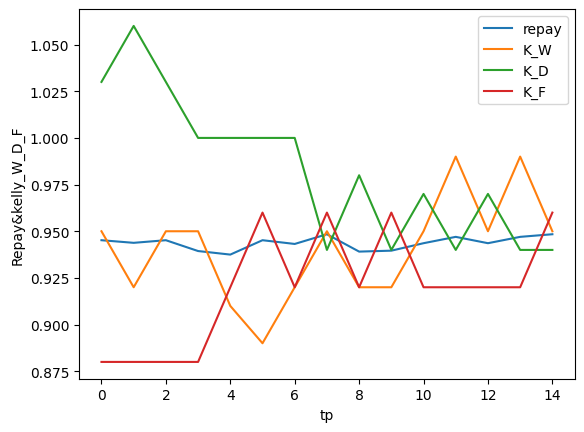

In [171]:
plot_match_1turn(pml_odds_s1, len(team_info), 2, '115')

Data: 47 - OK
诺丁汉森林 VS 谢菲尔德联队 | 2023-08-19 02:45 | 2-1 | 14 VS 16 | 立*(英国) Start: 08-12 15:33 Mid: 08-18 08:29 End: 08-19 02:40
https://1x2.titan007.com/oddslist/2399073.htm


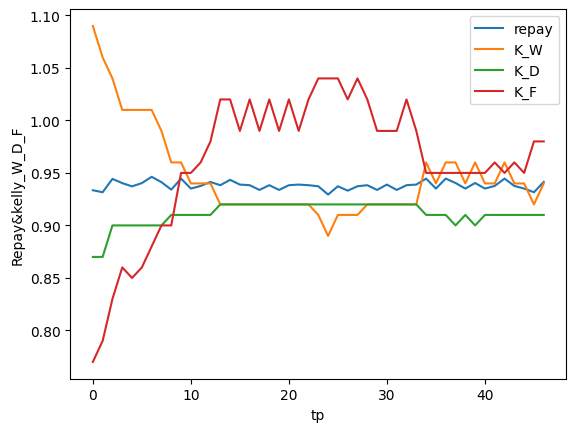

Data: 54 - OK
富勒姆 VS 布伦特福德 | 2023-08-19 22:00 | 0-3 | 6 VS 10 | 立*(英国) Start: 07-31 19:11 Mid: 08-17 15:28 End: 08-19 21:34
https://1x2.titan007.com/oddslist/2399069.htm


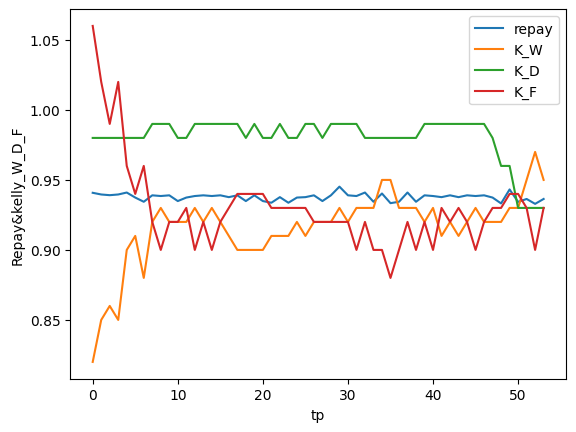

Data: 13 - OK
利物浦 VS 伯恩茅斯 | 2023-08-19 22:00 | 3-1 | 12 VS 14 | 立*(英国) Start: 07-31 19:11 Mid: 08-06 01:59 End: 08-19 21:39
https://1x2.titan007.com/oddslist/2399070.htm


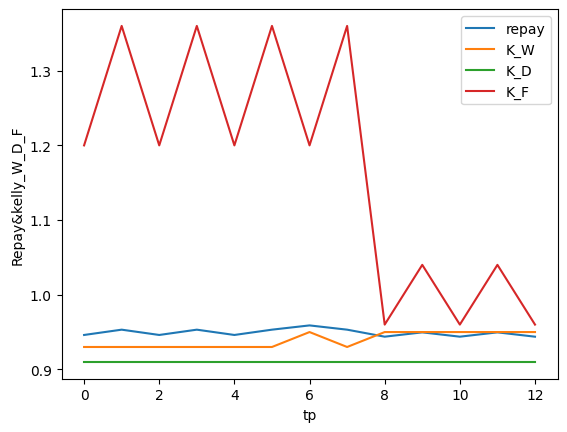

Data: 77 - OK
狼队 VS 布莱顿 | 2023-08-19 22:00 | 1-4 | 16 VS 2 | 立*(英国) Start: 07-31 19:11 Mid: 08-17 20:57 End: 08-19 21:44
https://1x2.titan007.com/oddslist/2399076.htm


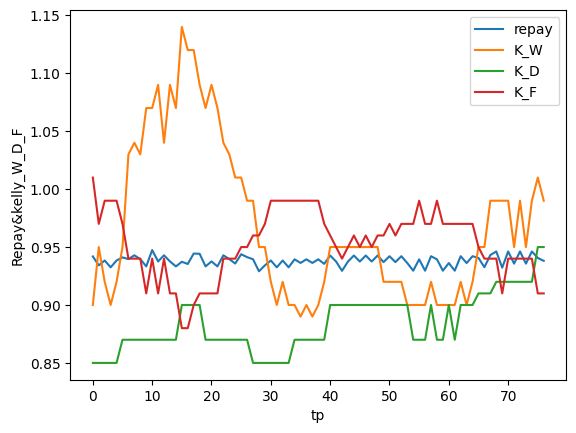

Data: 60 - OK
托特纳姆热刺 VS 曼彻斯特联 | 2023-08-20 00:30 | 2-0 | 9 VS 5 | 立*(英国) Start: 07-31 19:24 Mid: 08-18 02:07 End: 08-20 00:20
https://1x2.titan007.com/oddslist/2399074.htm


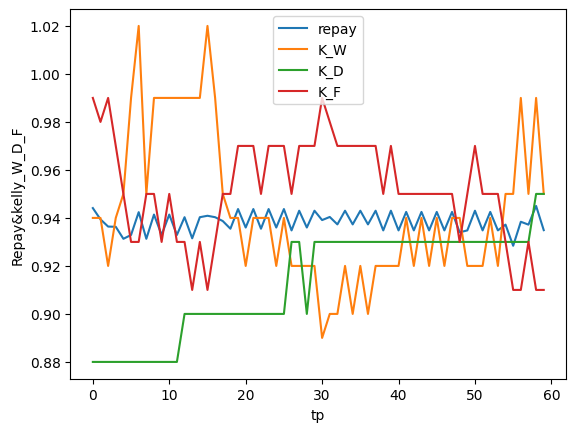

Data: 75 - OK
曼彻斯特城 VS 纽卡斯尔联 | 2023-08-20 03:00 | 1-0 | 3 VS 1 | 立*(英国) Start: 07-31 19:11 Mid: 08-19 01:35 End: 08-20 02:53
https://1x2.titan007.com/oddslist/2399072.htm


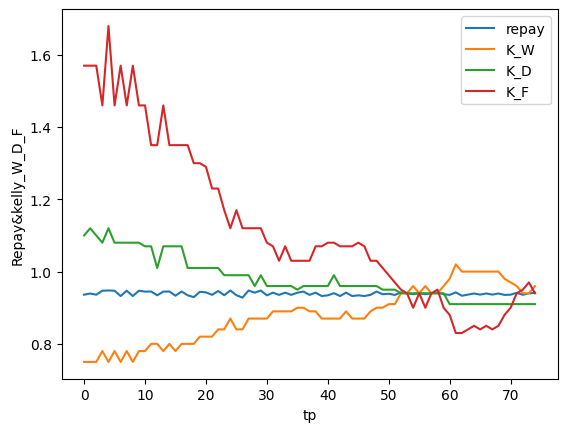

Data: 62 - OK
阿斯顿维拉 VS 埃弗顿 | 2023-08-20 21:00 | 4-0 | 19 VS 15 | 立*(英国) Start: 07-31 19:11 Mid: 08-18 15:27 End: 08-20 20:48
https://1x2.titan007.com/oddslist/2399067.htm


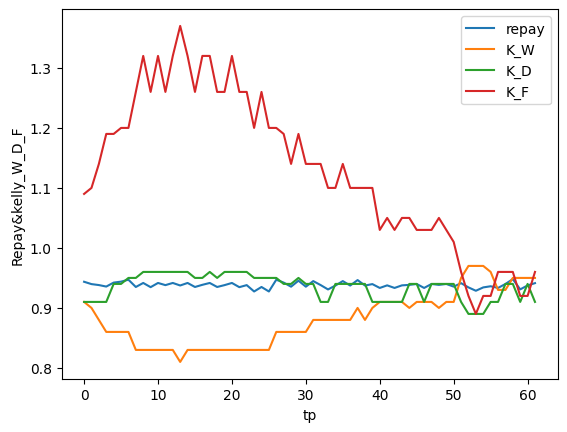

Data: 65 - OK
西汉姆联 VS 切尔西 | 2023-08-20 23:30 | 3-1 | 13 VS 12 | 立*(英国) Start: 07-31 19:11 Mid: 08-18 20:53 End: 08-20 23:29
https://1x2.titan007.com/oddslist/2399075.htm


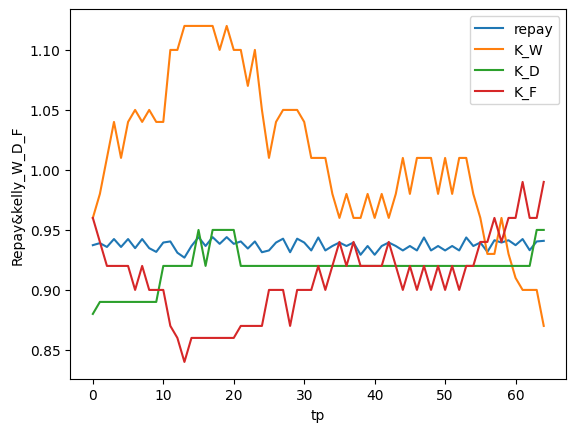

Data: 69 - OK
水晶宫 VS 阿森纳 | 2023-08-22 03:00 | 0-1 | 9 VS 8 | 立*(英国) Start: 08-01 14:51 Mid: 08-21 12:32 End: 08-22 02:46
https://1x2.titan007.com/oddslist/2399068.htm


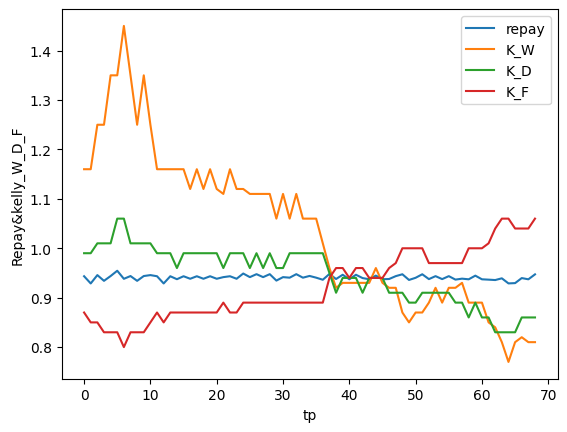

Data: 38 - OK
卢顿 VS 伯恩利 | 2023-10-04 02:30 | 1-2 | 17 VS 19 | 立*(英国) Start: 09-25 14:49 Mid: 10-03 05:19 End: 10-04 02:18
https://1x2.titan007.com/oddslist/2399071.htm


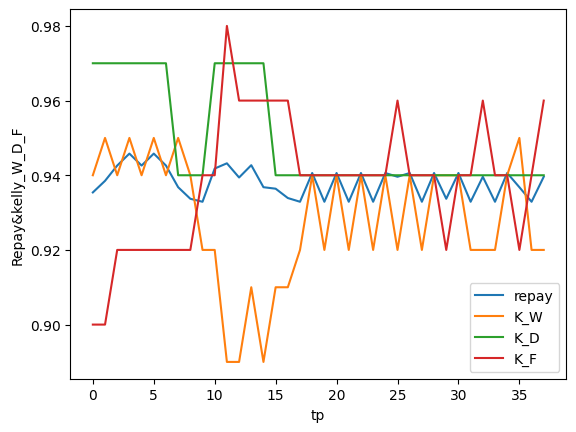

In [47]:
plot_match_1turn(pml_odds_s1, len(team_info), 2, '82')

In [99]:
m0 = odds_info[0]
m1 = odds_info[4]
m2 = odds_info[7]
m3 = odds_info[8]
m4 = odds_info[9]

In [100]:
m0

['伯恩利',
 '曼彻斯特城',
 '2398985',
 [('127400616', '36*(英国)', '281'),
  ('127399492', '威廉希*(英国)', '115'),
  ('127398464', '立*(英国)', '82'),
  ('128197787', 'bet-at-h*(马尔他)', '173'),
  ('127399554', '伟*(直布罗陀)', '81'),
  ('127566588', '易*(安提瓜和巴布达)', '90'),
  ('127398492', 'Interwet*(塞浦路斯)', '104'),
  ('128521967', '竞彩官*', '1129'),
  ('127400615', '10*(英国)', '16'),
  ('127400848', '12*(菲律宾)', '18'),
  ('127398476', '18*', '976'),
  ('127398838', 'Bwi*(奥地利)', '255'),
  ('128197778', 'Cora*(英国)', '88'),
  ('127400588', 'Crow*', '545'),
  ('128197775', 'Exp*(瑞典)', '70'),
  ('128409409', 'Nordic*(马恩岛)', '4'),
  ('128197780', 'Odd*(德国)', '370'),
  ('127398752', 'Pinna*(荷兰)', '177'),
  ('128197774', 'SNA*(意大利)', '110'),
  ('128409404', 'ST*(波兰)', '60'),
  ('128358090', '澳*', '80'),
  ('128197776', '博天*(瓦努阿图)', '422'),
  ('127400536', '金宝*(马恩岛)', '499'),
  ('127400981', '利*(英国)', '474'),
  ('127401128', '明*(菲律宾)', '517'),
  ('128435873', '香港马*(中国香港)', '432'),
  ('127400858', '盈*(菲律宾)', '659')],
 '2023

In [52]:
m1

['伯恩茅斯',
 '西汉姆联',
 '2398987',
 [('127400618', '36*(英国)', '281'),
  ('127399495', '威廉希*(英国)', '115'),
  ('127398462', '立*(英国)', '82'),
  ('128239351', 'bet-at-h*(马尔他)', '173'),
  ('127399558', '伟*(直布罗陀)', '81'),
  ('127566590', '易*(安提瓜和巴布达)', '90'),
  ('127398471', 'Interwet*(塞浦路斯)', '104'),
  ('127400626', '10*(英国)', '16'),
  ('127400853', '12*(菲律宾)', '18'),
  ('127398487', '18*', '976'),
  ('127399049', 'Bwi*(奥地利)', '255'),
  ('128239343', 'Cora*(英国)', '88'),
  ('127400602', 'Crow*', '545'),
  ('128239340', 'Exp*(瑞典)', '70'),
  ('128409220', 'Nordic*(马恩岛)', '4'),
  ('128239346', 'Odd*(德国)', '370'),
  ('127398494', 'Pinna*(荷兰)', '177'),
  ('128239339', 'SNA*(意大利)', '110'),
  ('128409216', 'ST*(波兰)', '60'),
  ('128358105', '澳*', '80'),
  ('128239341', '博天*(瓦努阿图)', '422'),
  ('127400570', '金宝*(马恩岛)', '499'),
  ('127400982', '利*(英国)', '474'),
  ('127401130', '明*(菲律宾)', '517'),
  ('128331118', '香港马*(中国香港)', '432'),
  ('127401036', '盈*(菲律宾)', '659')],
 '2023-08-12 22:00',
 '1-1',
 '15',
 '1

In [53]:
m2

['布伦特福德',
 '托特纳姆热刺',
 '2398992',
 [('127400623', '36*(英国)', '281'),
  ('127399499', '威廉希*(英国)', '115'),
  ('127398364', '立*(英国)', '82'),
  ('128320160', 'bet-at-h*(马尔他)', '173'),
  ('127399561', '伟*(直布罗陀)', '81'),
  ('127566595', '易*(安提瓜和巴布达)', '90'),
  ('127398479', 'Interwet*(塞浦路斯)', '104'),
  ('128542517', '竞彩官*', '1129'),
  ('127398369', '10*(英国)', '16'),
  ('127400855', '12*(菲律宾)', '18'),
  ('127398484', '18*', '976'),
  ('127399068', 'Bwi*(奥地利)', '255'),
  ('128320151', 'Cora*(英国)', '88'),
  ('127400630', 'Crow*', '545'),
  ('128320148', 'Exp*(瑞典)', '70'),
  ('128427586', 'Nordic*(马恩岛)', '4'),
  ('128320154', 'Odd*(德国)', '370'),
  ('127398486', 'Pinna*(荷兰)', '177'),
  ('128320147', 'SNA*(意大利)', '110'),
  ('128427578', 'ST*(波兰)', '60'),
  ('128358157', '澳*', '80'),
  ('128320149', '博天*(瓦努阿图)', '422'),
  ('127400598', '金宝*(马恩岛)', '499'),
  ('127400988', '利*(英国)', '474'),
  ('127402022', '明*(菲律宾)', '517'),
  ('128331124', '香港马*(中国香港)', '432'),
  ('127401061', '盈*(菲律宾)', '659')],
 '2

In [54]:
m3

['切尔西',
 '利物浦',
 '2398993',
 [('127400624', '36*(英国)', '281'),
  ('127399500', '威廉希*(英国)', '115'),
  ('127398363', '立*(英国)', '82'),
  ('128333044', 'bet-at-h*(马尔他)', '173'),
  ('127399555', '伟*(直布罗陀)', '81'),
  ('127566622', '易*(安提瓜和巴布达)', '90'),
  ('127398468', 'Interwet*(塞浦路斯)', '104'),
  ('128542521', '竞彩官*', '1129'),
  ('127398370', '10*(英国)', '16'),
  ('127400856', '12*(菲律宾)', '18'),
  ('127398483', '18*', '976'),
  ('127399069', 'Bwi*(奥地利)', '255'),
  ('128333035', 'Cora*(英国)', '88'),
  ('127400631', 'Crow*', '545'),
  ('128333032', 'Exp*(瑞典)', '70'),
  ('128427790', 'Nordic*(马恩岛)', '4'),
  ('128333038', 'Odd*(德国)', '370'),
  ('127398485', 'Pinna*(荷兰)', '177'),
  ('128333031', 'SNA*(意大利)', '110'),
  ('128427784', 'ST*(波兰)', '60'),
  ('128358162', '澳*', '80'),
  ('128333033', '博天*(瓦努阿图)', '422'),
  ('127400599', '金宝*(马恩岛)', '499'),
  ('127400986', '利*(英国)', '474'),
  ('127401135', '明*(菲律宾)', '517'),
  ('128331125', '香港马*(中国香港)', '432'),
  ('127401062', '盈*(菲律宾)', '659')],
 '2023-0

In [55]:
m4

['曼彻斯特联',
 '狼队',
 '2398994',
 [('127400830', '36*(英国)', '281'),
  ('127399501', '威廉希*(英国)', '115'),
  ('127398365', '立*(英国)', '82'),
  ('128297903', 'bet-at-h*(马尔他)', '173'),
  ('127399557', '伟*(直布罗陀)', '81'),
  ('127566596', '易*(安提瓜和巴布达)', '90'),
  ('127398477', 'Interwet*(塞浦路斯)', '104'),
  ('128545214', '竞彩官*', '1129'),
  ('127400814', '10*(英国)', '16'),
  ('127400857', '12*(菲律宾)', '18'),
  ('127398489', '18*', '976'),
  ('127399707', 'Bwi*(奥地利)', '255'),
  ('128297896', 'Cora*(英国)', '88'),
  ('127400632', 'Crow*', '545'),
  ('128297893', 'Exp*(瑞典)', '70'),
  ('128464885', 'Nordic*(马恩岛)', '4'),
  ('128297899', 'Odd*(德国)', '370'),
  ('127398482', 'Pinna*(荷兰)', '177'),
  ('128297892', 'SNA*(意大利)', '110'),
  ('128464878', 'ST*(波兰)', '60'),
  ('128358181', '澳*', '80'),
  ('128297894', '博天*(瓦努阿图)', '422'),
  ('127400600', '金宝*(马恩岛)', '499'),
  ('127400987', '利*(英国)', '474'),
  ('127401136', '明*(菲律宾)', '517'),
  ('128331126', '香港马*(中国香港)', '432'),
  ('127401085', '盈*(菲律宾)', '659')],
 '2023-

In [111]:
odd0, tp0= odds_factory(m0,'115')
odd1, tp1= odds_factory(m1,'115')
odd2, tp2= odds_factory(m2,'115')
odd3, tp3= odds_factory(m3,'115')
odd4, tp4= odds_factory(m4,'115')

Data: 48 - OK
伯恩利 VS 曼彻斯特城 | 2023-08-12 03:00 | 0-3 | 英冠1 VS 1 | 威廉希*(英国) End: 08-12 02:22
https://1x2.titan007.com/oddslist/2398985.htm
Data: 14 - OK
伯恩茅斯 VS 西汉姆联 | 2023-08-12 22:00 | 1-1 | 15 VS 14 | 威廉希*(英国) End: 08-12 21:49
https://1x2.titan007.com/oddslist/2398987.htm
Data: 25 - OK
布伦特福德 VS 托特纳姆热刺 | 2023-08-13 21:05 | 2-2 | 9 VS 8 | 威廉希*(英国) End: 08-13 20:36
https://1x2.titan007.com/oddslist/2398992.htm
Data: 15 - OK
切尔西 VS 利物浦 | 2023-08-13 23:30 | 1-1 | 12 VS 5 | 威廉希*(英国) End: 08-13 23:16
https://1x2.titan007.com/oddslist/2398993.htm
Data: 46 - OK
曼彻斯特联 VS 狼队 | 2023-08-15 03:00 | 1-0 | 3 VS 13 | 威廉希*(英国) End: 08-15 02:54
https://1x2.titan007.com/oddslist/2398994.htm


In [107]:
tp0

array(['07-04 11:28', '07-04 13:07', '07-04 14:07', '07-13 04:22',
       '07-13 05:19', '07-17 22:16', '07-18 00:01', '08-01 11:37',
       '08-07 18:34', '08-07 20:05', '08-07 20:58', '08-07 21:56',
       '08-09 18:39', '08-09 20:38', '08-09 22:13', '08-09 23:16',
       '08-10 00:41', '08-10 09:46', '08-10 19:03', '08-11 07:51',
       '08-11 09:05', '08-11 09:16', '08-11 09:22', '08-11 13:44',
       '08-11 14:17', '08-11 15:08', '08-11 15:46', '08-11 16:11',
       '08-11 17:22', '08-11 18:11', '08-11 18:17', '08-11 18:37',
       '08-11 19:07', '08-11 21:05', '08-11 21:28', '08-12 02:07',
       '08-12 02:22'], dtype='<U11')

In [92]:
datetime.ctime?

Docstring: Return ctime() style string.
Type:      method_descriptor

In [93]:
def get_time(tp, y=2023):
    return datetime(y, tp[0], tp[1], tp[2], tp[3]).ctime()

In [94]:
print(get_time(tp0[0]))

Thu Jun 15 18:03:00 2023


In [ ]:
def odd_in_wall(match_tp, odd_tp, tlim=6*60*60):
    p = r''

In [174]:
# 定义两个历史时间点
start_time = get_time(time_points[0])
end_time = get_time(time_points[-1])

# 计算时间差
time_difference = end_time - start_time
time_space = time_difference.total_seconds()/len(time_points)
# 输出时间差
print("时间差:", time_difference)
print("天数差:", time_difference.days)
print("秒数差:", time_difference.total_seconds())
print("分辨率:", time_space)

time_sample = np.linspace(0, time_difference.total_seconds(), len(time_points), endpoint=False)


时间差: 57 days, 8:19:00
天数差: 57
秒数差: 4954740.0
分辨率: 103223.75


In [178]:
time_sample

array([      0.  ,  103223.75,  206447.5 ,  309671.25,  412895.  ,
        516118.75,  619342.5 ,  722566.25,  825790.  ,  929013.75,
       1032237.5 , 1135461.25, 1238685.  , 1341908.75, 1445132.5 ,
       1548356.25, 1651580.  , 1754803.75, 1858027.5 , 1961251.25,
       2064475.  , 2167698.75, 2270922.5 , 2374146.25, 2477370.  ,
       2580593.75, 2683817.5 , 2787041.25, 2890265.  , 2993488.75,
       3096712.5 , 3199936.25, 3303160.  , 3406383.75, 3509607.5 ,
       3612831.25, 3716055.  , 3819278.75, 3922502.5 , 4025726.25,
       4128950.  , 4232173.75, 4335397.5 , 4438621.25, 4541845.  ,
       4645068.75, 4748292.5 , 4851516.25])

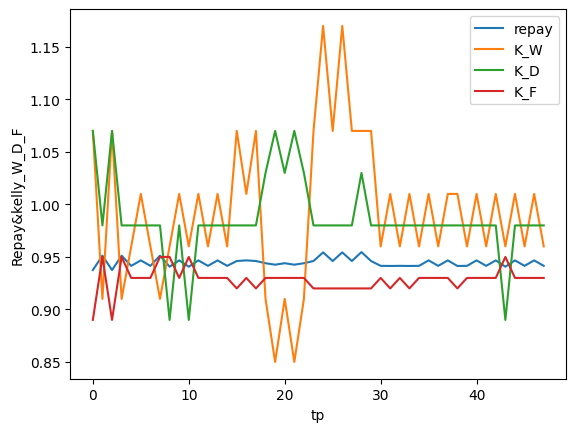

In [57]:
plt.xlabel('tp')
plt.ylabel('Repay&kelly_W_D_F')
plt.plot(range(len(tp0)), odd0[:,6:])
plt.legend(['repay', 'K_W', 'K_D', 'K_F'])

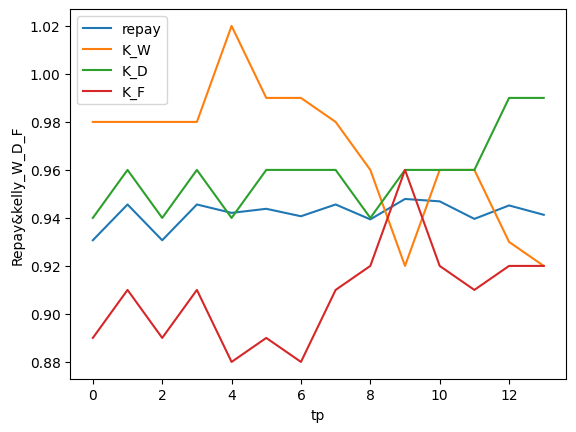

In [58]:
plt.xlabel('tp')
plt.ylabel('Repay&kelly_W_D_F')
plt.plot(range(len(tp1)), odd1[:,6:])
plt.legend(['repay', 'K_W', 'K_D', 'K_F'])

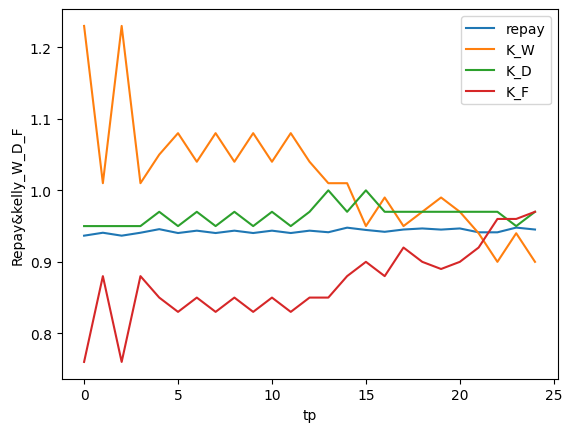

In [59]:
plt.xlabel('tp')
plt.ylabel('Repay&kelly_W_D_F')
plt.plot(range(len(tp2)), odd2[:,6:])
plt.legend(['repay', 'K_W', 'K_D', 'K_F'])

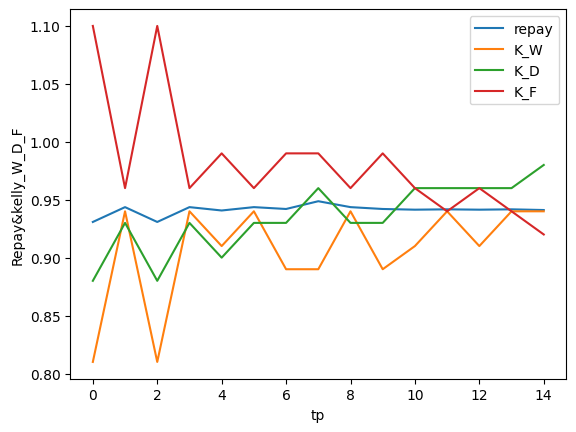

In [60]:
plt.xlabel('tp')
plt.ylabel('Repay&kelly_W_D_F')
plt.plot(range(len(tp3)), odd3[:,6:])
plt.legend(['repay', 'K_W', 'K_D', 'K_F'])

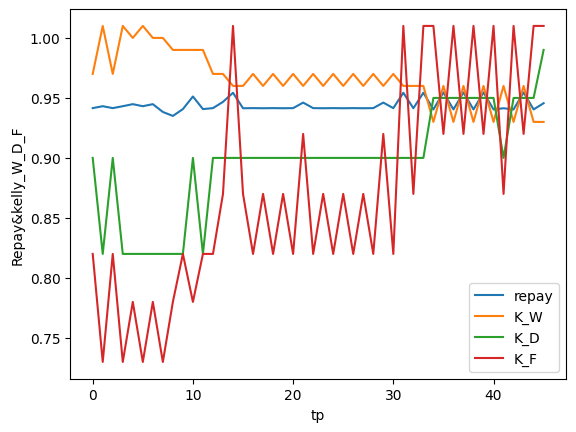

In [61]:
plt.xlabel('tp')
plt.ylabel('Repay&kelly_W_D_F')
plt.plot(range(len(tp4)), odd4[:,6:])
plt.legend(['repay', 'K_W', 'K_D', 'K_F'])

In [45]:
def show_odds(odds_info, cid):
    odds, tps = [], []
    for odd_info in odds_info:
        odd, tp = odds_factory(odd_info, cid)
        if odd.shape[0]:
            odds.append(odd)
            tps.append(tp)
            plt.xlabel('tp')
            plt.ylabel('Repay&kelly_W_D_F')
            plt.plot(range(len(tp)), odd[:,6:])
            plt.legend(['repay', 'K_W', 'K_D', 'K_F'])
            plt.show()
    return odds, tps

In [46]:
def plot_match_1turn(odds_sea, team_len, turn, cid):
    match_num_1t = team_len//2
    start_idx = (turn - 1)*match_num_1t
    end_idx = start_idx + match_num_1t
    odds, tps = show_odds(odds_sea[start_idx:end_idx], cid)

Data: 58 - OK
诺丁汉森林 VS 谢菲尔德联队 | 2023-08-19 02:45 | 2-1 | 14 VS 16 | 威廉希*(英国) Start: 07-26 00:10 Mid: 08-05 15:41 End: 08-16 18:34
https://1x2.titan007.com/oddslist/2399073.htm


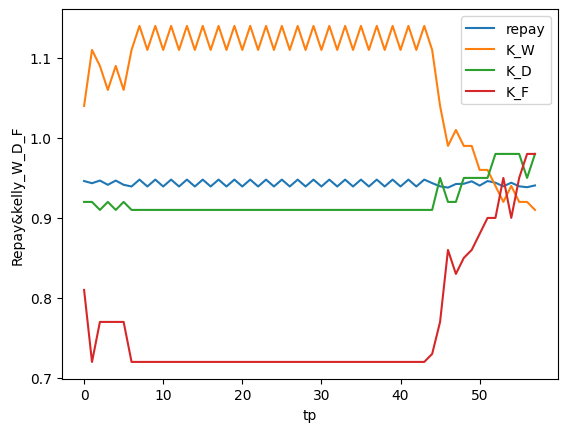

Data: 36 - OK
富勒姆 VS 布伦特福德 | 2023-08-19 22:00 | 0-3 | 6 VS 10 | 威廉希*(英国) Start: 07-26 00:10 Mid: 08-12 22:23 End: 08-19 21:43
https://1x2.titan007.com/oddslist/2399069.htm


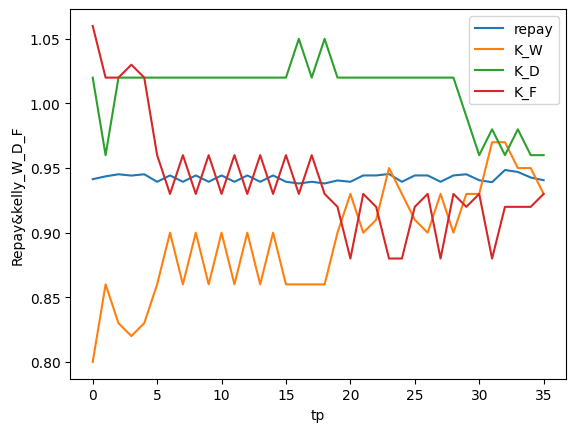

Data: 44 - OK
利物浦 VS 伯恩茅斯 | 2023-08-19 22:00 | 3-1 | 12 VS 14 | 威廉希*(英国) Start: 07-26 00:10 Mid: 08-13 07:34 End: 08-19 21:37
https://1x2.titan007.com/oddslist/2399070.htm


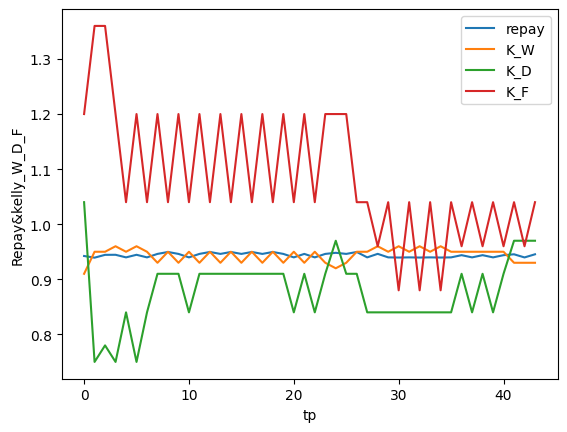

Data: 102 - OK
狼队 VS 布莱顿 | 2023-08-19 22:00 | 1-4 | 16 VS 2 | 威廉希*(英国) Start: 07-26 00:10 Mid: 08-06 22:53 End: 08-19 21:32
https://1x2.titan007.com/oddslist/2399076.htm


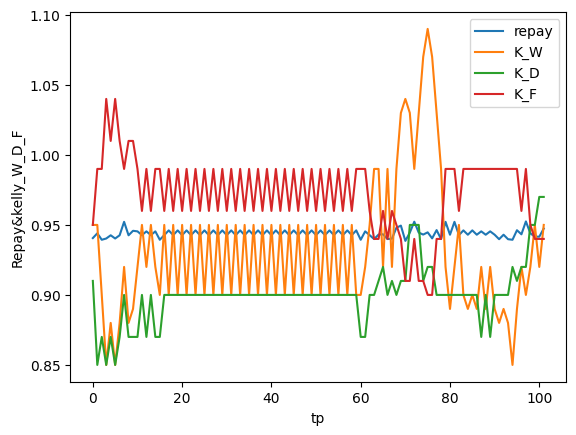

Data: 28 - OK
托特纳姆热刺 VS 曼彻斯特联 | 2023-08-20 00:30 | 2-0 | 9 VS 5 | 威廉希*(英国) Start: 07-26 00:10 Mid: 08-15 15:21 End: 08-20 00:09
https://1x2.titan007.com/oddslist/2399074.htm


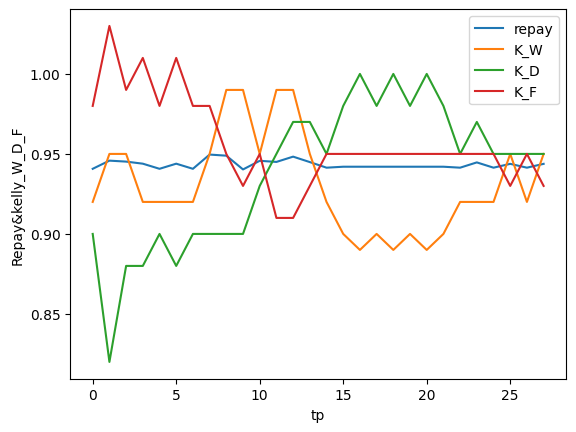

Data: 134 - OK
曼彻斯特城 VS 纽卡斯尔联 | 2023-08-20 03:00 | 1-0 | 3 VS 1 | 威廉希*(英国) Start: 07-26 00:10 Mid: 08-10 04:57 End: 08-20 02:43
https://1x2.titan007.com/oddslist/2399072.htm


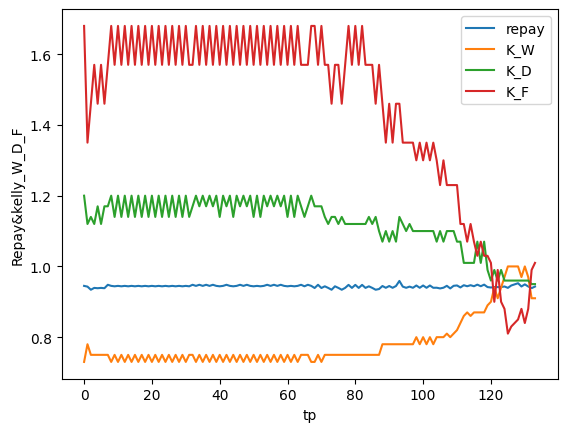

Data: 107 - OK
阿斯顿维拉 VS 埃弗顿 | 2023-08-20 21:00 | 4-0 | 19 VS 15 | 威廉希*(英国) Start: 07-26 00:10 Mid: 08-11 06:55 End: 08-20 20:23
https://1x2.titan007.com/oddslist/2399067.htm


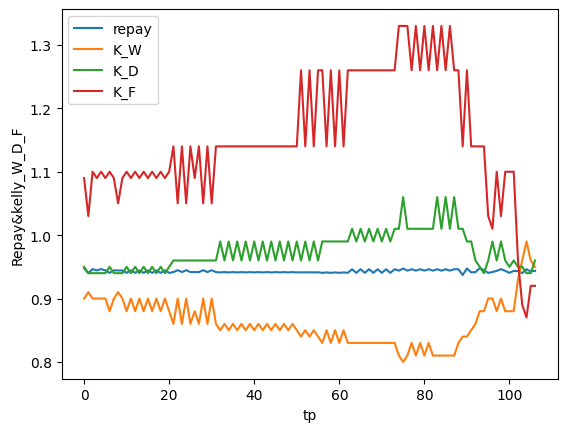

Data: 107 - OK
西汉姆联 VS 切尔西 | 2023-08-20 23:30 | 3-1 | 13 VS 12 | 威廉希*(英国) Start: 07-26 00:10 Mid: 08-10 06:53 End: 08-20 23:28
https://1x2.titan007.com/oddslist/2399075.htm


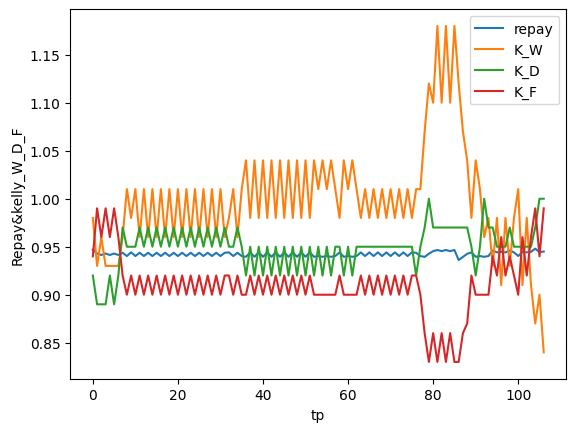

Data: 144 - OK
水晶宫 VS 阿森纳 | 2023-08-22 03:00 | 0-1 | 9 VS 8 | 威廉希*(英国) Start: 07-26 00:10 Mid: 08-09 14:20 End: 08-22 02:36
https://1x2.titan007.com/oddslist/2399068.htm


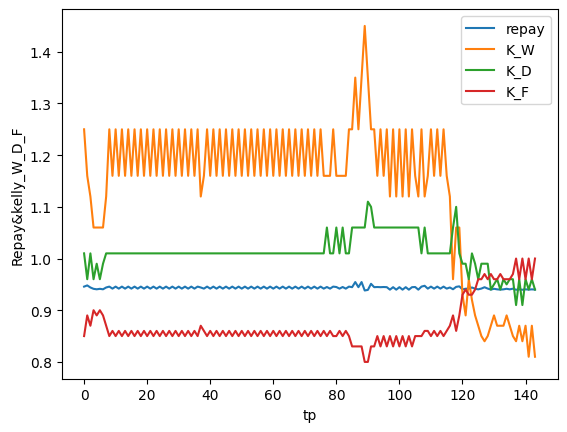

Data: 15 - OK
卢顿 VS 伯恩利 | 2023-10-04 02:30 | 1-2 | 17 VS 19 | 威廉希*(英国) Start: 09-25 02:48 Mid: 10-03 12:48 End: 10-04 02:16
https://1x2.titan007.com/oddslist/2399071.htm


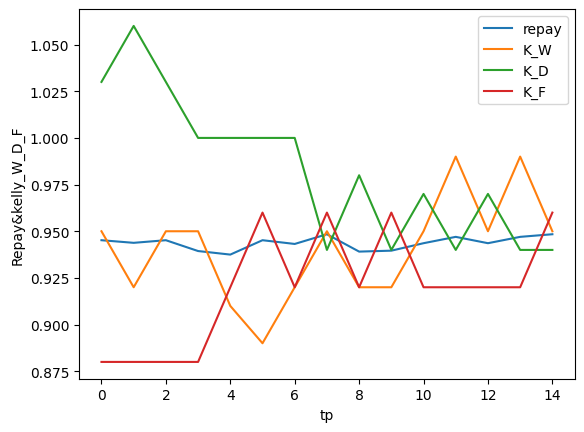

In [171]:
plot_match_1turn(pml_odds_s1, len(team_info), 2, '115')

Data: 48 - OK
伯恩利 VS 曼彻斯特城 | 2023-08-12 03:00 | 0-3 | 英冠1 VS 1 | 威廉希*(英国) Start: 06-15 18:03 Mid: 08-09 20:38 End: 08-12 02:22
https://1x2.titan007.com/oddslist/2398985.htm


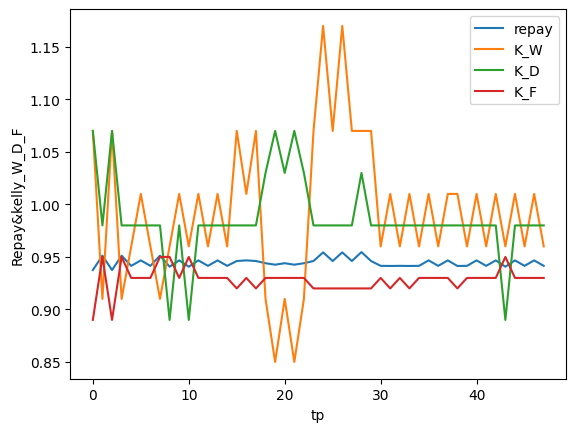

Data: 88 - OK
阿森纳 VS 诺丁汉森林 | 2023-08-12 20:00 | 2-1 | 2 VS 16 | 威廉希*(英国) Start: 06-15 18:03 Mid: 08-03 04:06 End: 08-12 19:30
https://1x2.titan007.com/oddslist/2398986.htm


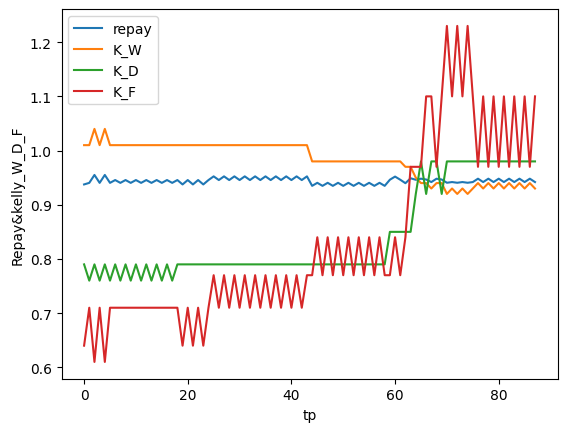

Data: 15 - OK
埃弗顿 VS 富勒姆 | 2023-08-12 22:00 | 0-1 | 17 VS 10 | 威廉希*(英国) Start: 06-15 18:03 Mid: 08-03 19:13 End: 08-12 21:44
https://1x2.titan007.com/oddslist/2398989.htm


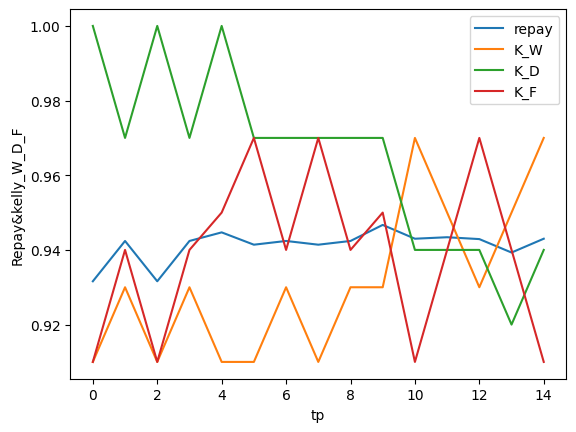

Data: 16 - OK
谢菲尔德联队 VS 水晶宫 | 2023-08-12 22:00 | 0-1 | 英冠2 VS 11 | 威廉希*(英国) Start: 06-15 18:03 Mid: 08-12 09:21 End: 08-12 21:49
https://1x2.titan007.com/oddslist/2398990.htm


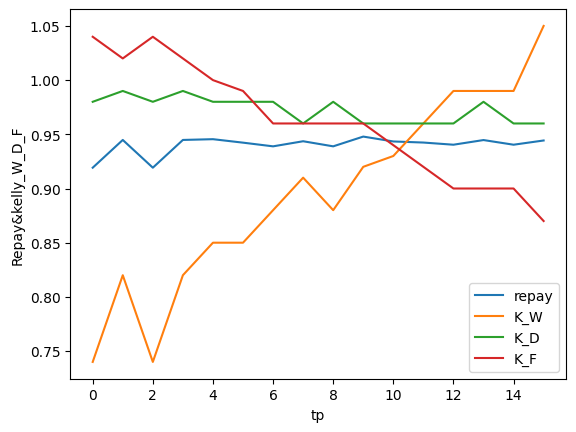

Data: 14 - OK
伯恩茅斯 VS 西汉姆联 | 2023-08-12 22:00 | 1-1 | 15 VS 14 | 威廉希*(英国) Start: 06-15 18:03 Mid: 08-04 03:13 End: 08-12 21:49
https://1x2.titan007.com/oddslist/2398987.htm


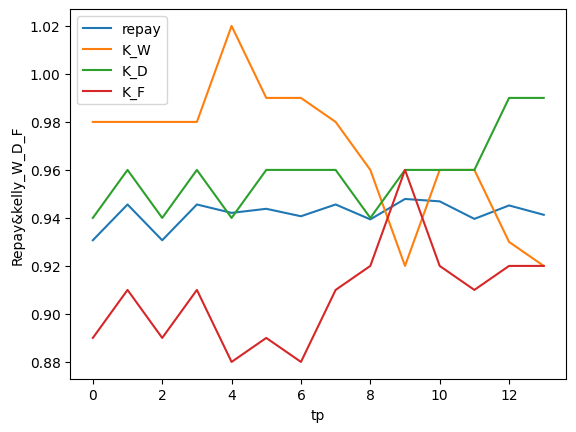

Data: 64 - OK
布莱顿 VS 卢顿 | 2023-08-12 22:00 | 4-1 | 6 VS 英冠3 | 威廉希*(英国) Start: 06-15 18:03 Mid: 08-06 11:02 End: 08-12 21:42
https://1x2.titan007.com/oddslist/2398988.htm


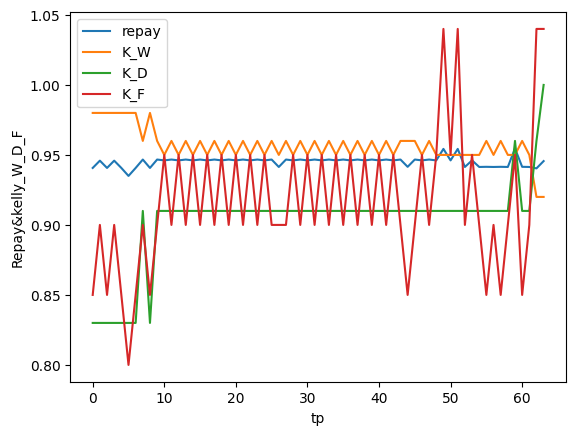

Data: 30 - OK
纽卡斯尔联 VS 阿斯顿维拉 | 2023-08-13 00:30 | 5-1 | 4 VS 7 | 威廉希*(英国) Start: 06-15 18:03 Mid: 08-06 00:41 End: 08-13 00:15
https://1x2.titan007.com/oddslist/2398991.htm


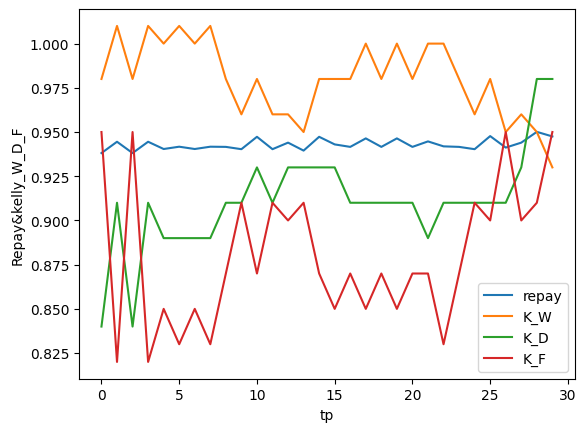

Data: 25 - OK
布伦特福德 VS 托特纳姆热刺 | 2023-08-13 21:05 | 2-2 | 9 VS 8 | 威廉希*(英国) Start: 06-15 18:03 Mid: 07-18 15:38 End: 08-13 20:36
https://1x2.titan007.com/oddslist/2398992.htm


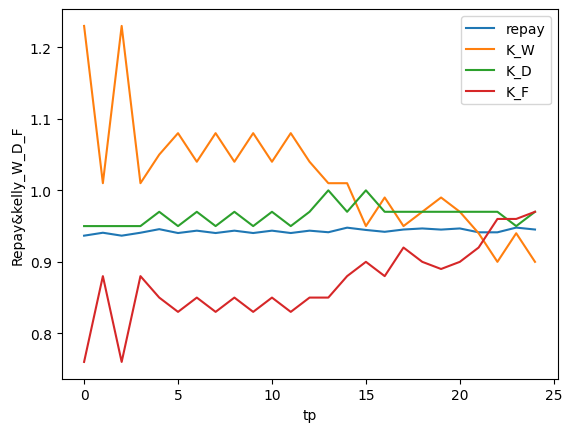

Data: 15 - OK
切尔西 VS 利物浦 | 2023-08-13 23:30 | 1-1 | 12 VS 5 | 威廉希*(英国) Start: 06-15 18:03 Mid: 08-10 16:33 End: 08-13 23:16
https://1x2.titan007.com/oddslist/2398993.htm


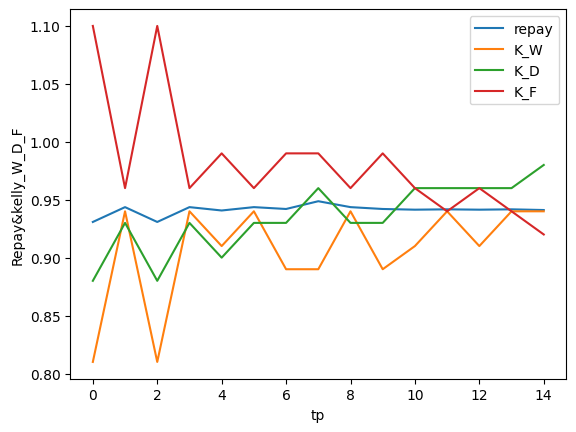

Data: 46 - OK
曼彻斯特联 VS 狼队 | 2023-08-15 03:00 | 1-0 | 3 VS 13 | 威廉希*(英国) Start: 06-15 18:03 Mid: 08-12 13:43 End: 08-15 02:54
https://1x2.titan007.com/oddslist/2398994.htm


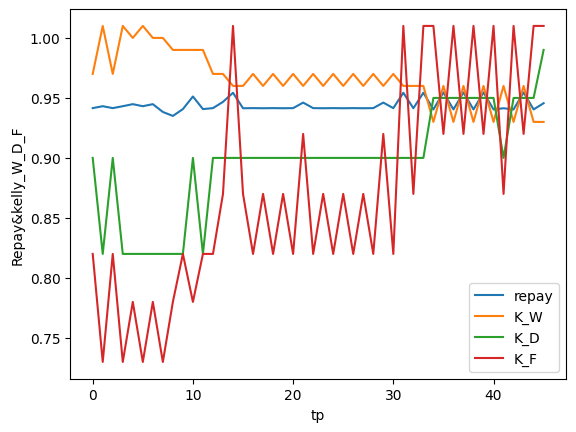

In [154]:
odds, tps = show_odds(odds_info, '115')

Data: 43 - OK
伯恩利 VS 曼彻斯特城 | 2023-08-12 03:00 | 0-3 | 英冠1 VS 1 | 立*(英国) Start: 06-15 16:39 Mid: 08-11 05:26 End: 08-12 02:52
https://1x2.titan007.com/oddslist/2398985.htm


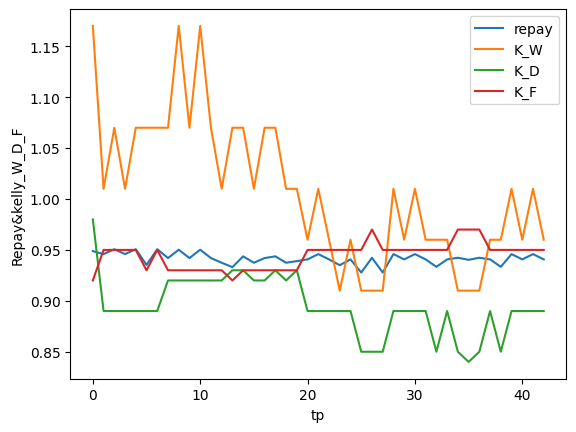

Data: 30 - OK
阿森纳 VS 诺丁汉森林 | 2023-08-12 20:00 | 2-1 | 2 VS 16 | 立*(英国) Start: 06-15 16:39 Mid: 08-09 19:36 End: 08-12 19:25
https://1x2.titan007.com/oddslist/2398986.htm


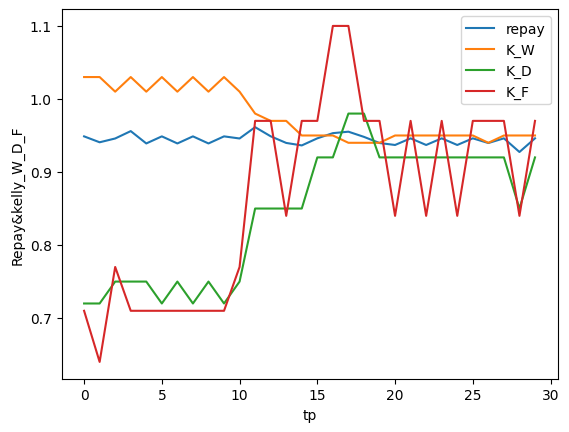

Data: 38 - OK
埃弗顿 VS 富勒姆 | 2023-08-12 22:00 | 0-1 | 17 VS 10 | 立*(英国) Start: 06-15 16:43 Mid: 08-10 21:09 End: 08-12 21:58
https://1x2.titan007.com/oddslist/2398989.htm


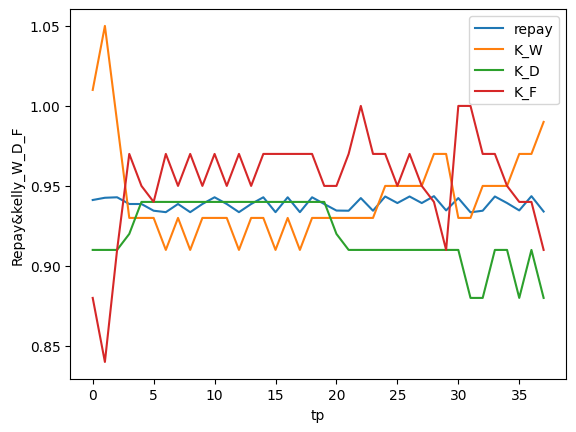

Data: 29 - OK
谢菲尔德联队 VS 水晶宫 | 2023-08-12 22:00 | 0-1 | 英冠2 VS 11 | 立*(英国) Start: 06-15 16:47 Mid: 08-12 16:06 End: 08-12 21:56
https://1x2.titan007.com/oddslist/2398990.htm


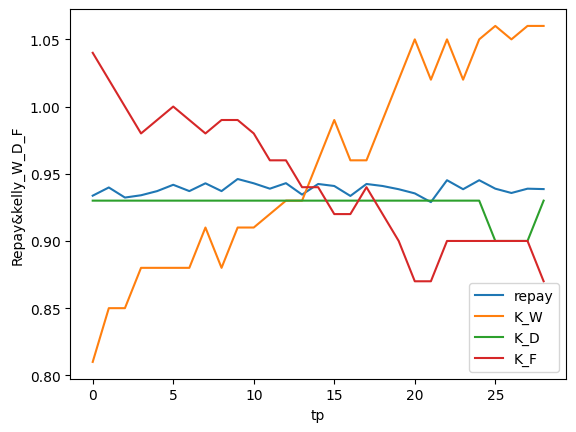

Data: 37 - OK
伯恩茅斯 VS 西汉姆联 | 2023-08-12 22:00 | 1-1 | 15 VS 14 | 立*(英国) Start: 06-15 16:42 Mid: 08-12 00:18 End: 08-12 21:58
https://1x2.titan007.com/oddslist/2398987.htm


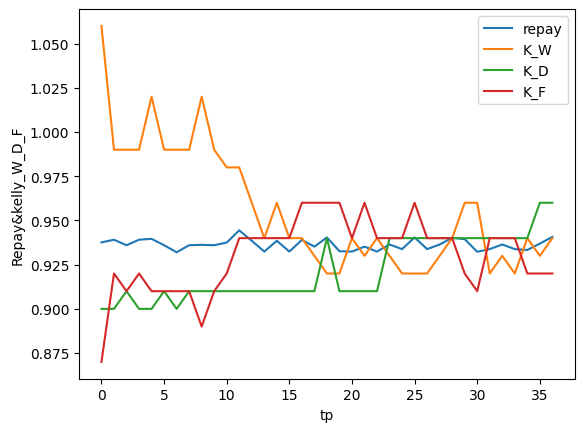

Data: 45 - OK
布莱顿 VS 卢顿 | 2023-08-12 22:00 | 4-1 | 6 VS 英冠3 | 立*(英国) Start: 06-15 16:42 Mid: 08-12 05:29 End: 08-12 21:47
https://1x2.titan007.com/oddslist/2398988.htm


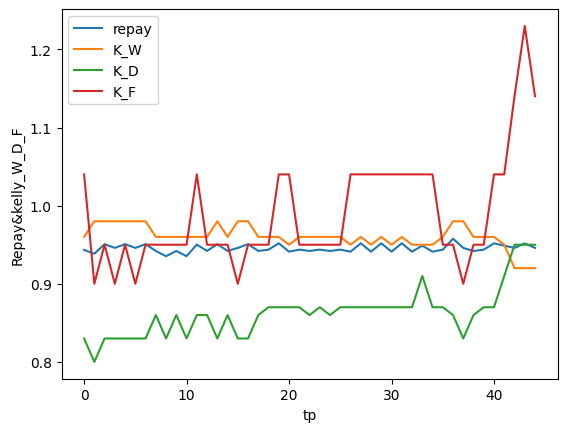

Data: 35 - OK
纽卡斯尔联 VS 阿斯顿维拉 | 2023-08-13 00:30 | 5-1 | 4 VS 7 | 立*(英国) Start: 06-15 16:48 Mid: 08-12 09:13 End: 08-13 00:18
https://1x2.titan007.com/oddslist/2398991.htm


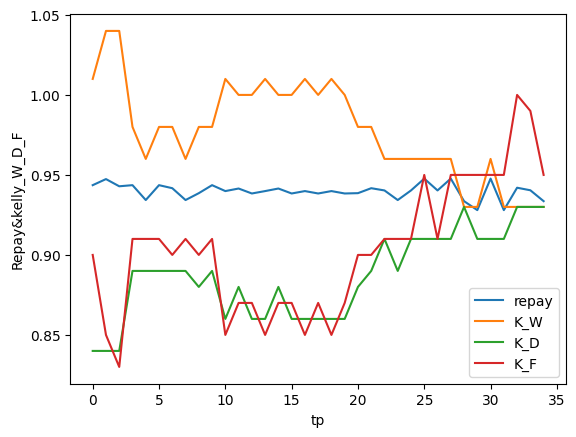

Data: 84 - OK
布伦特福德 VS 托特纳姆热刺 | 2023-08-13 21:05 | 2-2 | 9 VS 8 | 立*(英国) Start: 06-15 16:51 Mid: 08-10 17:57 End: 08-13 20:58
https://1x2.titan007.com/oddslist/2398992.htm


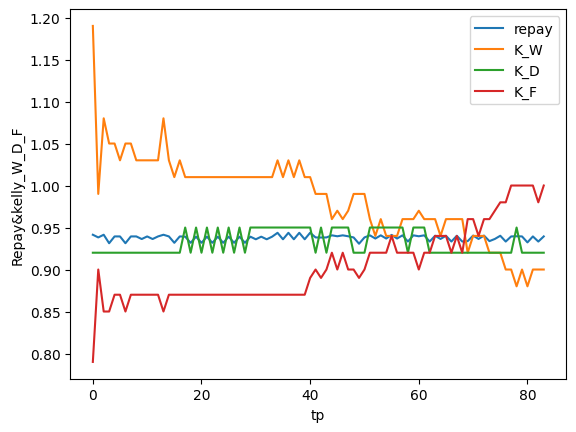

Data: 49 - OK
切尔西 VS 利物浦 | 2023-08-13 23:30 | 1-1 | 12 VS 5 | 立*(英国) Start: 06-15 16:51 Mid: 08-13 15:23 End: 08-13 23:27
https://1x2.titan007.com/oddslist/2398993.htm


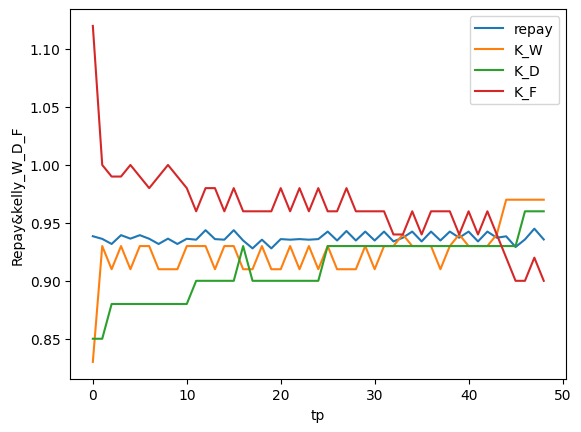

Data: 41 - OK
曼彻斯特联 VS 狼队 | 2023-08-15 03:00 | 1-0 | 3 VS 13 | 立*(英国) Start: 06-15 16:55 Mid: 08-14 17:15 End: 08-15 02:55
https://1x2.titan007.com/oddslist/2398994.htm


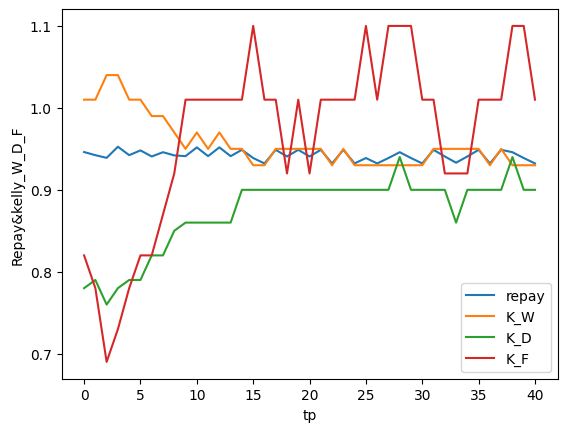

In [153]:
odds, tps = show_odds(odds_info, '82')

Data: 169 - OK
伯恩利 VS 曼彻斯特城 | 2023-08-12 03:00 | 0-3 | 英冠1 VS 1 | 伟*(直布罗陀) Start: 06-15 18:09 Mid: 08-11 13:44 End: 08-12 02:58
https://1x2.titan007.com/oddslist/2398985.htm


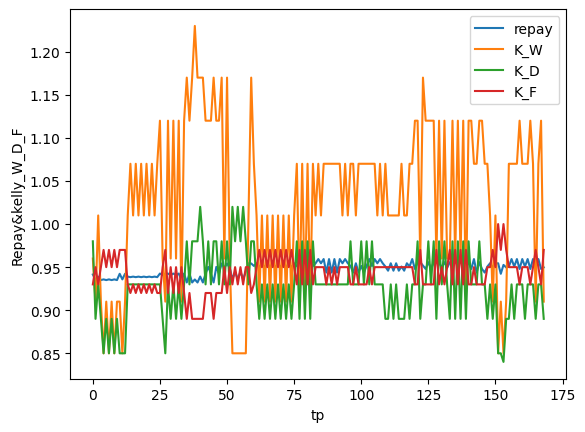

Data: 309 - OK
阿森纳 VS 诺丁汉森林 | 2023-08-12 20:00 | 2-1 | 2 VS 16 | 伟*(直布罗陀) Start: 06-15 18:09 Mid: 08-09 18:02 End: 08-12 19:49
https://1x2.titan007.com/oddslist/2398986.htm


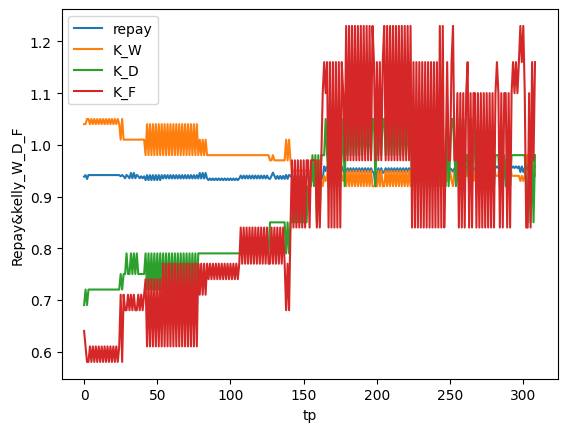

Data: 245 - OK
埃弗顿 VS 富勒姆 | 2023-08-12 22:00 | 0-1 | 17 VS 10 | 伟*(直布罗陀) Start: 06-15 18:09 Mid: 08-09 00:28 End: 08-12 21:49
https://1x2.titan007.com/oddslist/2398989.htm


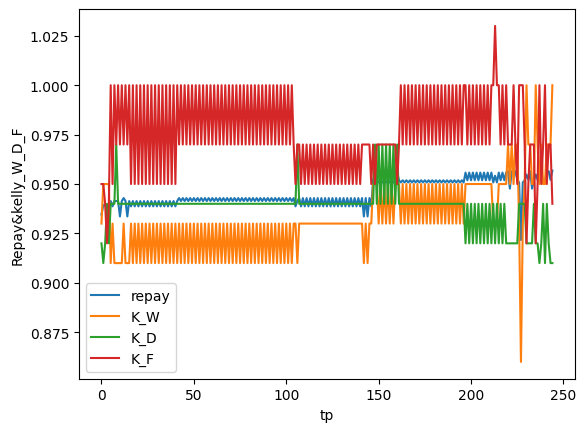

Data: 349 - OK
谢菲尔德联队 VS 水晶宫 | 2023-08-12 22:00 | 0-1 | 英冠2 VS 11 | 伟*(直布罗陀) Start: 06-15 18:09 Mid: 08-09 03:07 End: 08-12 21:49
https://1x2.titan007.com/oddslist/2398990.htm


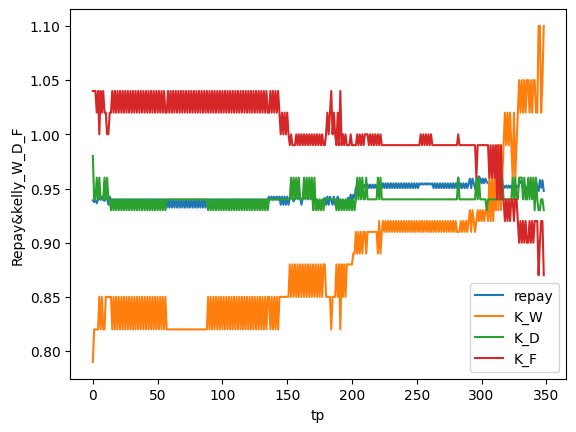

Data: 277 - OK
伯恩茅斯 VS 西汉姆联 | 2023-08-12 22:00 | 1-1 | 15 VS 14 | 伟*(直布罗陀) Start: 06-15 18:09 Mid: 08-06 10:37 End: 08-12 21:53
https://1x2.titan007.com/oddslist/2398987.htm


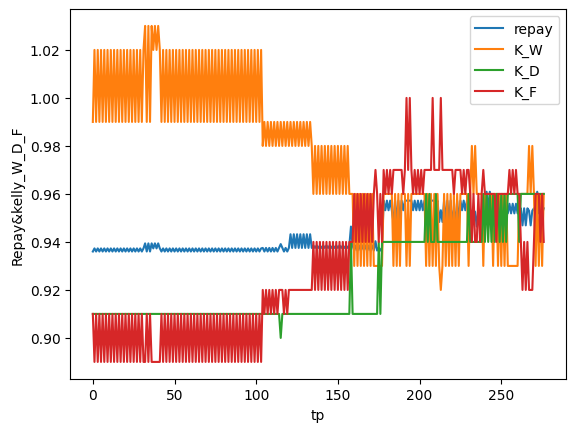

Data: 304 - OK
布莱顿 VS 卢顿 | 2023-08-12 22:00 | 4-1 | 6 VS 英冠3 | 伟*(直布罗陀) Start: 06-15 18:09 Mid: 08-11 20:40 End: 08-12 21:45
https://1x2.titan007.com/oddslist/2398988.htm


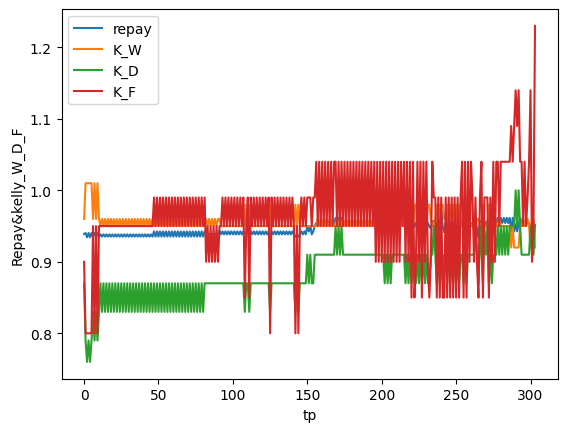

Data: 278 - OK
纽卡斯尔联 VS 阿斯顿维拉 | 2023-08-13 00:30 | 5-1 | 4 VS 7 | 伟*(直布罗陀) Start: 06-15 18:09 Mid: 08-11 08:14 End: 08-13 00:29
https://1x2.titan007.com/oddslist/2398991.htm


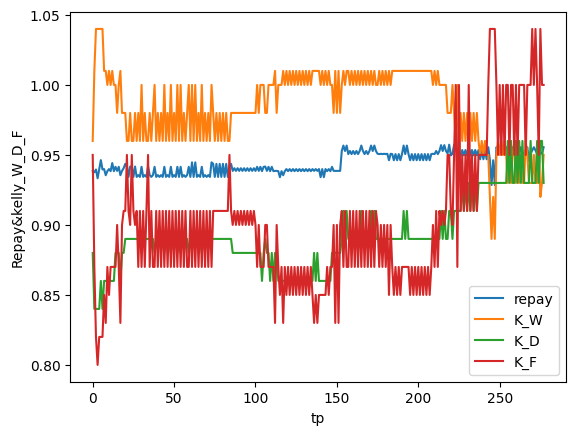

Data: 235 - OK
布伦特福德 VS 托特纳姆热刺 | 2023-08-13 21:05 | 2-2 | 9 VS 8 | 伟*(直布罗陀) Start: 06-15 18:09 Mid: 08-10 02:40 End: 08-13 20:56
https://1x2.titan007.com/oddslist/2398992.htm


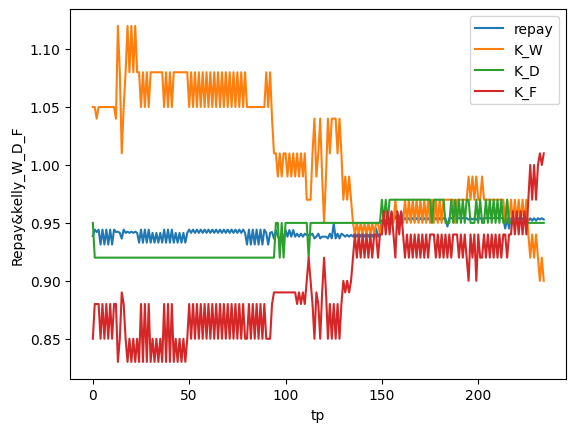

Data: 271 - OK
切尔西 VS 利物浦 | 2023-08-13 23:30 | 1-1 | 12 VS 5 | 伟*(直布罗陀) Start: 06-15 18:09 Mid: 08-13 04:10 End: 08-13 23:29
https://1x2.titan007.com/oddslist/2398993.htm


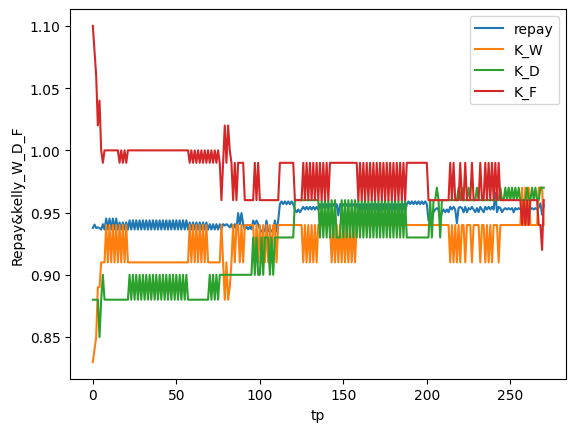

Data: 288 - OK
曼彻斯特联 VS 狼队 | 2023-08-15 03:00 | 1-0 | 3 VS 13 | 伟*(直布罗陀) Start: 06-15 18:09 Mid: 08-14 07:32 End: 08-15 02:39
https://1x2.titan007.com/oddslist/2398994.htm


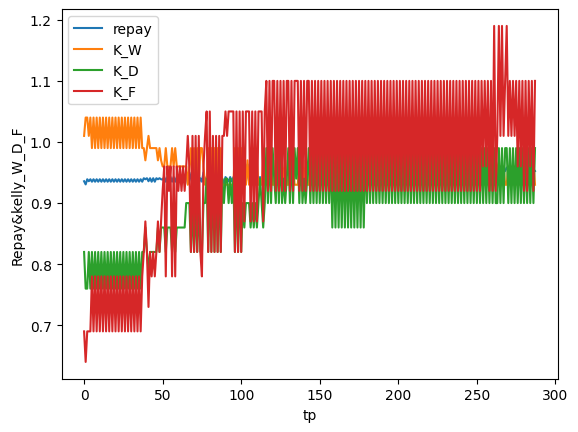

In [152]:
odds, tps = show_odds(odds_info, '81')

Data: 5 - OK
伯恩利 VS 曼彻斯特城 | 2023-08-12 03:00 | 0-3 | 英冠1 VS 1 | 竞彩官* Start: 08-10 14:53 Mid: 08-11 17:35 End: 08-11 20:48
https://1x2.titan007.com/oddslist/2398985.htm


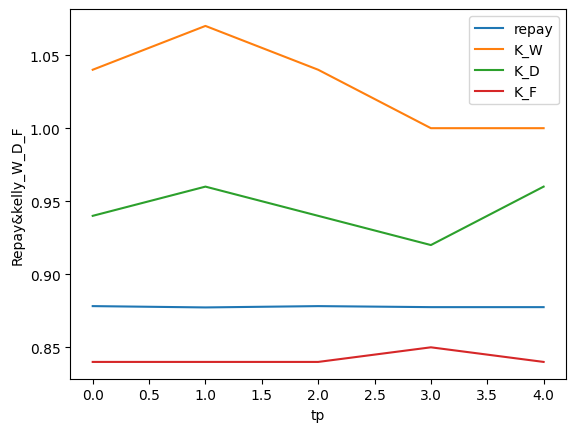

Data: 6 - OK
布莱顿 VS 卢顿 | 2023-08-12 22:00 | 4-1 | 6 VS 英冠3 | 竞彩官* Start: 08-11 11:04 Mid: 08-12 20:57 End: 08-12 21:47
https://1x2.titan007.com/oddslist/2398988.htm


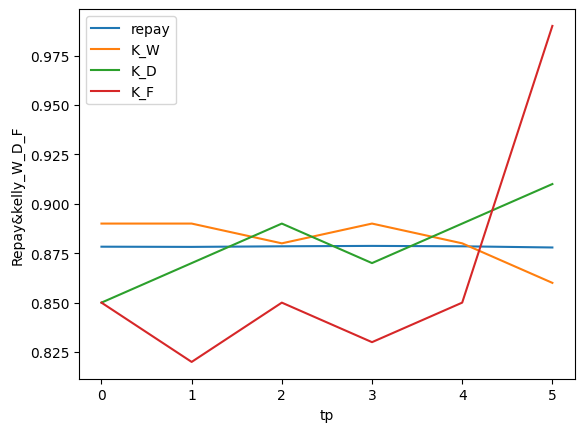

Data: 5 - OK
纽卡斯尔联 VS 阿斯顿维拉 | 2023-08-13 00:30 | 5-1 | 4 VS 7 | 竞彩官* Start: 08-11 11:04 Mid: 08-12 18:28 End: 08-12 20:41
https://1x2.titan007.com/oddslist/2398991.htm


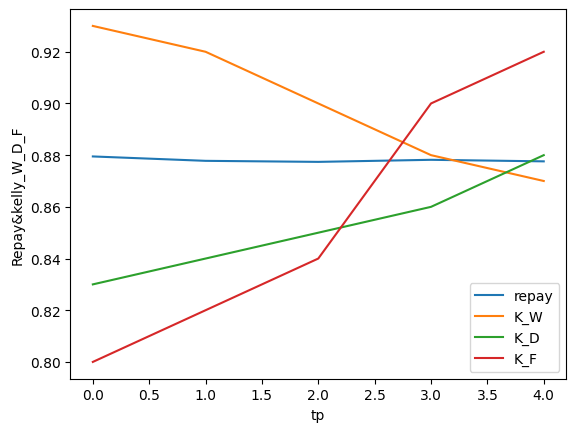

Data: 2 - OK
布伦特福德 VS 托特纳姆热刺 | 2023-08-13 21:05 | 2-2 | 9 VS 8 | 竞彩官* Start: 08-11 11:04 Mid: 08-13 20:45 End: 08-13 20:45
https://1x2.titan007.com/oddslist/2398992.htm


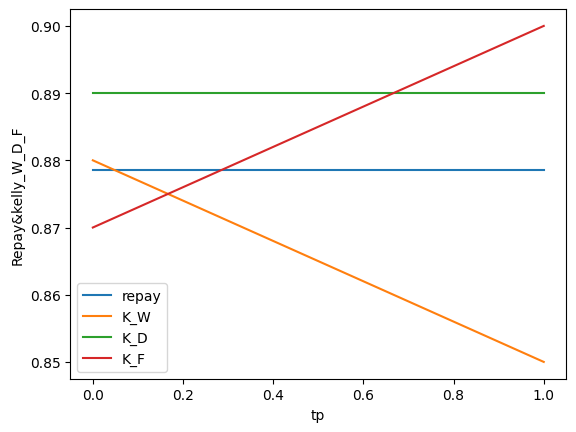

Data: 3 - OK
切尔西 VS 利物浦 | 2023-08-13 23:30 | 1-1 | 12 VS 5 | 竞彩官* Start: 08-11 11:04 Mid: 08-13 13:09 End: 08-13 22:14
https://1x2.titan007.com/oddslist/2398993.htm


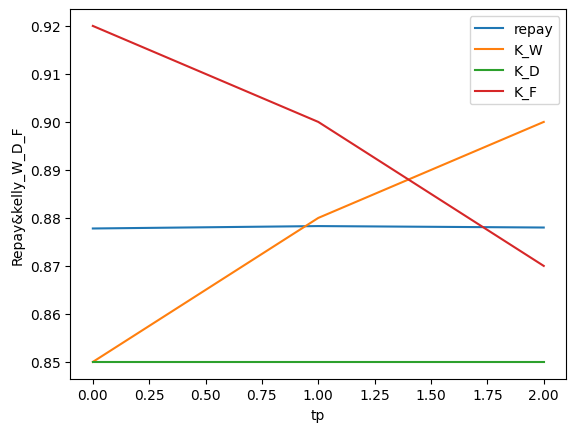

Data: 4 - OK
曼彻斯特联 VS 狼队 | 2023-08-15 03:00 | 1-0 | 3 VS 13 | 竞彩官* Start: 08-11 13:18 Mid: 08-14 12:14 End: 08-14 15:17
https://1x2.titan007.com/oddslist/2398994.htm


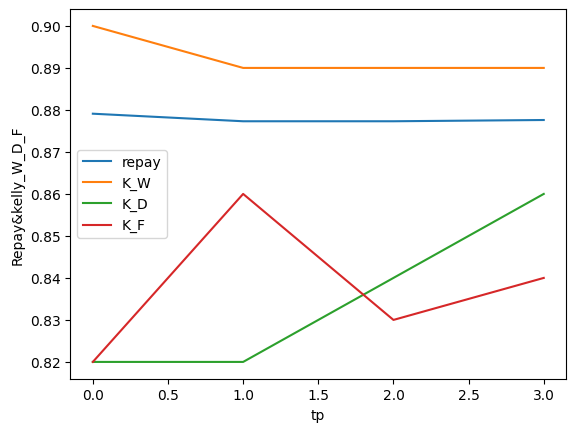

In [149]:
odds, tps = show_odds(odds_info, '1129')

In [ ]:
match_num_1t = len(team_info)//2
turn_id = 2
start_idx = (turn - 1)*match_num_1t
end_idx = start_idx + match_num_1t
odds, tps = show_odds(pml_odds_s1[start_idx, end_idx], '115')

In [46]:
def plot_match_1turn(odds_sea, team_len, turn, cid):
    match_num_1t = team_len//2
    start_idx = (turn - 1)*match_num_1t
    end_idx = start_idx + match_num_1t
    odds, tps = show_odds(odds_sea[start_idx:end_idx], cid)

Data: 58 - OK
诺丁汉森林 VS 谢菲尔德联队 | 2023-08-19 02:45 | 2-1 | 14 VS 16 | 威廉希*(英国) Start: 07-26 00:10 Mid: 08-05 15:41 End: 08-16 18:34
https://1x2.titan007.com/oddslist/2399073.htm


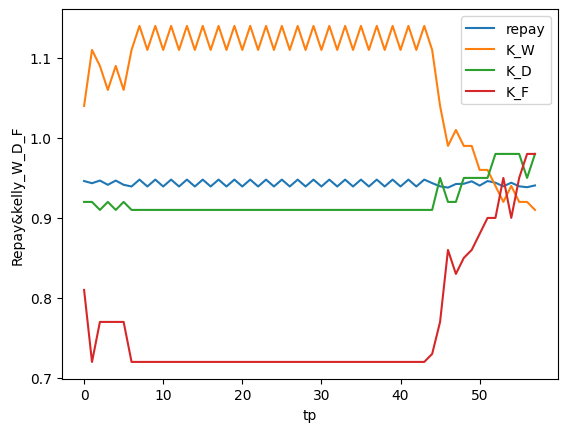

Data: 36 - OK
富勒姆 VS 布伦特福德 | 2023-08-19 22:00 | 0-3 | 6 VS 10 | 威廉希*(英国) Start: 07-26 00:10 Mid: 08-12 22:23 End: 08-19 21:43
https://1x2.titan007.com/oddslist/2399069.htm


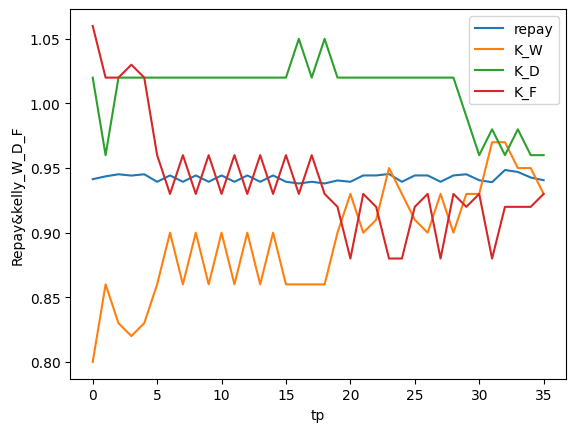

Data: 44 - OK
利物浦 VS 伯恩茅斯 | 2023-08-19 22:00 | 3-1 | 12 VS 14 | 威廉希*(英国) Start: 07-26 00:10 Mid: 08-13 07:34 End: 08-19 21:37
https://1x2.titan007.com/oddslist/2399070.htm


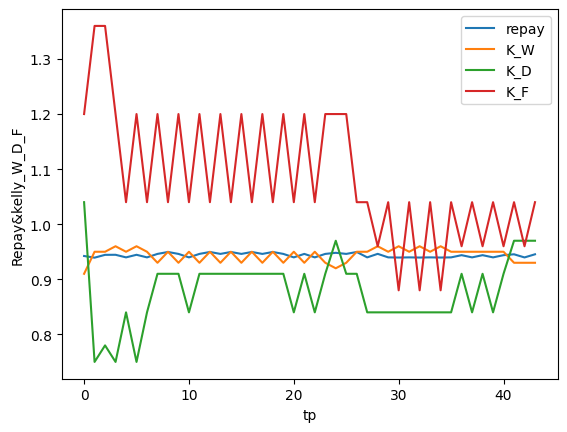

Data: 102 - OK
狼队 VS 布莱顿 | 2023-08-19 22:00 | 1-4 | 16 VS 2 | 威廉希*(英国) Start: 07-26 00:10 Mid: 08-06 22:53 End: 08-19 21:32
https://1x2.titan007.com/oddslist/2399076.htm


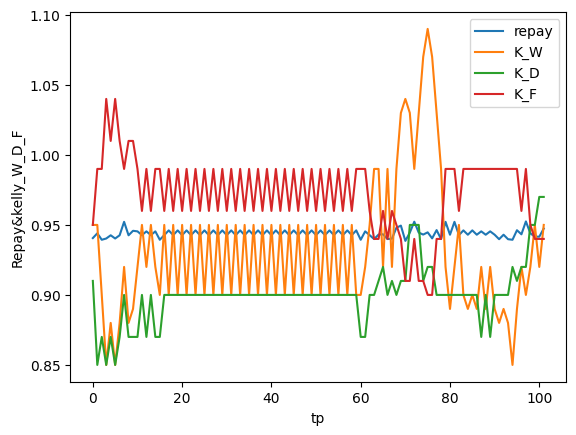

Data: 28 - OK
托特纳姆热刺 VS 曼彻斯特联 | 2023-08-20 00:30 | 2-0 | 9 VS 5 | 威廉希*(英国) Start: 07-26 00:10 Mid: 08-15 15:21 End: 08-20 00:09
https://1x2.titan007.com/oddslist/2399074.htm


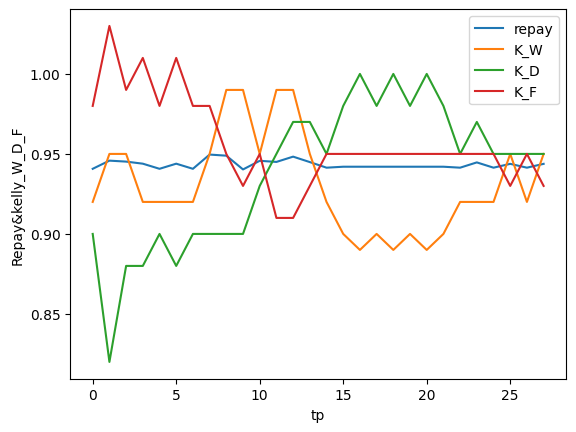

Data: 134 - OK
曼彻斯特城 VS 纽卡斯尔联 | 2023-08-20 03:00 | 1-0 | 3 VS 1 | 威廉希*(英国) Start: 07-26 00:10 Mid: 08-10 04:57 End: 08-20 02:43
https://1x2.titan007.com/oddslist/2399072.htm


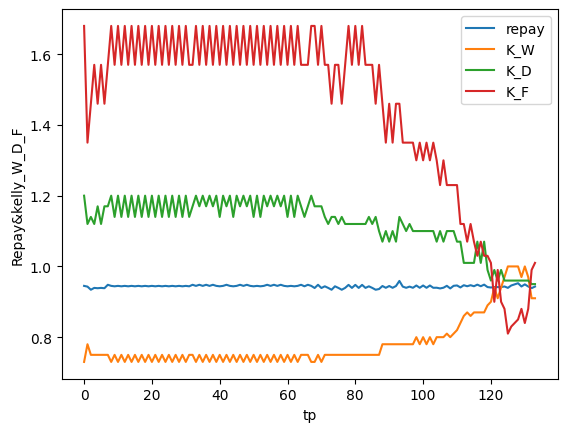

Data: 107 - OK
阿斯顿维拉 VS 埃弗顿 | 2023-08-20 21:00 | 4-0 | 19 VS 15 | 威廉希*(英国) Start: 07-26 00:10 Mid: 08-11 06:55 End: 08-20 20:23
https://1x2.titan007.com/oddslist/2399067.htm


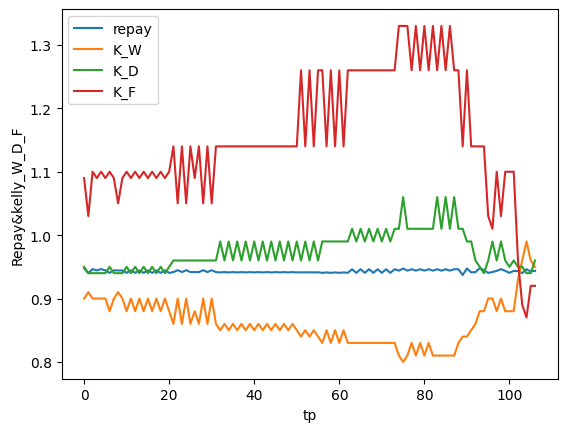

Data: 107 - OK
西汉姆联 VS 切尔西 | 2023-08-20 23:30 | 3-1 | 13 VS 12 | 威廉希*(英国) Start: 07-26 00:10 Mid: 08-10 06:53 End: 08-20 23:28
https://1x2.titan007.com/oddslist/2399075.htm


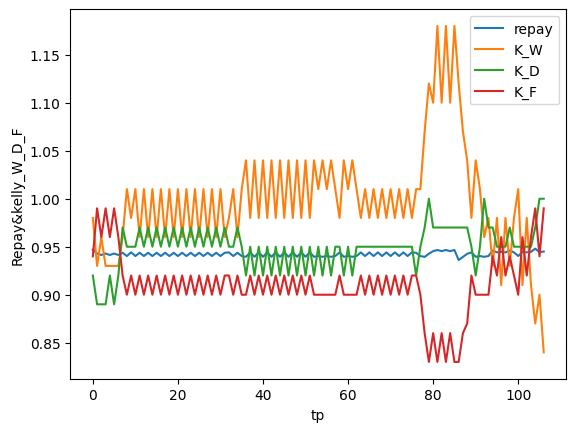

Data: 144 - OK
水晶宫 VS 阿森纳 | 2023-08-22 03:00 | 0-1 | 9 VS 8 | 威廉希*(英国) Start: 07-26 00:10 Mid: 08-09 14:20 End: 08-22 02:36
https://1x2.titan007.com/oddslist/2399068.htm


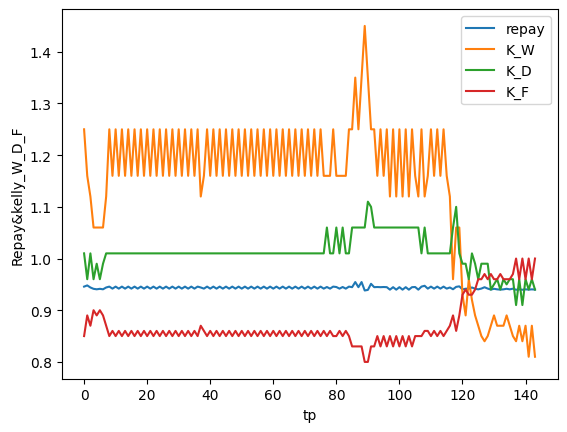

Data: 15 - OK
卢顿 VS 伯恩利 | 2023-10-04 02:30 | 1-2 | 17 VS 19 | 威廉希*(英国) Start: 09-25 02:48 Mid: 10-03 12:48 End: 10-04 02:16
https://1x2.titan007.com/oddslist/2399071.htm


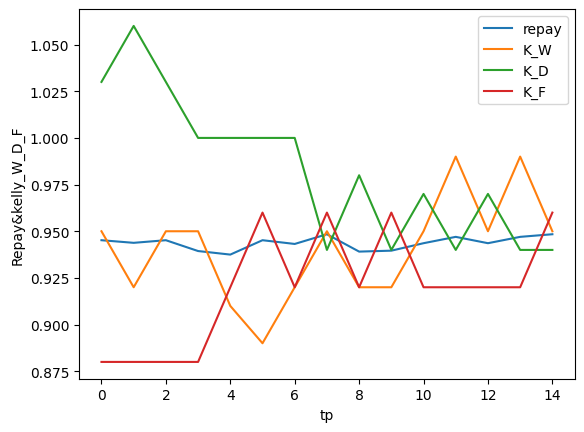

In [171]:
plot_match_1turn(pml_odds_s1, len(team_info), 2, '115')

In [236]:
np.array(odd_sample[0,6:].tolist()*16).reshape(-1,4)

array([[0.9375, 1.07  , 1.07  , 0.89  ],
       [0.9375, 1.07  , 1.07  , 0.89  ],
       [0.9375, 1.07  , 1.07  , 0.89  ],
       [0.9375, 1.07  , 1.07  , 0.89  ],
       [0.9375, 1.07  , 1.07  , 0.89  ],
       [0.9375, 1.07  , 1.07  , 0.89  ],
       [0.9375, 1.07  , 1.07  , 0.89  ],
       [0.9375, 1.07  , 1.07  , 0.89  ],
       [0.9375, 1.07  , 1.07  , 0.89  ],
       [0.9375, 1.07  , 1.07  , 0.89  ],
       [0.9375, 1.07  , 1.07  , 0.89  ],
       [0.9375, 1.07  , 1.07  , 0.89  ],
       [0.9375, 1.07  , 1.07  , 0.89  ],
       [0.9375, 1.07  , 1.07  , 0.89  ],
       [0.9375, 1.07  , 1.07  , 0.89  ],
       [0.9375, 1.07  , 1.07  , 0.89  ]])

In [255]:
K0 = np.concatenate((np.array(odd_sample[0,6:].tolist()*16).reshape(-1,4), odd_sample[:,6:]), axis=0)

In [239]:
K_sample.shape

(64, 4)

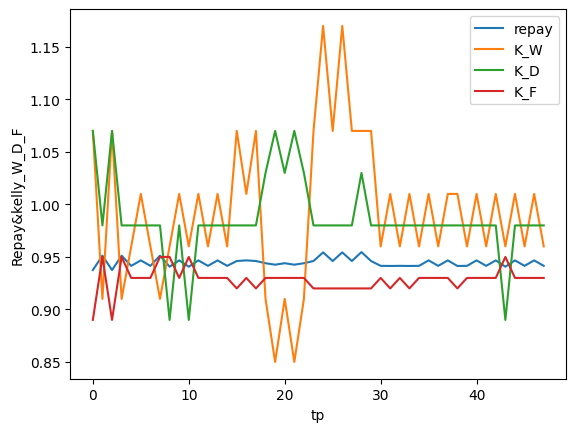

In [216]:
plt.xlabel('tp')
plt.ylabel('Repay&kelly_W_D_F')
plt.plot(range(len(time_points)), odd_sample[:,6:])
plt.legend(['repay', 'K_W', 'K_D', 'K_F'])

In [241]:
Yss = np.fft.fft(K_sample,axis=0)

In [242]:
Yss

array([[ 6.03436000e+01+0.00000000e+00j,  6.47900000e+01+0.00000000e+00j,
         6.44500000e+01+0.00000000e+00j,  5.88000000e+01+0.00000000e+00j],
       [-9.99203432e-02+7.82385773e-02j,  8.12370882e-01-2.93657727e-01j,
         6.81098439e-01-8.06638990e-01j, -4.00400296e-01+3.10706845e-01j],
       [-7.45400813e-03+3.72480448e-02j, -3.34017454e-01-1.33201739e+00j,
         2.25697465e-02-1.38819766e+00j,  4.41684852e-02+5.31112550e-01j],
       [ 5.43820169e-02+3.66239331e-02j,  2.33371290e-01-4.73960156e-01j,
        -3.69059417e-01+1.41825714e-01j,  1.23128663e-01+9.58985456e-02j],
       [-3.02037251e-02+1.75309391e-02j, -1.98140384e-01+8.50686204e-01j,
         3.41720730e-01-4.47437373e-01j, -9.67618619e-02-1.35852107e-03j],
       [-3.08963458e-02-1.77928337e-02j, -8.75433266e-02-1.18005152e+00j,
         1.22428806e-01-1.52778445e-01j, -4.81843120e-02+1.76632884e-01j],
       [ 3.29975516e-02+3.37890811e-02j,  7.09665438e-01+2.40730852e-01j,
         4.08971502e-03-3.102569

In [245]:
np.fft.fft(K_sample[:,0])

array([ 6.03436000e+01+0.j        , -9.99203432e-02+0.07823858j,
       -7.45400813e-03+0.03724804j,  5.43820169e-02+0.03662393j,
       -3.02037251e-02+0.01753094j, -3.08963458e-02-0.01779283j,
        3.29975516e-02+0.03378908j, -1.96624145e-02+0.02311082j,
       -4.87487373e-03-0.01439325j, -1.16078859e-02+0.00126836j,
        6.36720249e-03+0.01456202j,  1.30746358e-03+0.01730062j,
       -1.17200542e-02-0.01038695j, -1.08691265e-02+0.00903111j,
       -3.41863082e-03+0.01145189j, -1.37470173e-02-0.01176767j,
        1.59000000e-02-0.0015j    , -1.32565641e-02+0.00710985j,
       -1.09977757e-02-0.0003269j ,  7.16052423e-03+0.01107371j,
        2.20604988e-03-0.00919254j, -2.79779100e-02+0.00112302j,
       -8.00224415e-03+0.00529182j,  2.14795771e-02-0.01602248j,
        7.48737342e-05+0.00180675j, -2.65765693e-02+0.00520518j,
        4.71099649e-03+0.01370711j, -9.88960098e-03-0.00254431j,
       -2.42822705e-02-0.04447465j,  4.27700443e-03-0.02688362j,
        2.73969081e-02+0.

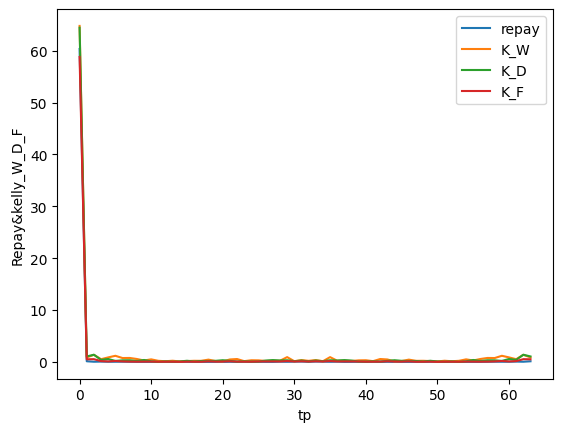

In [254]:
plt.xlabel('tp')
plt.ylabel('Repay&kelly_W_D_F')
plt.plot(range(len(Yss)), abs(Yss))
plt.legend(['repay', 'K_W', 'K_D', 'K_F'])

原始信号长度: 48
截取后的信号长度: 64
截取前几个样本后的信号: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.3572122  0.92875872
 0.20701032 0.75114351 0.41204915 0.53291528 0.82667405 0.54517762
 0.15568842 0.57092394 0.9375956  0.36791087 0.58559572 0.81700452
 0.48288573 0.53641941 0.26910078 0.9420832  0.36457406 0.99115004
 0.97892443 0.78631094 0.13024046 0.36262472 0.33680977 0.01691621
 0.02638921 0.74983113 0.23772744 0.64961845 0.15940685 0.95386927
 0.83994223 0.24171731 0.94400621 0.14863922 0.18426761 0.81063365
 0.81475524 0.66334448 0.23620631 0.21695151 0.37983359 0.93343607
 0.61622505 0.43836893 0.69771826 0.95663987]
傅立叶变换结果: [26.09322759+0.j         -5.39353249+4.21542187j  1.02350801+6.6901437j
  0.47826608+1.800977j    2.42374309-0.78740058j -1.17729144+3.42191161j
 -1.41742509+0.75665222j  2.85092378+2.16401724j -1.5563071 +1.09617909j
 -0.3396585 +1.15041264j -2.74802556

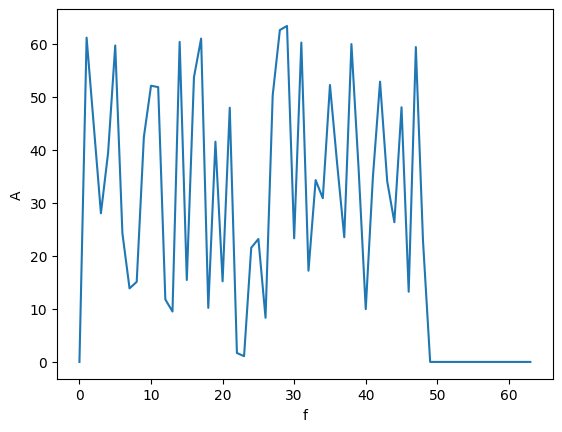

In [252]:
# 原始信号长度
signal_length = 48

# 截取前面的样本使得信号长度为2的幂次方
power_of_two = int(np.ceil(np.log2(signal_length)))  # 计算最小的2的幂次方，使得大于等于信号长度
new_length = 2 ** power_of_two  # 新的信号长度

# 生成原始信号
original_signal = np.random.rand(signal_length)

# 截取信号（在前面加0padding）
trimmed_signal = np.zeros(new_length)
trimmed_signal[new_length-signal_length:] = original_signal

# 计算傅立叶变换
fft_result = np.fft.fft(trimmed_signal)

# 输出结果
print("原始信号长度:", signal_length)
print("截取后的信号长度:", new_length)
print("截取前几个样本后的信号:", trimmed_signal)
print("傅立叶变换结果:", fft_result)
plt.xlabel('f')
plt.ylabel('A')
plt.plot(range(new_length), abs(np.fft.fft(fft_result)))


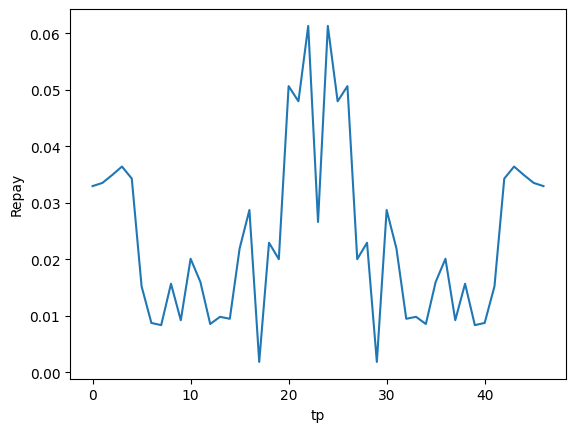

In [227]:
plt.xlabel('tp')
plt.ylabel('Repay')
plt.plot(range(len(time_points)-1), abs(np.fft.fft(odd_sample[:,6])[1:]))

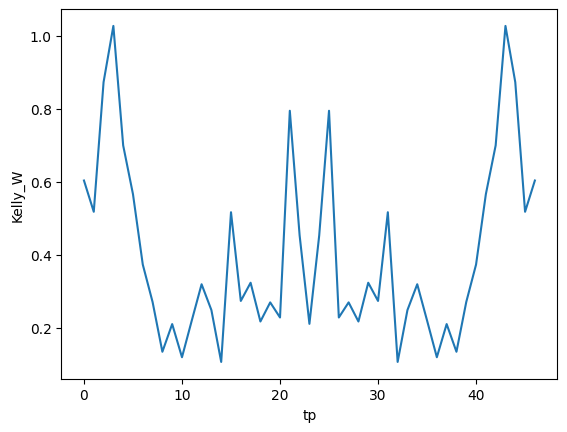

In [228]:
plt.xlabel('tp')
plt.ylabel('Kelly_W')
plt.plot(range(len(time_points)-1), abs(np.fft.fft(odd_sample[:,7])[1:]))

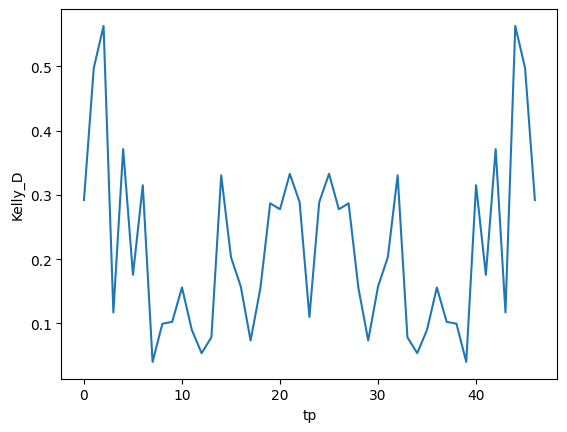

In [231]:
plt.xlabel('tp')
plt.ylabel('Kelly_D')
plt.plot(range(len(time_points)-1), abs(np.fft.fft(odd_sample[:,8])[1:]))

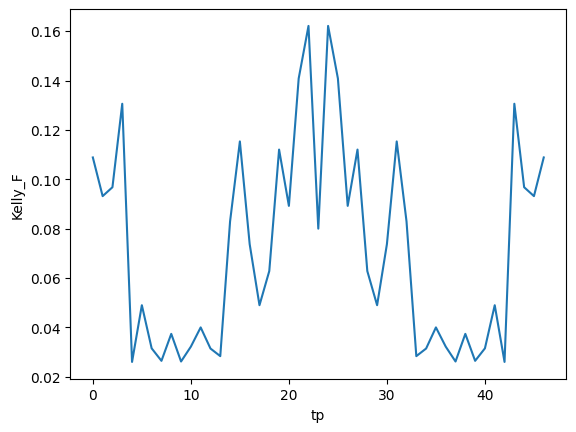

In [232]:
plt.xlabel('tp')
plt.ylabel('Kelly_F')
plt.plot(range(len(time_points)-1), abs(np.fft.fft(odd_sample[:,9])[1:]))

In [205]:
def kelly_index(b, p):
    print(b*p)
    print(1-p)
    print(b*p-(1-p))
    return (b*p-(1-p))/b

In [206]:
kelly_index(odd_sample[:,0], odd_sample[:,3])

[0.938   0.95115 0.938   0.95115 0.9414  0.94715 0.9414  0.95115 0.9405
 0.94715 0.9405  0.94715 0.9414  0.94715 0.9414  0.946   0.94715 0.946
 0.94435 0.9424  0.94435 0.9424  0.94435 0.946   0.9548  0.946   0.9548
 0.946   0.955   0.946   0.9414  0.94145 0.9414  0.94145 0.9414  0.94715
 0.9414  0.94715 0.94145 0.9414  0.94715 0.9414  0.94715 0.9405  0.94715
 0.9414  0.94715 0.9414 ]
[0.9062 0.8881 0.9062 0.8881 0.8954 0.9003 0.8954 0.8881 0.8955 0.9003
 0.8955 0.9003 0.8954 0.9003 0.8954 0.9054 0.9003 0.9054 0.8889 0.8822
 0.8889 0.8822 0.8889 0.9054 0.9132 0.9054 0.9132 0.9054 0.9045 0.9054
 0.8954 0.9009 0.8954 0.9009 0.8954 0.9003 0.8954 0.9003 0.9009 0.8954
 0.9003 0.8954 0.9003 0.8955 0.9003 0.8954 0.9003 0.8954]
[0.0318  0.06305 0.0318  0.06305 0.046   0.04685 0.046   0.06305 0.045
 0.04685 0.045   0.04685 0.046   0.04685 0.046   0.0406  0.04685 0.0406
 0.05545 0.0602  0.05545 0.0602  0.05545 0.0406  0.0416  0.0406  0.0416
 0.0406  0.0505  0.0406  0.046   0.04055 0.046   0.04055

array([0.00318   , 0.00741765, 0.00318   , 0.00741765, 0.00511111,
       0.00493158, 0.00511111, 0.00741765, 0.005     , 0.00493158,
       0.005     , 0.00493158, 0.00511111, 0.00493158, 0.00511111,
       0.00406   , 0.00493158, 0.00406   , 0.00652353, 0.007525  ,
       0.00652353, 0.007525  , 0.00652353, 0.00406   , 0.00378182,
       0.00406   , 0.00378182, 0.00406   , 0.00505   , 0.00406   ,
       0.00511111, 0.00426842, 0.00511111, 0.00426842, 0.00511111,
       0.00493158, 0.00511111, 0.00493158, 0.00426842, 0.00511111,
       0.00493158, 0.00511111, 0.00493158, 0.005     , 0.00493158,
       0.00511111, 0.00493158, 0.00511111])

In [208]:
def repay_prob(A, B, C):
    return A*B*C/(A*B+B*C+A*C)

In [209]:
repay_prob(odd_sample[:,0], odd_sample[:,1], odd_sample[:,2])

array([0.9375    , 0.95116261, 0.9375    , 0.95116261, 0.94147769,
       0.9466899 , 0.94147769, 0.95116261, 0.94074191, 0.9466899 ,
       0.94074191, 0.9466899 , 0.94147769, 0.9466899 , 0.94147769,
       0.94606307, 0.9466899 , 0.94606307, 0.9440271 , 0.94259819,
       0.9440271 , 0.94259819, 0.9440271 , 0.94606307, 0.95427034,
       0.94606307, 0.95427034, 0.94606307, 0.95455589, 0.94606307,
       0.94147769, 0.9413757 , 0.94147769, 0.9413757 , 0.94147769,
       0.9466899 , 0.94147769, 0.9466899 , 0.9413757 , 0.94147769,
       0.9466899 , 0.94147769, 0.9466899 , 0.94074191, 0.9466899 ,
       0.94147769, 0.9466899 , 0.94147769])

In [163]:
time_points.shape

(48, 4)

In [160]:
time_points

[[6, 15, 18, 3],
 [6, 15, 20, 31],
 [6, 15, 20, 37],
 [6, 15, 21, 44],
 [6, 19, 16, 14],
 [6, 25, 0, 36],
 [6, 25, 2, 21],
 [7, 3, 6, 49],
 [7, 3, 16, 49],
 [7, 4, 10, 15],
 [7, 4, 10, 20],
 [7, 4, 11, 28],
 [7, 4, 13, 7],
 [7, 4, 14, 7],
 [7, 13, 4, 22],
 [7, 13, 5, 19],
 [7, 17, 22, 16],
 [7, 18, 0, 1],
 [8, 1, 11, 37],
 [8, 7, 18, 34],
 [8, 7, 20, 5],
 [8, 7, 20, 58],
 [8, 7, 21, 56],
 [8, 9, 18, 39],
 [8, 9, 20, 38],
 [8, 9, 22, 13],
 [8, 9, 23, 16],
 [8, 10, 0, 41],
 [8, 10, 9, 46],
 [8, 10, 19, 3],
 [8, 11, 7, 51],
 [8, 11, 9, 5],
 [8, 11, 9, 16],
 [8, 11, 9, 22],
 [8, 11, 13, 44],
 [8, 11, 14, 17],
 [8, 11, 15, 8],
 [8, 11, 15, 46],
 [8, 11, 16, 11],
 [8, 11, 17, 22],
 [8, 11, 18, 11],
 [8, 11, 18, 17],
 [8, 11, 18, 37],
 [8, 11, 19, 7],
 [8, 11, 21, 5],
 [8, 11, 21, 28],
 [8, 12, 2, 7],
 [8, 12, 2, 22]]

In [173]:
np.linspace(0, 5, 5, endpoint=False)

array([0., 1., 2., 3., 4.])

In [389]:
np.fft.fftn?

Signature:       np.fft.fftn(a, s=None, axes=None, norm=None)
Call signature:  np.fft.fftn(*args, **kwargs)
Type:            _ArrayFunctionDispatcher
String form:     <function fftn at 0x0000027DE3CC67A0>
File:            d:\anaconda\envs\std\lib\site-packages\numpy\fft\_pocketfft.py
Docstring:      
Compute the N-dimensional discrete Fourier Transform.

This function computes the *N*-dimensional discrete Fourier Transform over
any number of axes in an *M*-dimensional array by means of the Fast Fourier
Transform (FFT).

Parameters
----------
a : array_like
    Input array, can be complex.
s : sequence of ints, optional
    Shape (length of each transformed axis) of the output
    (``s[0]`` refers to axis 0, ``s[1]`` to axis 1, etc.).
    This corresponds to ``n`` for ``fft(x, n)``.
    Along any axis, if the given shape is smaller than that of the input,
    the input is cropped.  If it is larger, the input is padded with zeros.
    if `s` is not given, the shape of the input along the

In [196]:
np.zeros((16,3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [194]:
odd_sample = np.vstack((odd_sample, np.zeros((16,3))))

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 10 and the array at index 1 has size 3

In [76]:
Y = np.fft.fftn(odd_sample, axes=(0,))

In [79]:
Y.shape

(48, 3)

In [75]:
%matplotlib inline

In [82]:
Y

array([[ 4.47000000e+02+0.00000000e+00j,  2.65700000e+02+0.00000000e+00j,
         6.23600000e+01+0.00000000e+00j],
       [-4.30756524e+00+3.71894207e+00j, -1.67326474e+00-3.03314801e-01j,
         1.06552900e-01-9.01135281e-02j],
       [ 2.78492412e+00-3.63013939e+00j,  2.52938642e+00+1.23656609e+00j,
        -1.08750312e-01-1.95679568e-02j],
       [-1.98140384e+00+8.03731023e+00j,  1.89844850e+00-2.51719015e+00j,
        -1.30903998e-01+5.12994590e-03j],
       [ 5.48205081e+00-7.76313972e+00j,  3.00000000e-01-5.39230485e-01j,
        -1.07320508e-01+1.21243557e-01j],
       [-4.17473508e+00+5.15512808e+00j,  1.73333475e+00-1.19562538e+00j,
        -2.80406830e-02+2.11798312e-02j],
       [ 4.76776695e+00-2.14644661e+00j, -9.53553391e-01+3.53553391e-01j,
        -4.82842712e-02-2.24264069e-02j],
       [-3.50128932e+00-7.03507180e-01j,  1.58114827e+00+8.01916743e-01j,
        -1.24455919e-02-5.55491114e-02j],
       [ 1.25000000e+00+2.16506351e+00j,  1.00000000e-01-1.73205081e-01j

In [179]:
abs(Y[:,0])

array([447.        ,   5.69083899,   4.57533762,   8.27794159,
         9.50364243,   6.63353289,   5.22865516,   3.57126718,
         2.5       ,   1.23488353,   1.99257816,   1.04782495,
         2.12132034,   3.17193665,   2.4266471 ,   1.05816993,
         4.82182538,   2.4070885 ,   3.1082415 ,   1.78333057,
         2.67969786,   2.19795863,   7.629371  ,   4.32702918,
         2.        ,   4.32702918,   7.629371  ,   2.19795863,
         2.67969786,   1.78333057,   3.1082415 ,   2.4070885 ,
         4.82182538,   1.05816993,   2.4266471 ,   3.17193665,
         2.12132034,   1.04782495,   1.99257816,   1.23488353,
         2.5       ,   3.57126718,   5.22865516,   6.63353289,
         9.50364243,   8.27794159,   4.57533762,   5.69083899])

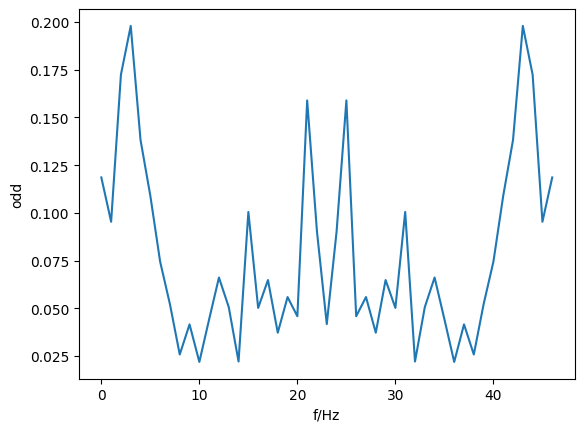

In [190]:
plt.xlabel('f/Hz')
plt.ylabel('odd')
plt.plot(range(len(time_points)-1), abs(Y[1:,0])/Y.shape[0])

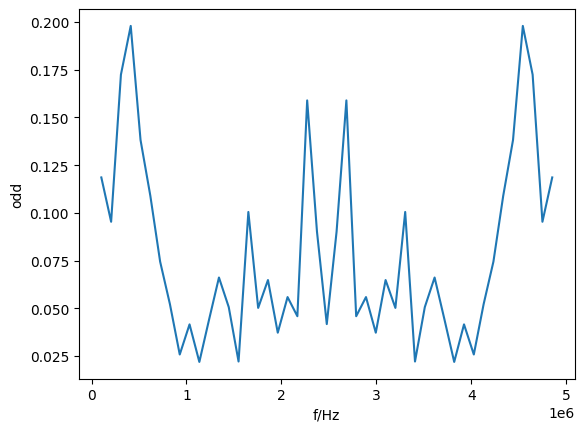

In [189]:
plt.xlabel('f/Hz')
plt.ylabel('odd')
plt.plot(time_sample[1:], abs(Y[1:,0])/Y.shape[0])

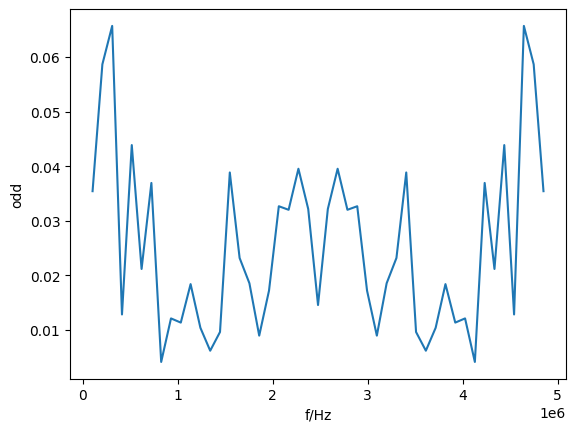

In [188]:
plt.xlabel('f/Hz')
plt.ylabel('odd')
plt.plot(time_sample[1:], abs(Y[1:,1])/Y.shape[0])

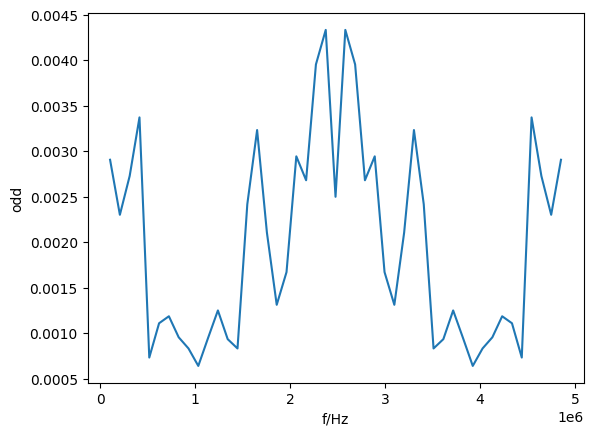

In [187]:
plt.xlabel('f/Hz')
plt.ylabel('odd')
plt.plot(time_sample[1:], abs(Y[1:,2])/Y.shape[0])

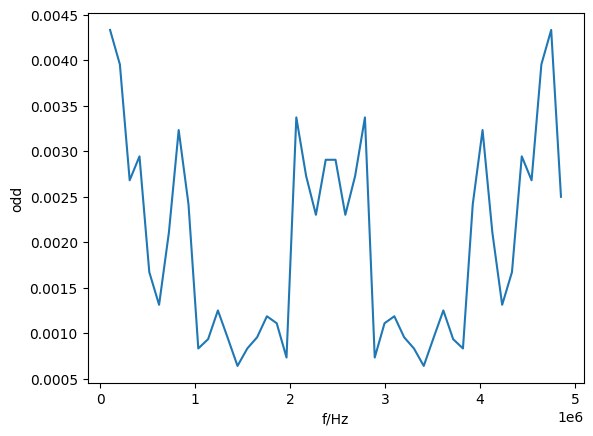

In [186]:
plt.xlabel('f/Hz')
plt.ylabel('odd')
plt.plot(time_sample[1:], abs(np.fft.fftshift(Y[1:,2]))/Y.shape[0])